# STEP 0. IMPORT LIBRARIES + DATA <a class="anchor" id="chapter1"></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 10 

In [2]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
# Define the file path for the Excel data
url_data = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET3_Preparer_des_donnees_pour_un_organisme_de_sante_publique\DATA\fr_openfoodfacts_org_products.csv"

df_data = pd.read_csv(url_data, sep='\t')
# df_data

C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\3962264675.py:8: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(url_data, sep='\t')


In [3]:
df_data.describe()

no_nutriments  additives_n  ingredients_from_palm_oil_n  \
count            0.0    248939.00                    248939.00   
mean             NaN         1.94                         0.02   
std              NaN         2.50                         0.14   
min              NaN         0.00                         0.00   
25%              NaN         0.00                         0.00   
50%              NaN         1.00                         0.00   
75%              NaN         3.00                         0.00   
max              NaN        31.00                         2.00   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                                248939.00   
mean                         NaN                                     0.06   
std                          NaN                                     0.27   
min                          NaN                                     0.00   
25%                          NaN                                     0.00   
50%                          NaN                                     0.00   
75%                          NaN                                     0.00   
max                          NaN                                     6.00   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  energy_100g  \
count                                    0.0                 0.0     2.61e+05   
mean                                     NaN                 NaN     1.14e+03   
std                                      NaN                 NaN     6.45e+03   
min                                      NaN                 NaN     0.00e+00   
25%                                      NaN                 NaN     3.77e+02   
50%                                      NaN                 NaN     1.10e+03   
75%                                      NaN                 NaN     1.67e+03   
max                                      NaN                 NaN     3.25e+06   

       energy-from-fat_100g   fat_100g  saturated-fat_100g  butyric-acid_100g  \
count                857.00  243891.00           229554.00                0.0   
mean                 585.50      12.73                5.13                NaN   
std                  712.81      17.58                8.01                NaN   
min                    0.00       0.00                0.00                NaN   
25%                   49.40       0.00                0.00                NaN   
50%                  300.00       5.00                1.79                NaN   
75%                  898.00      20.00                7.14                NaN   
max                 3830.00     714.29              550.00                NaN   

       caproic-acid_100g  caprylic-acid_100g  capric-acid_100g  \
count                0.0                 1.0              2.00   
mean                 NaN                 7.4              6.04   
std                  NaN                 NaN              0.23   
min                  NaN                 7.4              5.88   
25%                  NaN                 7.4              5.96   
50%                  NaN                 7.4              6.04   
75%                  NaN                 7.4              6.12   
max                  NaN                 7.4              6.20   

       lauric-acid_100g  myristic-acid_100g  palmitic-acid_100g  \
count              4.00                 1.0                 1.0   
mean              36.14                18.9                 8.1   
std               24.10                 NaN                 NaN   
min                0.04                18.9                 8.1   
25%               34.66                18.9                 8.1   
50%               47.60                18.9                 8.1   
75%               49.08                18.9                 8.1   
max               49.30                18.9                 8.1   

       stearic-acid_100g  arachidic-acid_100g  behenic-acid

# STEP 1. SELECT A TARGET

## I.1. List all the features of the file, whether quantitative or qualitative.

In [4]:
# Suppose your dataframe is named df
# You can get the list of column names with the columns method
features = df_data.columns.tolist()

# You can also get the data type of each column with the dtypes method
types = df_data.dtypes

# Now, you can split the features into quantitative and qualitative
numerical_features   = [feature for feature, dtype in types.items() if dtype != 'object']
categorical_features = [feature for feature, dtype in types.items() if dtype == 'object']

print(f"{len(numerical_features)} Quantitative features (NUMERICAL)  :\n", numerical_features, "\n")
print(f"{len(categorical_features)} Qualitative features (CATEGORICAL) :\n", categorical_features)

106 Quantitative features (NUMERICAL)  :
 ['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-a

## I.2. Choosing a target (<50% of values present) categorical variable for this feasibility study.




### I.2.1. Nullity Matrix

<Axes: >

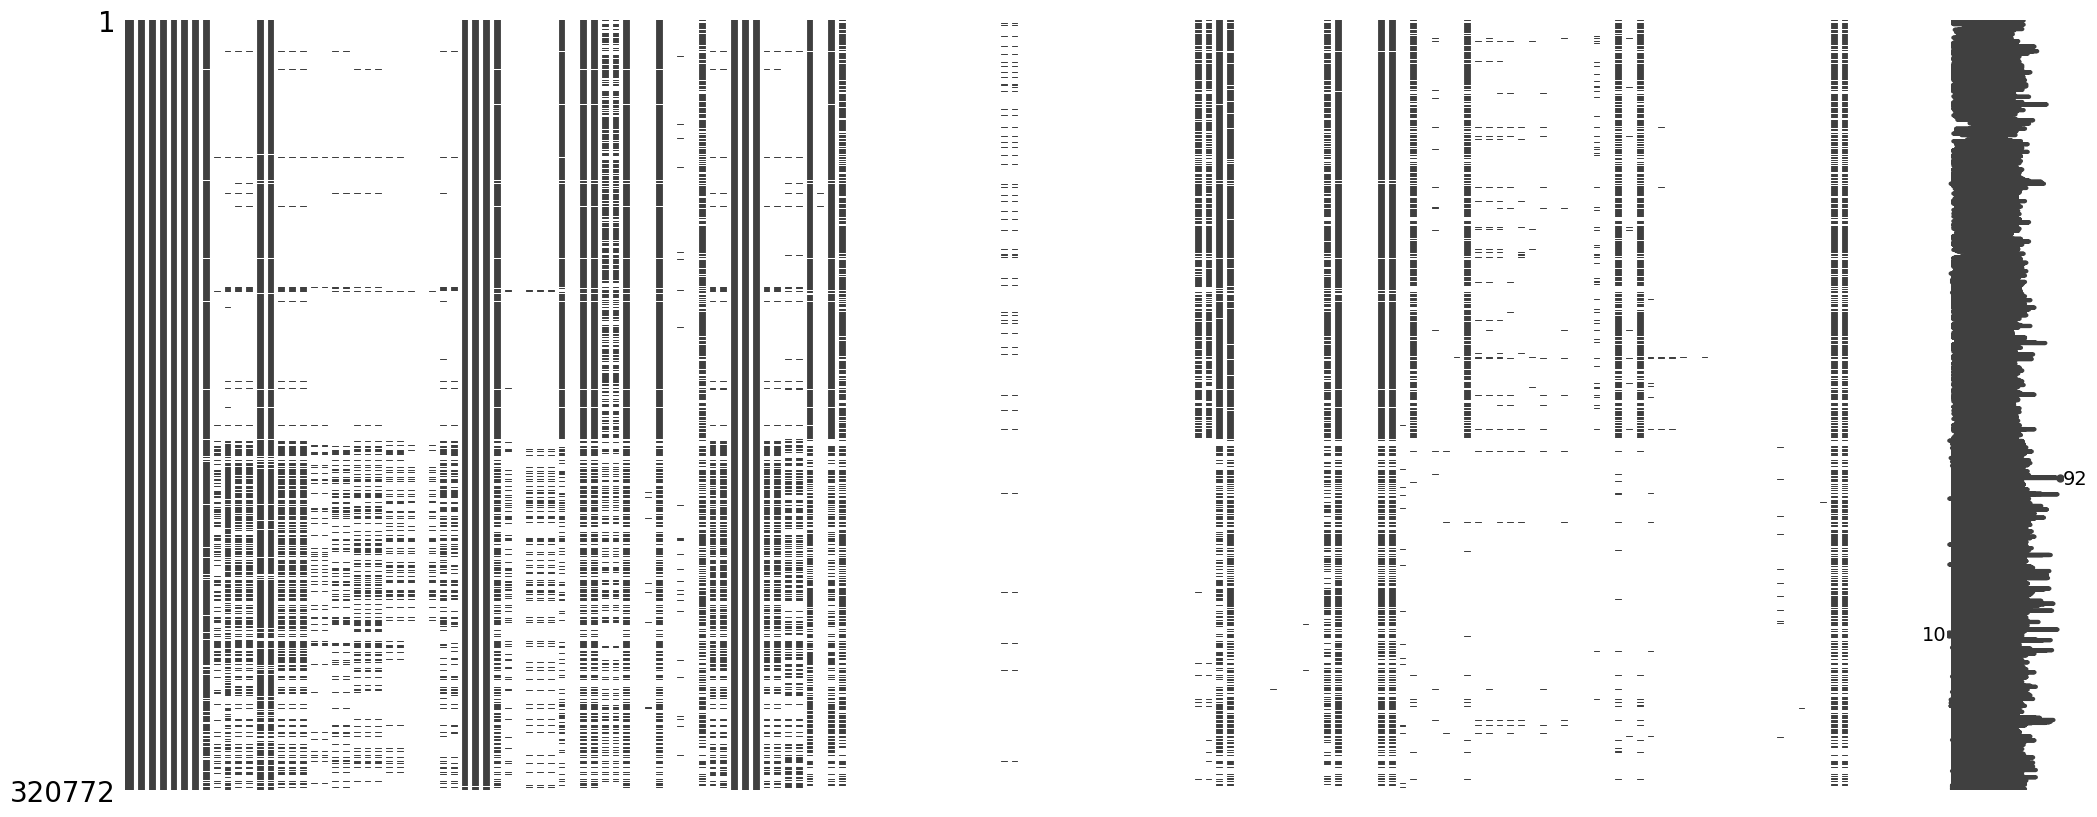

In [5]:
msno.matrix(df_data) 

<div class="alert alert-block alert-info">
First let's have the global value of missing data of our dataset using the nullity matrix (white is empty, black is fulfilled). 
    
- We can see that some columns are totally fulfilled. 
- Some colums are partially fulfilled : 1. totally fulfilled for the first mid, 2. Partially fulfilled for the first mid and 3. partially fulfilled for the 2nd mid. 
- Finally, we can see a lot of totally empty columns. 
</div>

### I.2.2. Nullity Bar Chart

<Axes: >

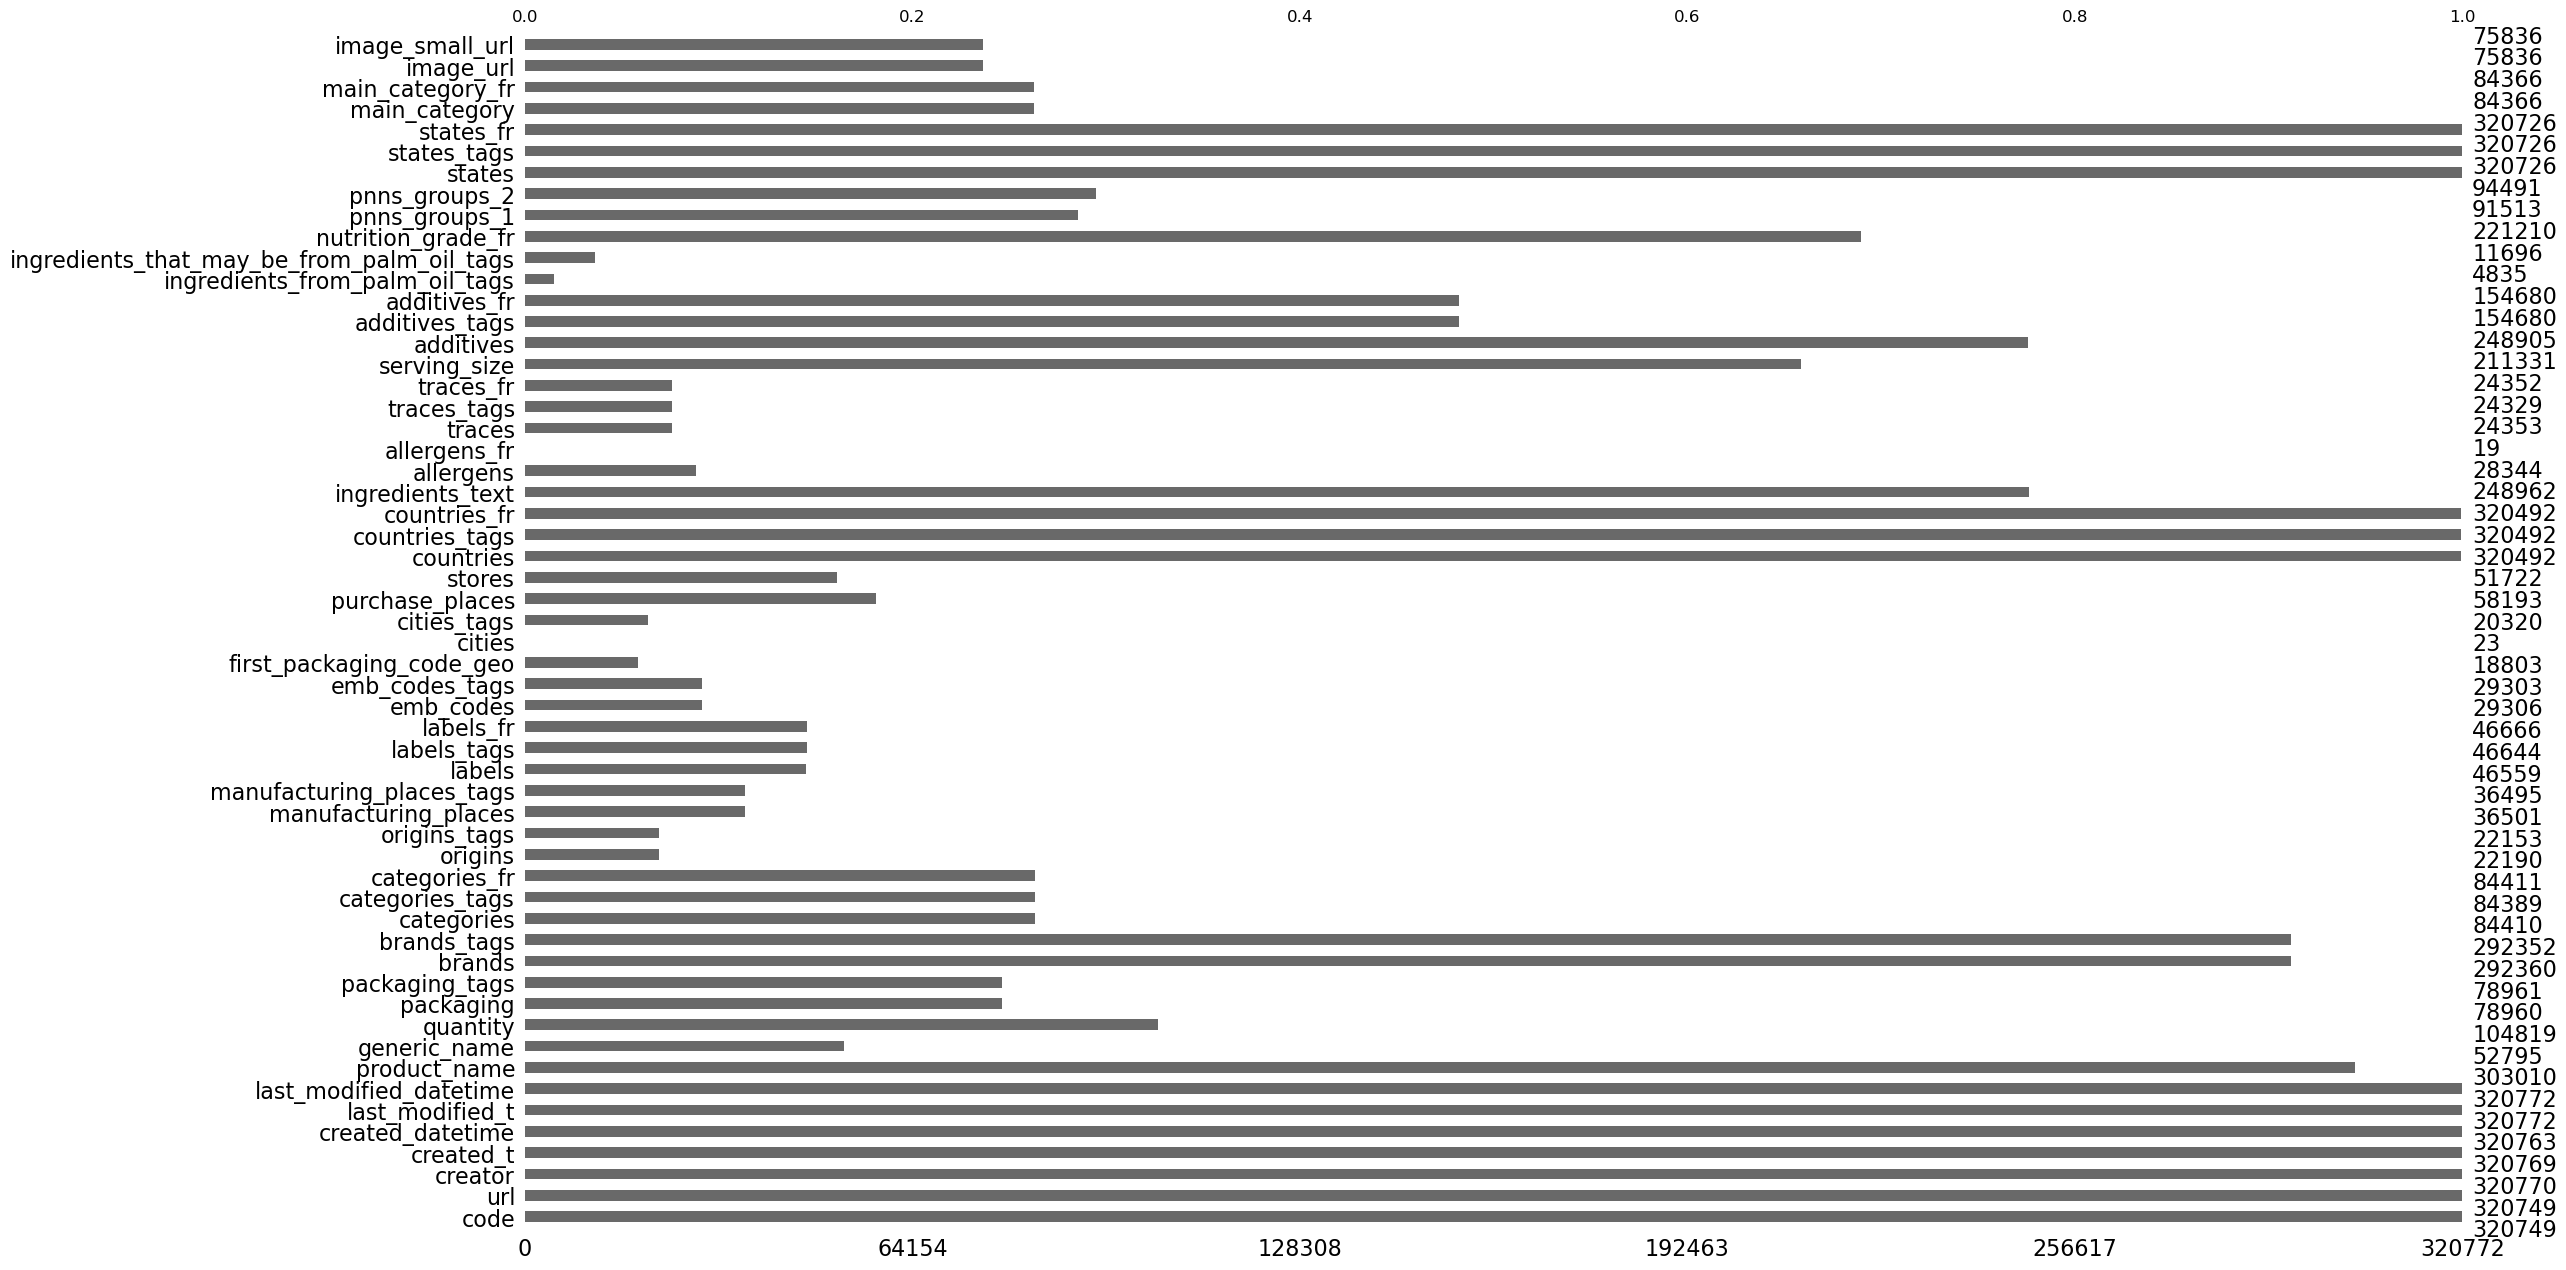

In [6]:
# Filter df_data with the categorical features only
df_data_categorical = df_data[categorical_features]
msno.bar(df_data_categorical) 

<div class="alert alert-block alert-info">
Let's find all categorical features with more than 50% misisng data. 
</div>

Categorical features with more than 50% missing values (sorted):
['allergens_fr', 'cities', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'first_packaging_code_geo', 'cities_tags', 'origins_tags', 'origins', 'traces_tags', 'traces_fr', 'traces', 'allergens', 'emb_codes_tags', 'emb_codes', 'manufacturing_places_tags', 'manufacturing_places', 'labels', 'labels_tags', 'labels_fr', 'stores', 'generic_name', 'purchase_places', 'image_url', 'image_small_url', 'packaging', 'packaging_tags', 'main_category', 'main_category_fr', 'categories_tags', 'categories', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'quantity', 'additives_tags', 'additives_fr']

There are 36 categorical features with more than 50% missing values.


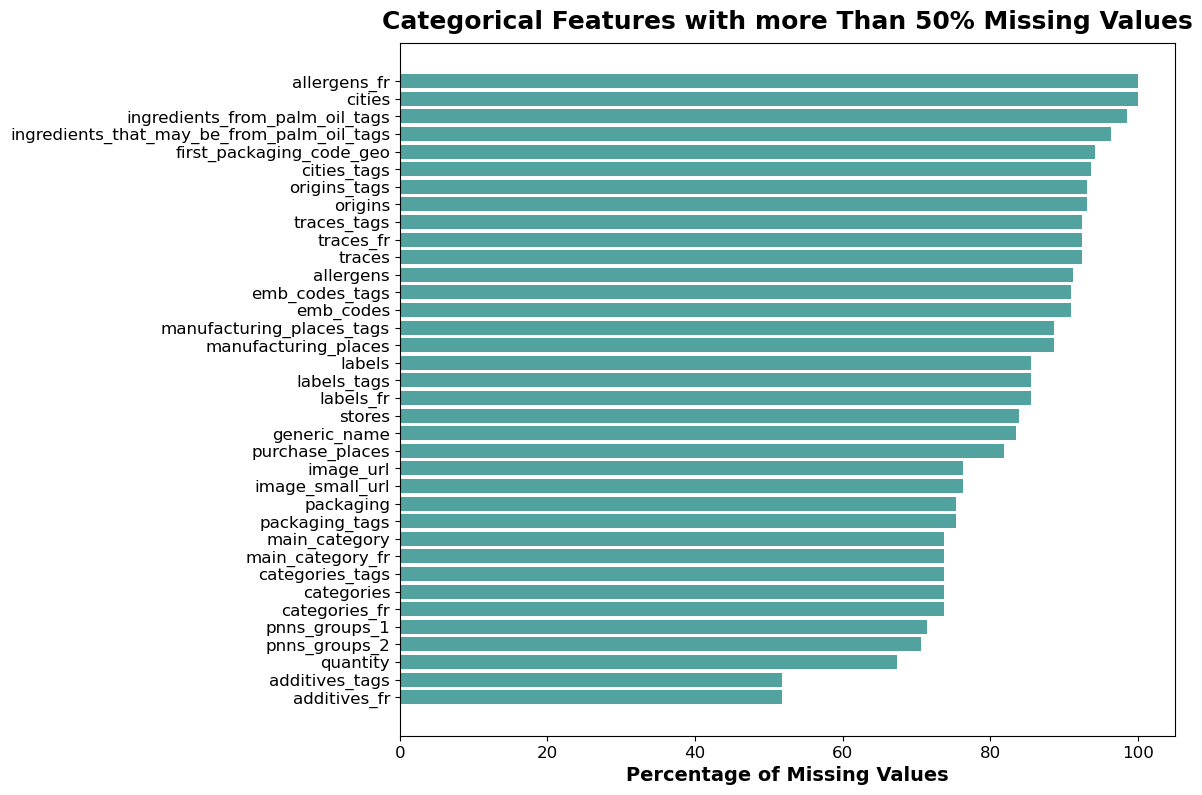

In [7]:
# Calculate the percentage of missing values for each categorical feature
missing_percentages = (df_data_categorical.isnull().sum() / len(df_data_categorical)) * 100

# Filter out categorical features with less than 50% missing values
categorical_features_more_than_50_percent_missing = missing_percentages[missing_percentages > 50].index.tolist()

# Sort categorical features by their missing percentages
categorical_features_sorted = sorted(categorical_features_more_than_50_percent_missing, key=lambda x: missing_percentages[x], reverse=True)

# Now you have a list of categorical features with less than 50% missing values, sorted by missing percentage
print("Categorical features with more than 50% missing values (sorted):")
print(categorical_features_sorted)
print(f"\nThere are {len(categorical_features_sorted)} categorical features with more than 50% missing values.")

# Plotting
plt.figure(figsize=(10, 9))
plt.barh(categorical_features_sorted, missing_percentages[categorical_features_sorted], color = blue_green)
plt.xlabel('Percentage of Missing Values', fontsize=14, fontweight='bold')
plt.title('Categorical Features with more Than 50% Missing Values', fontsize=18, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

<div class="alert alert-block alert-info">
We identified 36 categorical features which respect our criteria.
We could do a few things, like take one randomly or choose it by hand. 

HOWEVER, I proposed to used the "missingno" heatmap to select our criteria. Indeed, that Heatmap shows the correlation of missingness between every 2 columns.
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

--> It means we research the variable which have the higher score (the closest to 1 for each feature!)
</div>

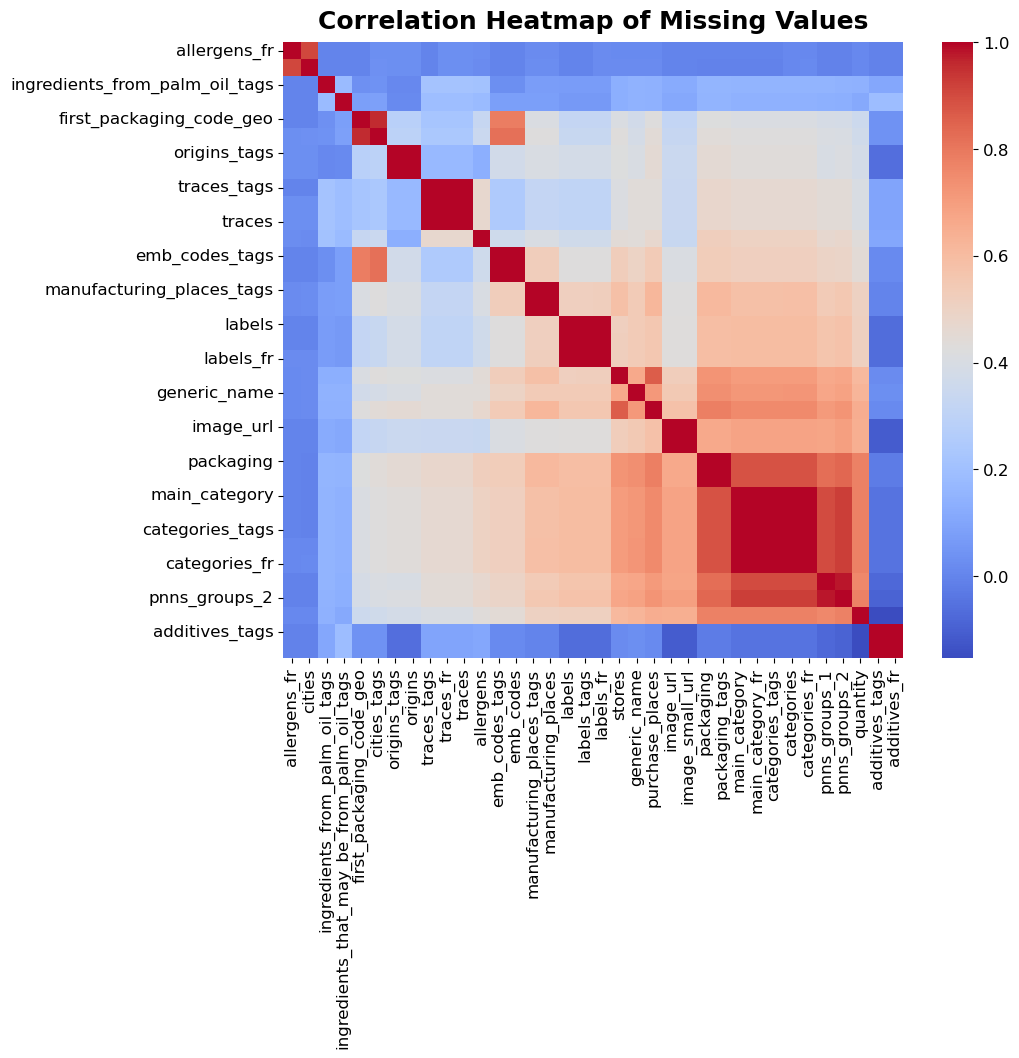

In [8]:
# Let's recreate the missinno heatmap function so we can access its data. 
# We only take the categorical features with more than 50% of missing value ratio. 
df = df_data_categorical[categorical_features_sorted].iloc[:, [i for i, n in enumerate(np.var(df_data_categorical[categorical_features_sorted].isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()
corr_mat

# Create a mask to hide the upper triangle
# mask = np.triu(np.ones_like(corr_mat, dtype=bool)) # without diagonale
# mask = np.triu(np.ones_like(corr_mat, dtype=bool), k=1) # with diagonale

# Plot heatmap
plt.figure(figsize=(10, 8))
# sns.heatmap(corr_mat, cmap='coolwarm', annot=False, fmt=".2f",  mask=mask)
sns.heatmap(corr_mat, cmap='coolwarm', annot=False, fmt=".2f" )
plt.title('Correlation Heatmap of Missing Values', fontsize=18, fontweight='bold')
plt.show()

# We have been abble to reproduced the function for missingno heatmap !!!

The score for each column is (regular sum) : 


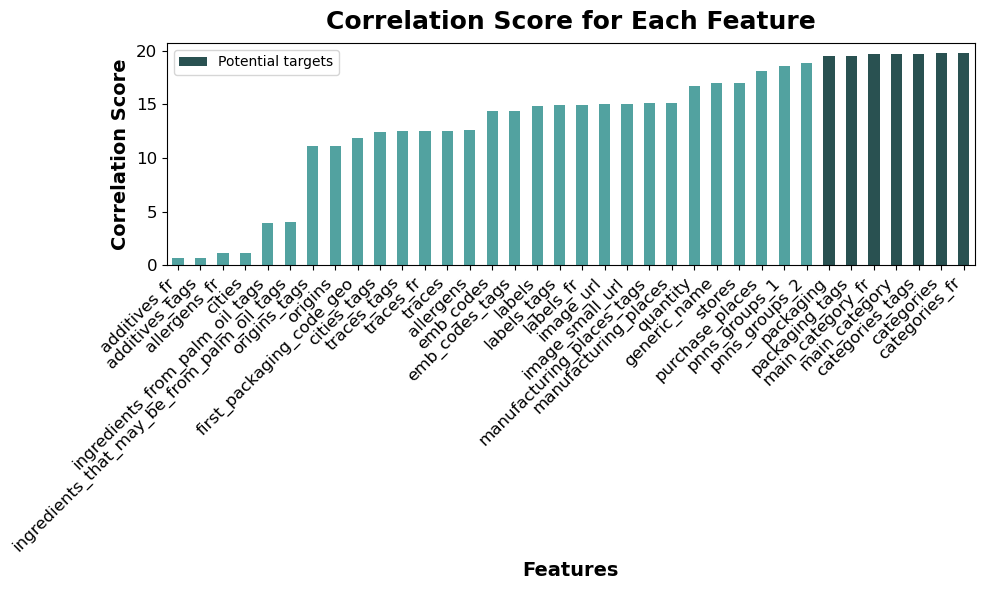




Index of the feature with maximum correlation score: categories_fr with a score of 20.724088030070547
There are 7 features which have a high score (>19). We could take any of them for doing prediction. 
--> Lets take an easy one like "main_category_fr". 


In [9]:
# Find the columns with the maximum correlation score
print('The score for each column is (regular sum) : ')
# print(corr_mat.sum()-1) # We remove 1 because of the diagonale. We are not interested in the effect of FEATURE N vs FEATURE N. 

# Find the column with the maximum correlation score
max_corr_feature = (corr_mat.sum()-1).idxmax()

# Sort the correlation scores
sorted_corr_scores = (corr_mat.sum() - 1).sort_values()

# Replace values less than or equal to 19 with NaN
sorted_corr_scores_filtered = sorted_corr_scores.mask(sorted_corr_scores <= 19)

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = sorted_corr_scores.plot(kind='bar', color=[blue_green])
sorted_corr_scores_filtered.plot(kind='bar', color=[blue_green_dark], ax=ax, label='Potential targets')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Correlation Score', fontsize=14, fontweight='bold')
plt.title('Correlation Score for Each Feature', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Print the maximum correlation score and its index
print(f"\n\n\nIndex of the feature with maximum correlation score: {max_corr_feature} with a score of {corr_mat.sum().max()}")
print(f'There are 7 features which have a high score (>19). We could take any of them for doing prediction. \n--> Lets take an easy one like "main_category_fr". ')

feature_target_s = 'main_category_fr'

## I.3. Remove the rows (products) that do not have a target value.

In [10]:
# Drop products (rows) with missing values in the 'categories_fr' column
# Reduction from 320k to 84k rows !!!
df_data_cleaned = df_data.dropna(subset=[feature_target_s])
# Reset the index of df_target
df_data_cleaned = df_data_cleaned.reset_index(drop=True)


## I.4. Separate the target from the rest of the dataset.

In [11]:
# We create two DATASET : df_target and df_features. 

df_target = df_data_cleaned[feature_target_s]
df_features = df_data_cleaned.drop(columns=[feature_target_s])

# STEP 2. CLEAN and FILTER FEATURES AND PRODUCTS

<div class="alert alert-block alert-info">

- FIRST STEP: We are going to get the Fill Rate (%) for each feature of the dataset. If the fill rate is superior to 50%, we keep the feature. Then, we remove manually any redundant/useless feature for our target.  
- SECOND STEP: DATA NORMALIZATION. In this section, i clean the 'quantity' feature to be able to differenciate BEVERAGE from SOLID FOOD later. I needed to solve multiple type of errors and needs uniformization. Then I do a general cleaning of the dataset. Finally, I removed / replaced the value by NaN any incoherences inside the dataset. 
- THRID STEP: I removed the duplicated products. Spoiler: The 'code' feature cannot be used as a way to give unicity to products!!!
- FOURTH STEP: Finally, i check the correlation between my numerical features. 
</div>

## II.1. Display the fill rates of features in the dataset.

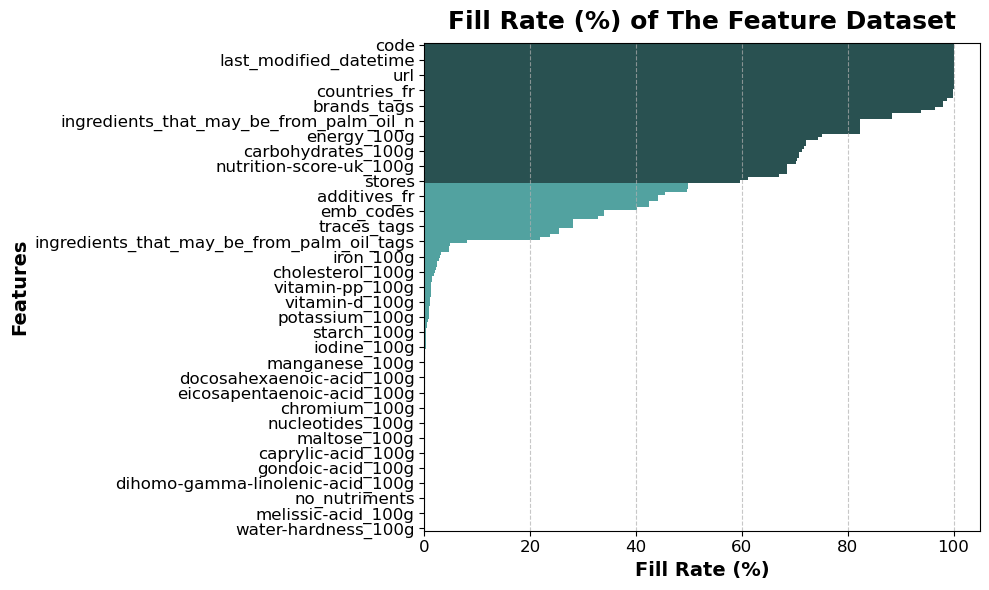

In [12]:
# Calculate the percentage of missing values for each feature
fill_rate_percentages = 100 - (df_features.isnull().sum() / len(df_features)) * 100

# Sort fill_rate_percentages
fill_rate_percentages_sorted = fill_rate_percentages.sort_values(ascending=True)  # Sorting in ascending order

# Replace values less than or equal to 19 with NaN
fill_rate_percentages_sortedV2 = fill_rate_percentages_sorted.mask(fill_rate_percentages_sorted <= 50)

# Plotting
plt.figure(figsize=(10, 6))
ax = fill_rate_percentages_sorted.plot(kind='barh', color=blue_green, width=1)
fill_rate_percentages_sortedV2.plot(kind='barh', color=blue_green_dark, width=1)
plt.title('Fill Rate (%) of The Feature Dataset', fontsize=18, fontweight='bold')
plt.xlabel('Fill Rate (%)', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Customize x-axis ticks to display only every nth label
n = 5  # Display every 5th label
plt.yticks(range(0, len(fill_rate_percentages_sorted), n), fill_rate_percentages_sorted.index[::n])

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()


## II.2. Select features that are sufficiently filled (more than 50%) and appear relevant for predicting the target.

In [13]:
fill_rate_percentages_sup_50 = fill_rate_percentages_sorted[fill_rate_percentages_sorted > 50]
print(fill_rate_percentages_sup_50)

print('\n\nNumber of features with fill rate greater than 50%:', len(fill_rate_percentages_sup_50))

stores                                      59.55
generic_name                                61.17
purchase_places                             66.94
nutrition_grade_fr                          68.49
nutrition-score-fr_100g                     68.49
nutrition-score-uk_100g                     68.49
saturated-fat_100g                          70.18
sugars_100g                                 70.46
sodium_100g                                 70.77
salt_100g                                   70.77
carbohydrates_100g                          71.32
fat_100g                                    71.80
image_url                                   72.14
image_small_url                             72.14
proteins_100g                               74.42
energy_100g                                 75.16
additives                                   82.35
ingredients_text                            82.38
additives_n                                 82.38
ingredients_from_palm_oil_n                 82.38


In [14]:
# We filter our dataframe df_features with the selected features (fill rate > 50%)
df_features_fill_rate_sup_50 = df_features[fill_rate_percentages_sup_50.index]

<div class="alert alert-block alert-info">

1. Remove every column with _en if _fr is available !
- nutrition-score-uk_100g (exist in _fr version)
- main_category

2. Remove non usefull or unrelated  features to my target
- image_url
- image_small_url
- stores
- purchase_places
- created_datetime
- url
- creator
- created_t
- last_modified_t
- last_modified_datetime
- states_fr
- states_tags
- states
- packaging
- pnns_groups_1
- additives_n


3. Remove redundant parameters (it mays exists under different form, for example "packaging" and "packaging_tags" or an variation with a language tag (_fr))
- packaging_tags
- brands_tags
- countries
- countries_tag
- categories
- categories_tags
- additives

--> TOTAL FEATURES TO REMOVE : 21 FEATURES !!!
</div>

In [15]:
# We filter our dataframe df_features_fill_rate_sup_50 by removing the list of features we decided manually
list_features_to_remove = ['additives_n', 'packaging', 'pnns_groups_1', 'additives', 'nutrition-score-uk_100g','image_url','image_small_url','stores',
                           'created_datetime','url','creator','created_t','last_modified_t','last_modified_datetime','states_fr','states_tags','states','packaging_tags','brands_tags','countries',
                           'countries_tags','categories','categories_tags', 'purchase_places', 'main_category']

# Remove the specified features
df_features_filtered = df_features_fill_rate_sup_50.drop(columns=list_features_to_remove, errors='ignore')
# print(df_features_filtered['product_name'].unique().tolist())
df_features_filtered

generic_name nutrition_grade_fr  \
0                                  NaN                NaN   
1                     Laitue en salade                  c   
2                          Pâtisserie                 NaN   
3                                Flute                NaN   
4                           Pâtisserie                  c   
...                                ...                ...   
84361                            Sprot                NaN   
84362                thé bio équitable                  c   
84363                              NaN                NaN   
84364                              NaN                NaN   
84365  Leba pickle flavor potato chips                NaN   

       nutrition-score-fr_100g  saturated-fat_100g  sugars_100g  sodium_100g  \
0                          NaN                 NaN          NaN          NaN   
1                          6.0                 7.0          0.0         0.85   
2                          NaN                 NaN         28.1         0.36   
3                          NaN                 NaN          NaN          NaN   
4                          9.0                 2.0         24.7         0.26   
...                        ...                 ...          ...          ...   
84361                      NaN                 NaN          NaN          NaN   
84362                      2.0                 0.2          0.5         0.01   
84363                      NaN                 NaN          NaN          NaN   
84364                      NaN                 NaN          NaN          NaN   
84365                      NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0            NaN                 NaN       NaN            NaN          NaN   
1           2.16                23.0      12.0          22.00       1210.0   
2           0.92                54.1      14.4           4.79       1520.0   
3            NaN                 NaN       NaN            NaN          NaN   
4           0.65                38.7      10.7           3.33       1090.0   
...          ...                 ...       ...            ...          ...   
84361        NaN                 NaN       NaN            NaN          NaN   
84362       0.03                 0.5       0.2           0.50         21.0   
84363        NaN                 NaN       NaN            NaN          NaN   
84364        NaN                 NaN       NaN            NaN          NaN   
84365        NaN                 NaN       NaN            NaN          NaN   

                                        ingredients_text  \
0                                                    NaN   
1      INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...   
2      Ingrédients: Pâte (farine, eau, beurre, sucre,...   
3                                                  Wheat   
4      Ingrédients : Pâte (farine, margarines d'huile...   
...                                                  ...   
84361                                                NaN   
84362  thé vert, arôme naturel bergamote avec autres ...   
84363  viande d'oie, graisse de canard, épices, sel, ...   
84364                                                NaN   
84365                                                NaN   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                              NaN                                      NaN   
1                              0.0                                      0.0   
2                              0.0                                      1.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   
...                            ...                                      ...   
84361                          NaN                                      NaN   
84362                          0.0        

In [16]:
df_features_filtered['nutrition-score-fr_100g'].unique()

array([ nan,   6.,   9.,   1.,   2.,  26.,  10.,  13.,  12.,  22.,   8.,
        14.,  18.,  20.,  -2.,  19.,  11.,   4.,   0.,  -5.,  -3.,  -1.,
        15.,  -4.,  24.,  23.,  21.,  25.,  27.,  17.,   5.,   7.,  -9.,
         3.,  -6.,  16., -10.,  -7.,  29.,  28., -11.,  -8., -13.,  30.,
        33.,  40.,  31., -12.,  32., -14., -15.,  35.,  34.,  37.])

## II.3. Data Normalization

### II.3.1. Cleaning of 'quantity'

In [17]:
import re
pd.set_option('display.max_rows', 500)
original_df_features_filtered = df_features_filtered
copy_df_features_filtered = df_features_filtered


# ========================================================================================
# DATA NORMALIZATION - QUANTITY COLUMN
# WE WANT TO BE ABLE TO DIFFERENCIATE SOLID FOOD FROM BEVERAGE 
# (KNOWING THE UNIT 'g' or 'ml' could help !)
# STEP 1: Clean the column to get a value and an approuved unit. 
# ========================================================================================
import re

def clean_quantity_METHOD0(text):
    if isinstance(text, str):
        # 1. Replace comma with a point
        text = text.replace(',', '.')

        # 1.BIS Replace Gal, gal & GALLON with a point
        text = re.sub(r'(?i)\b(gallon|gal)\b', '_gal', text)     

        # 2. Remove space only if it is a thousand separator
        text = re.sub(r'(\d) (\d{3})', r'\1\2', text)
        
        # 3. Add a space between number and unit if they are too close
        text = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', text)
        
        # 4. Replace 'FL OZ', 'Fl Oz', 'Fl. Oz.', 'fl oz' with 'FLOZ'
        text = re.sub(r'(?i)\b(FL ?\.? ?OZ)\b', 'FLOZ', text)

        # Convert text to lowercase
        text = text.lower()

    # 8. Handle multiplication cases like '6 x 35 g'
        # multiplication_pattern = r'(\d+)\s*x\s*(\d+)\s*([a-zA-Z]+)'
        multiplication_pattern = r'(\d+\.?\d*)\s*[x*]\s*(\d+\.?\d*)\s*([a-zA-Z]+)'

        match = re.search(multiplication_pattern, text)
        if match:
            num1 = float(match.group(1))
            num2 = float(match.group(2))
            unit = match.group(3)
            if unit is None:
                # If no unit is specified, assume 'UNIT'
                unit = 'UNIT'
            result = int(num1 * num2)
            text = f"{result} {unit}"

        # 5. Remove part of the string after the unit if it's followed by an approved unit
        approved_units = ['kg', 'g', 'oz', 'lb', 'ml', 'cl', 'l', 'litre', 'floz', 'pt', 'qt', 'gal', '_gal', 'gallon', 'mg', 'lbs', 'tbsp', 'pint', 'quart']
        for unit in approved_units:
            text = re.sub(rf'(\d+\.?\d*)\s*({unit})(?=\s|$).*', rf'\1 \2', text, flags=re.IGNORECASE)
            
        # 6. Remove text appearing before the value and approved unit
        approved_units_pattern = '|'.join(approved_units)
        text = re.sub(rf'^.*?\b(\d+\.?\d*\s*(?:{approved_units_pattern}))', r'\1', text, flags=re.IGNORECASE)

        # 7. Remove '(' or ')' with nothing
        text = text.replace('(', '').replace(')', '')
        
        # 8. Select only the first valid value with the approved unit
        match = re.search(r'(\d+\.?\d*\s*(?:' + '|'.join(approved_units) + r'))', text, flags=re.IGNORECASE)
        if match:
            text = match.group(1)

        # 9. Replace '_gal' with a 'gal'
        text = text.replace('_gal', 'gal')
        
        # 10. Replace 'grams' with 'g'
        text = text.replace('grams', 'g').replace('gram', 'g')
        
        # 11. Replace 'dry pint' with 'dry_pint'
        text = text.replace('dry pint', 'dry_pint')

        # 12. Handle cases where there is only a number with no units
        if re.match(r'^\d+(\.\d+)?$', text):
            text += ' UNIT'
    return text


# Apply the method zero to the 'quantity' column
copy_df_features_filtered['quantity_cleaned_METHOD0'] = copy_df_features_filtered['quantity'].apply(clean_quantity_METHOD0)

# ========================================================================================
# DATA NORMALIZATION - QUANTITY COLUMN
# STEP 2: Convert the result into the desired unit (weight : g) (fluid : ml)
# ========================================================================================

def convert_to_grams(quantity, unit):
    if unit in ['kg', 'kilogram']:
        return quantity * 1000
    elif unit in ['oz', 'ounce']:
        return quantity * 28.3495
    elif unit in ['lb', 'pound', 'lbs']:
        return quantity * 453.592
    elif unit in ['mg', 'milligram']:
        return quantity / 1000
    elif unit in ['dry_pint']:
        return quantity * 550.6105
    else:
        return quantity

def convert_to_milliliters(quantity, unit):
    if unit in ['l', 'liter', 'lt']:
        return quantity * 1000
    elif unit in ['floz']:
        return quantity * 29.5735 
    elif unit in ['pt']:
        return quantity * 473.176 
    elif unit in ['qt']:
        return quantity * 946.353 
    elif unit in ['gal']:
        return quantity * 3785.41 
    elif unit in ['cl']:
        return quantity * 10 
    elif unit in ['pint']:
        return quantity * 568 
    else:
        return quantity

def clean_quantity_with_conversion(text):
    if isinstance(text, str):
        # find the value and unit
        match = re.search(r'(\d+\.?\d*)\s*([a-zA-Z]+)', text)
        if match:
            quantity = float(match.group(1))
            unit = match.group(2).lower()

            # convert to grams or milliliters
            if unit in ['kg', 'g', 'oz', 'lb', 'mg', 'dry_pint']:
                quantity = int(convert_to_grams(quantity, unit))
                unit = 'g'
            elif unit in ['l', 'fl', 'floz', 'pt', 'qt', 'gal', 'cl', 'pint', 'quart', 'lt']:
                quantity = int(convert_to_milliliters(quantity, unit))
                unit = 'ml'

            # return the formatted string
            return f"{quantity} {unit}"
    return text
    
# Convert units into 'g', 'ml' or 'unit'. 
copy_df_features_filtered['quantity_cleaned_with_conversion'] = copy_df_features_filtered['quantity_cleaned_METHOD0'].apply(clean_quantity_with_conversion)
copy_df_features_filtered.drop(columns=['quantity', 'quantity_cleaned_METHOD0'], inplace=True)
# ========================================================================================
# DATA NORMALIZATION - QUANTITY COLUMN
# STEP 3: REPLACE THE QUANTITY COLUMN WITH THE CLEANED ONE
# ========================================================================================
df_features_filtered['quantity'] = copy_df_features_filtered['quantity_cleaned_with_conversion']
copy_df_features_filtered.drop(columns=['quantity_cleaned_with_conversion'], inplace=True)

df_features_filtered

generic_name nutrition_grade_fr  \
0                                  NaN                NaN   
1                     Laitue en salade                  c   
2                          Pâtisserie                 NaN   
3                                Flute                NaN   
4                           Pâtisserie                  c   
...                                ...                ...   
84361                            Sprot                NaN   
84362                thé bio équitable                  c   
84363                              NaN                NaN   
84364                              NaN                NaN   
84365  Leba pickle flavor potato chips                NaN   

       nutrition-score-fr_100g  saturated-fat_100g  sugars_100g  sodium_100g  \
0                          NaN                 NaN          NaN          NaN   
1                          6.0                 7.0          0.0         0.85   
2                          NaN                 NaN         28.1         0.36   
3                          NaN                 NaN          NaN          NaN   
4                          9.0                 2.0         24.7         0.26   
...                        ...                 ...          ...          ...   
84361                      NaN                 NaN          NaN          NaN   
84362                      2.0                 0.2          0.5         0.01   
84363                      NaN                 NaN          NaN          NaN   
84364                      NaN                 NaN          NaN          NaN   
84365                      NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0            NaN                 NaN       NaN            NaN          NaN   
1           2.16                23.0      12.0          22.00       1210.0   
2           0.92                54.1      14.4           4.79       1520.0   
3            NaN                 NaN       NaN            NaN          NaN   
4           0.65                38.7      10.7           3.33       1090.0   
...          ...                 ...       ...            ...          ...   
84361        NaN                 NaN       NaN            NaN          NaN   
84362       0.03                 0.5       0.2           0.50         21.0   
84363        NaN                 NaN       NaN            NaN          NaN   
84364        NaN                 NaN       NaN            NaN          NaN   
84365        NaN                 NaN       NaN            NaN          NaN   

                                        ingredients_text  \
0                                                    NaN   
1      INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...   
2      Ingrédients: Pâte (farine, eau, beurre, sucre,...   
3                                                  Wheat   
4      Ingrédients : Pâte (farine, margarines d'huile...   
...                                                  ...   
84361                                                NaN   
84362  thé vert, arôme naturel bergamote avec autres ...   
84363  viande d'oie, graisse de canard, épices, sel, ...   
84364                                                NaN   
84365                                                NaN   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                              NaN                                      NaN   
1                              0.0                                      0.0   
2                              0.0                                      1.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   
...                            ...                                      ...   
84361                          NaN                                      NaN   
84362                          0.0        

### II.3.2. General cleaning 

In [18]:
import re
# ===========================================================================
# Data Normalization
# ===========================================================================
original_df_features_filtered = df_features_filtered

# STEP 1: Convert text data to lowercase
df_features_filtered = df_features_filtered.map(lambda x: x.lower() if isinstance(x, str) else x)
# Calculate the number of changes made
changes_count = (df_features_filtered != original_df_features_filtered).sum().sum()
print("Step 1: Number of changes made:", changes_count)


# STEP 2: Remove extra whitespace
df_features_filtered = df_features_filtered.map(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)
# Calculate the number of changes made
changes_count = (df_features_filtered != original_df_features_filtered).sum().sum()
print("Step 2: Number of changes made:", changes_count)

df_features_filtered

Step 1: Number of changes made: 837860
Step 2: Number of changes made: 838855


generic_name nutrition_grade_fr  \
0                                  NaN                NaN   
1                     laitue en salade                  c   
2                           pâtisserie                NaN   
3                                flute                NaN   
4                           pâtisserie                  c   
...                                ...                ...   
84361                            sprot                NaN   
84362                thé bio équitable                  c   
84363                              NaN                NaN   
84364                              NaN                NaN   
84365  leba pickle flavor potato chips                NaN   

       nutrition-score-fr_100g  saturated-fat_100g  sugars_100g  sodium_100g  \
0                          NaN                 NaN          NaN          NaN   
1                          6.0                 7.0          0.0         0.85   
2                          NaN                 NaN         28.1         0.36   
3                          NaN                 NaN          NaN          NaN   
4                          9.0                 2.0         24.7         0.26   
...                        ...                 ...          ...          ...   
84361                      NaN                 NaN          NaN          NaN   
84362                      2.0                 0.2          0.5         0.01   
84363                      NaN                 NaN          NaN          NaN   
84364                      NaN                 NaN          NaN          NaN   
84365                      NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0            NaN                 NaN       NaN            NaN          NaN   
1           2.16                23.0      12.0          22.00       1210.0   
2           0.92                54.1      14.4           4.79       1520.0   
3            NaN                 NaN       NaN            NaN          NaN   
4           0.65                38.7      10.7           3.33       1090.0   
...          ...                 ...       ...            ...          ...   
84361        NaN                 NaN       NaN            NaN          NaN   
84362       0.03                 0.5       0.2           0.50         21.0   
84363        NaN                 NaN       NaN            NaN          NaN   
84364        NaN                 NaN       NaN            NaN          NaN   
84365        NaN                 NaN       NaN            NaN          NaN   

                                        ingredients_text  \
0                                                    NaN   
1      ingredients : laitue. vinaigrette (huile de ca...   
2      ingrédients: pâte (farine, eau, beurre, sucre,...   
3                                                  wheat   
4      ingrédients : pâte (farine, margarines d'huile...   
...                                                  ...   
84361                                                NaN   
84362  thé vert, arôme naturel bergamote avec autres ...   
84363  viande d'oie, graisse de canard, épices, sel, ...   
84364                                                NaN   
84365                                                NaN   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                              NaN                                      NaN   
1                              0.0                                      0.0   
2                              0.0                                      1.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   
...                            ...                                      ...   
84361                          NaN                                      NaN   
84362                          0.0        

### II.3.3. Remove inconsistencies.

In [19]:
# STEP 1: Replace values with NaN where 'saturated-fat_100g' quantity is superior to 'fat_100g'
before_step1 = df_features_filtered['saturated-fat_100g'].isna().sum().sum()
cond_fat = df_features_filtered["fat_100g"] < df_features_filtered["saturated-fat_100g"]
df_features_filtered.loc[cond_fat, "saturated-fat_100g"] = np.nan
after_step1 = df_features_filtered['saturated-fat_100g'].isna().sum().sum()
replaced_step1 = after_step1 - before_step1

# STEP 2: Replace values with NaN where 'sugars_100g' quantity is superior to 'carbohydrates_100g'
before_step2 = df_features_filtered['sugars_100g'].isna().sum().sum()
cond_sugars = df_features_filtered["sugars_100g"] > df_features_filtered["carbohydrates_100g"]
df_features_filtered.loc[cond_sugars, "sugars_100g"] = np.nan
after_step2 = df_features_filtered['sugars_100g'].isna().sum().sum()
replaced_step2 = after_step2 - before_step2

# STEP 3: Replace values with NaN where any value in columns ending with '_100g' is outside the range [0, 100]
columns_100g = [col for col in df_features_filtered.columns if col.endswith('_100g')]
columns_100g.remove('energy_100g')
before_step3 = df_features_filtered[columns_100g].isna().sum().sum()
df_features_filtered[columns_100g] = df_features_filtered[columns_100g].mask((df_features_filtered[columns_100g] < 0) | (df_features_filtered[columns_100g] > 100), np.nan)
after_step3 = df_features_filtered[columns_100g].isna().sum().sum()
replaced_step3 = after_step3 - before_step3

# STEP 4: Remove rows where energy_100g is higher than fat_100g*9calories + protein_100g*4calories + carbohydrates_100g * 4 calories. 
# Ref : https://www.nal.usda.gov/programs/fnic#:~:text=How%20many%20calories%20are%20in,provides%209%20calories%20per%20gram.
# 1 gram of fat contains 9 calories
# 1 gram of protein contains 4 calories
# 1 gram of carbohydrate contains 4 calories. 
# /!\ Conversion kcal to kJ : 1kcal = 4.184 kJ /!\

# Replace values with NaN where energy_100g is higher than calculated_energy
before_step4 = df_features_filtered['energy_100g'].isna().sum().sum()
calculated_energy = (4.184 / 1000) * (df_features_filtered['fat_100g'] * 9 + df_features_filtered['proteins_100g'] * 4 + df_features_filtered['carbohydrates_100g'] * 4)
df_features_filtered.loc[df_features_filtered['energy_100g'] < calculated_energy, 'energy_100g'] = np.nan
after_step4 = df_features_filtered['energy_100g'].isna().sum().sum()
replaced_step4 = after_step4 - before_step4

print("Number of replaced NaN values for each step:")
print("Step 1:", replaced_step1)
print("Step 2:", replaced_step2)
print("Step 3:", replaced_step3)
print("Step 4:", replaced_step4)

# Displaying the resulting DataFrame
display(df_features_filtered)

Number of replaced NaN values for each step:
Step 1: 84
Step 2: 102
Step 3: 10443
Step 4: 36


generic_name nutrition_grade_fr  \
0                                  NaN                NaN   
1                     laitue en salade                  c   
2                           pâtisserie                NaN   
3                                flute                NaN   
4                           pâtisserie                  c   
...                                ...                ...   
84361                            sprot                NaN   
84362                thé bio équitable                  c   
84363                              NaN                NaN   
84364                              NaN                NaN   
84365  leba pickle flavor potato chips                NaN   

       nutrition-score-fr_100g  saturated-fat_100g  sugars_100g  sodium_100g  \
0                          NaN                 NaN          NaN          NaN   
1                          6.0                 7.0          0.0         0.85   
2                          NaN                 NaN         28.1         0.36   
3                          NaN                 NaN          NaN          NaN   
4                          9.0                 2.0         24.7         0.26   
...                        ...                 ...          ...          ...   
84361                      NaN                 NaN          NaN          NaN   
84362                      2.0                 0.2          0.5         0.01   
84363                      NaN                 NaN          NaN          NaN   
84364                      NaN                 NaN          NaN          NaN   
84365                      NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0            NaN                 NaN       NaN            NaN          NaN   
1           2.16                23.0      12.0          22.00       1210.0   
2           0.92                54.1      14.4           4.79       1520.0   
3            NaN                 NaN       NaN            NaN          NaN   
4           0.65                38.7      10.7           3.33       1090.0   
...          ...                 ...       ...            ...          ...   
84361        NaN                 NaN       NaN            NaN          NaN   
84362       0.03                 0.5       0.2           0.50         21.0   
84363        NaN                 NaN       NaN            NaN          NaN   
84364        NaN                 NaN       NaN            NaN          NaN   
84365        NaN                 NaN       NaN            NaN          NaN   

                                        ingredients_text  \
0                                                    NaN   
1      ingredients : laitue. vinaigrette (huile de ca...   
2      ingrédients: pâte (farine, eau, beurre, sucre,...   
3                                                  wheat   
4      ingrédients : pâte (farine, margarines d'huile...   
...                                                  ...   
84361                                                NaN   
84362  thé vert, arôme naturel bergamote avec autres ...   
84363  viande d'oie, graisse de canard, épices, sel, ...   
84364                                                NaN   
84365                                                NaN   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                              NaN                                      NaN   
1                              0.0                                      0.0   
2                              0.0                                      1.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   
...                            ...                                      ...   
84361                          NaN                                      NaN   
84362                          0.0        

In [20]:
df_features_filtered['nutrition-score-fr_100g'].unique()

array([nan,  6.,  9.,  1.,  2., 26., 10., 13., 12., 22.,  8., 14., 18.,
       20., 19., 11.,  4.,  0., 15., 24., 23., 21., 25., 27., 17.,  5.,
        7.,  3., 16., 29., 28., 30., 33., 40., 31., 32., 35., 34., 37.])

## II.4. Remove duplicate products.

In [21]:
def filter_and_remove_duplicates(df_features_filtered, subset_FeatureFullData, subset_additional_columns):
    # Filter the DataFrame to include only rows where product_name and quantity are not NaN
    filtered_df = df_features_filtered.dropna(subset=subset_FeatureFullData)
    
    # Check for duplicated rows based on the subset
    duplicated_rows = filtered_df.duplicated(subset=subset_FeatureFullData, keep=False)
    
    # Sort the DataFrame by the subset of columns
    filtered_df_sorted = filtered_df.sort_values(by=subset_FeatureFullData)
    
    # Select the duplicated rows
    nb_duplicated_rows = filtered_df_sorted[duplicated_rows]
    print('nb_duplicated_rows')
    print(len(nb_duplicated_rows))
    
    # Specify the columns to check for duplicates
    # Check for duplicates based on the subset of columns including the additional columns
    duplicated_additional_columns = nb_duplicated_rows.duplicated(subset=subset_FeatureFullData + subset_additional_columns, keep=False)
    
    # Select the rows where the duplicates are based on the subset of columns and the additional columns
    true_duplicates = nb_duplicated_rows[duplicated_additional_columns]
    print('true_duplicates')
    print(len(true_duplicates))

    # Remove true duplicate rows and keep only the first occurrence
    df_features_filtered = df_features_filtered.drop_duplicates(subset=subset_FeatureFullData + subset_additional_columns, keep='first')
    
    # Reset the index
    # Display the DataFrame with true duplicates removed
    return df_features_filtered


# ===========================================================================
# DUPLICATED DATA
# 1st 
# ===========================================================================
subset_FeatureFullData = ['nutrition_grade_fr',	'nutrition-score-fr_100g',	'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                          'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g', 'pnns_groups_2', 'ingredients_that_may_be_from_palm_oil_n'] 
subset_additional_columns = ['quantity', 'brands', 'product_name']
df_features_filtered = filter_and_remove_duplicates(df_features_filtered, subset_FeatureFullData, subset_additional_columns)

# ===========================================================================
# DUPLICATED DATA
# 2ND (after verification of the 4) 
# ===========================================================================
subset_FeatureFullData = ['nutrition_grade_fr',	'nutrition-score-fr_100g',	'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                          'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g', 'pnns_groups_2', 'ingredients_that_may_be_from_palm_oil_n'] 
subset_additional_columns = ['code']
df_features_filtered = filter_and_remove_duplicates(df_features_filtered, subset_FeatureFullData, subset_additional_columns)

# df_features_filtered = df_features_filtered.reset_index(drop=True, inplace=True)
# Copy dataframe
df_features_filtered_copy = df_features_filtered
df_features_filtered

nb_duplicated_rows
7016
true_duplicates
253


C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\107005691.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_duplicated_rows = filtered_df_sorted[duplicated_rows]
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\107005691.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_duplicated_rows = filtered_df_sorted[duplicated_rows]


nb_duplicated_rows
6832
true_duplicates
4


generic_name nutrition_grade_fr  \
0                                  NaN                NaN   
1                     laitue en salade                  c   
2                           pâtisserie                NaN   
3                                flute                NaN   
4                           pâtisserie                  c   
...                                ...                ...   
84360              vins blanc du bugey                NaN   
84361                            sprot                NaN   
84362                thé bio équitable                  c   
84363                              NaN                NaN   
84365  leba pickle flavor potato chips                NaN   

       nutrition-score-fr_100g  saturated-fat_100g  sugars_100g  sodium_100g  \
0                          NaN                 NaN          NaN          NaN   
1                          6.0                 7.0          0.0         0.85   
2                          NaN                 NaN         28.1         0.36   
3                          NaN                 NaN          NaN          NaN   
4                          9.0                 2.0         24.7         0.26   
...                        ...                 ...          ...          ...   
84360                      NaN                 NaN          NaN          NaN   
84361                      NaN                 NaN          NaN          NaN   
84362                      2.0                 0.2          0.5         0.01   
84363                      NaN                 NaN          NaN          NaN   
84365                      NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0            NaN                 NaN       NaN            NaN          NaN   
1           2.16                23.0      12.0          22.00       1210.0   
2           0.92                54.1      14.4           4.79       1520.0   
3            NaN                 NaN       NaN            NaN          NaN   
4           0.65                38.7      10.7           3.33       1090.0   
...          ...                 ...       ...            ...          ...   
84360        NaN                 NaN       NaN            NaN          NaN   
84361        NaN                 NaN       NaN            NaN          NaN   
84362       0.03                 0.5       0.2           0.50         21.0   
84363        NaN                 NaN       NaN            NaN          NaN   
84365        NaN                 NaN       NaN            NaN          NaN   

                                        ingredients_text  \
0                                                    NaN   
1      ingredients : laitue. vinaigrette (huile de ca...   
2      ingrédients: pâte (farine, eau, beurre, sucre,...   
3                                                  wheat   
4      ingrédients : pâte (farine, margarines d'huile...   
...                                                  ...   
84360                                                NaN   
84361                                                NaN   
84362  thé vert, arôme naturel bergamote avec autres ...   
84363  viande d'oie, graisse de canard, épices, sel, ...   
84365                                                NaN   

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                              NaN                                      NaN   
1                              0.0                                      0.0   
2                              0.0                                      1.0   
3                              0.0                                      0.0   
4                              0.0                                      0.0   
...                            ...                                      ...   
84360                          NaN                                      NaN   
84361                          NaN        

In [22]:
df_features_filtered.reset_index(drop=True, inplace=True)

## II.5. CORRELATION BETWEEN NUMERICAL PARAMETERS

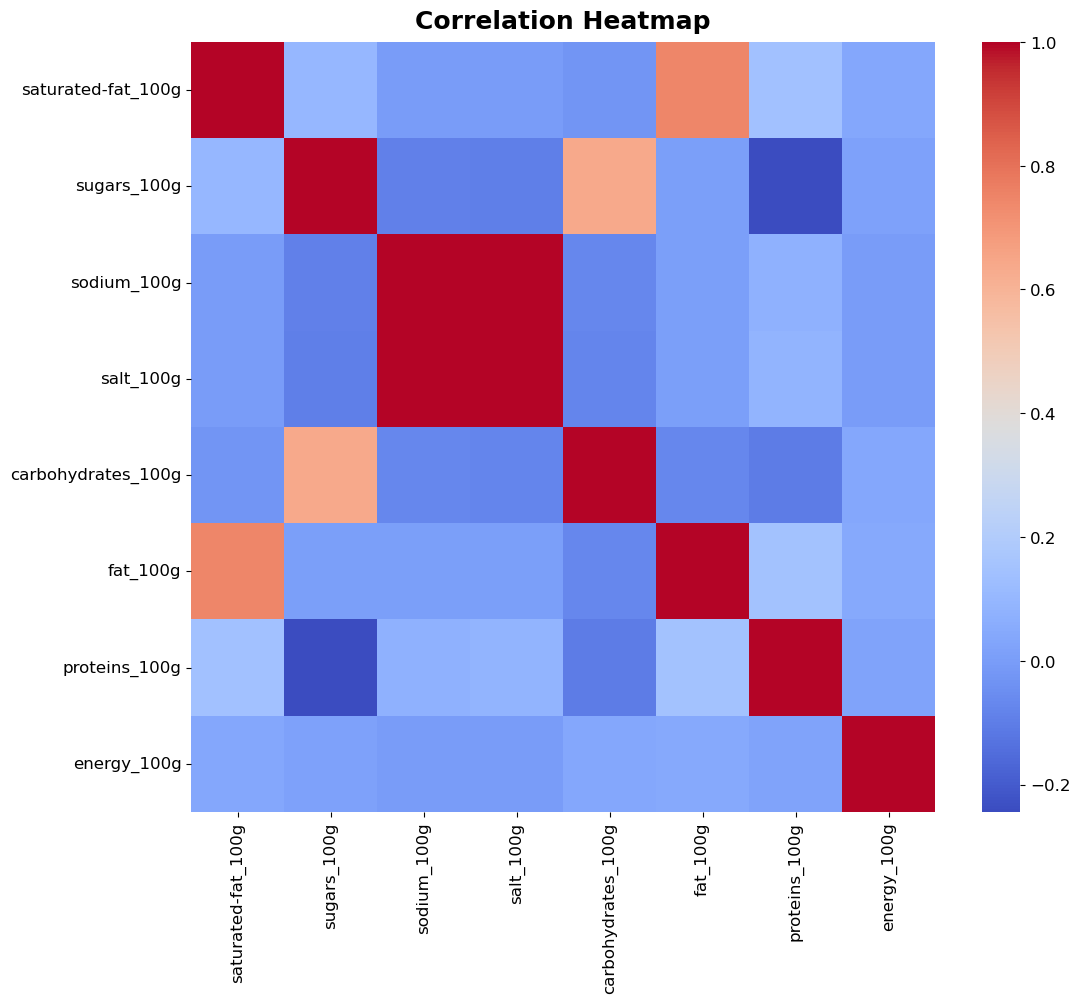

High Correlation: sodium_100g - salt_100g = 1.00


In [23]:
# ==================================================================================================
# Correlation between parameters
# ==================================================================================================
numerical_features = ['saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                  'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']
correlation_matrix = df_features_filtered[numerical_features].corr()

# Set a larger figure size
plt.figure(figsize=(12, 10))
heatmap  = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Increase fontsize for x-axis and y-axis titles
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=14, weight='bold')
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=14, weight='bold')

plt.title('Correlation Heatmap', fontsize=18, weight='bold')

plt.show()


# Find pairs with correlation greater than 0.9 or less than -0.9
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.9:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation)
            high_correlation_pairs.append(pair)

# Display the high correlation pairs
for pair in high_correlation_pairs:
    print(f"High Correlation: {pair[0]} - {pair[1]} = {pair[2]:.2f}")

# STEP 3. 
Identify and address outliers.

<div class="alert alert-block alert-info">
    
- In this step, i checked the remaining potential outliers (we already removed a lot of incoherences! It is the equivalent of a approach oriented metier). 
- To detect potential outliers, im using the boxplots and the IQR method. 
- However i got a major problem concerning the question : is my product an atypic value or an outlier ? 
- So, I decided to check for the most important outliers into big shops like Carrefour for getting the real/good value for the nutrition information. It helped me to created some treshold to consider that an extreme value is an outlier or an atypic value.
  
</div>

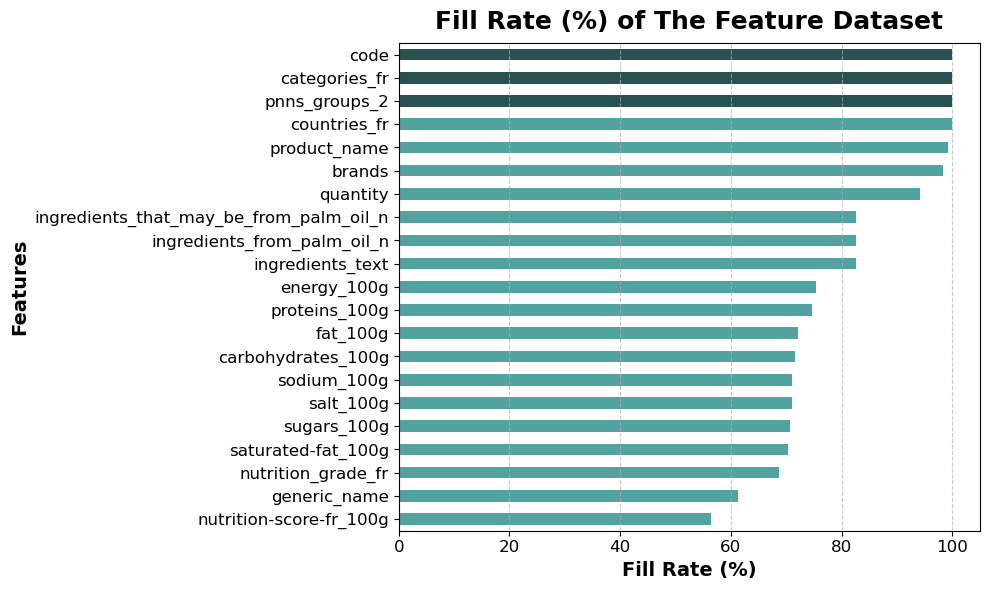

In [24]:
# Calculate the percentage of missing values for each feature
fill_rate_percentages = 100 - (df_features_filtered.isnull().sum() / len(df_features_filtered)) * 100

# Sort fill_rate_percentages
fill_rate_percentages_sorted = fill_rate_percentages.sort_values(ascending=True)  # Sorting in ascending order

# Set color to dark blue when fill rate is 100%, otherwise use skyblue
colors = [blue_green_dark if rate == 100 else blue_green for rate in fill_rate_percentages_sorted]

# Plotting
plt.figure(figsize=(10, 6))
fill_rate_percentages_sorted.plot(kind='barh', color=colors)
plt.title('Fill Rate (%) of The Feature Dataset', fontsize=18, fontweight='bold')
plt.xlabel('Fill Rate (%)', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Customize x-axis ticks to display only every nth label
n = 1  # Display every 5th label
plt.yticks(range(0, len(fill_rate_percentages_sorted), n), fill_rate_percentages_sorted.index[::n])

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines

plt.tight_layout()
plt.show()

## III.1. Creation of a dataset for BEVERAGES and a dataset for SOLID FOOD

In [25]:
# ==================================================================================================
# GET TWO DATASET : BEVERAGE AND SOLIDFOOD DATASET
# ==================================================================================================

filtered_rows_others = df_features_filtered[~df_features_filtered['quantity'].str.contains('.*(g|ml)$', na=True)]
df_features_filtered = df_features_filtered.drop(filtered_rows_others.index) # Delete the rows which the cleaning of 'quantity' have been unsuccessful. (It correspond to len(filtered_rows_others), so 423 rows). 
df_features_filtered = df_features_filtered.reset_index(drop=True)

filtered_rows_liquid = df_features_filtered[df_features_filtered['quantity'].str.contains('.*ml$', na=False)]
filtered_rows_solid = df_features_filtered[df_features_filtered['quantity'].str.contains('.*g$', na=False)]

# Define keywords indicating beverages in both French and English
beverage_keywords = ['water', 'juice', 'drink', 'beverage', 'milk', 'soda', 'eau', 'jus', 'boisson', 'soda', 'lait']

# Convert keywords to lowercase to match case-insensitive
beverage_keywords = [keyword.lower() for keyword in beverage_keywords]

# Create masks based on different criteria
quantity_mask = df_features_filtered['quantity'].str.lower().str.endswith('ml')
product_name_mask = df_features_filtered['generic_name'].str.lower().str.contains('|'.join(beverage_keywords))
pnns_groups_mask = df_features_filtered['pnns_groups_2'].str.lower().str.contains('boissons|beverages|juices|nectars|unknown')
# For pnns_groups_mask, we include: 1. sweetened beverages, 2. non-sugared beverages, 3. fruit juices, 4. alcoholic beverages and 5. fruit nectars


# Combine masks using logical OR to create the final mask for beverages
beverage_mask = (quantity_mask & product_name_mask)  | pnns_groups_mask 
beverage_mask = quantity_mask & (pnns_groups_mask  | product_name_mask)




# # Create a mask based on the condition that 'generic_name' contains 'boire' or 'drink'
# generic_name_boire_mask = df_features_filtered['generic_name'].str.lower().str.contains('boire|drink')
# # Combine this mask with the existing beverage mask using logical OR
# beverage_mask = beverage_mask | generic_name_boire_mask


# Create datasets for beverages and solid foods
beverages_df = df_features_filtered[beverage_mask]
solid_foods_df = df_features_filtered[~beverage_mask]

beverages_df = beverages_df.reset_index(drop=True)
solid_foods_df = solid_foods_df.reset_index(drop=True)

print(f'There are {len(beverages_df)} BEVERAGES !!')
print(f'There are {len(solid_foods_df)} SOLID FOOD !!')

# solid_foods_df[['generic_name', 'ingredients_text', 'product_name', 'pnns_groups_2', 'quantity']].tail(500)


C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\2530376840.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_rows_others = df_features_filtered[~df_features_filtered['quantity'].str.contains('.*(g|ml)$', na=True)]


There are 10213 BEVERAGES !!
There are 71454 SOLID FOOD !!


## III.2. Some stats

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots_by_nutrition_grade(df):
    numerical_features_including_nutrition_score_fr_100g = ['nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                                                            'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']
    
    # Define color map for nutrition grades
    grade_colors = {'a': 'darkgreen', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}

    # Remove rows with NaN values
    df = df.dropna(subset=numerical_features_including_nutrition_score_fr_100g + ['nutrition_grade_fr'])
    
    # Sort the dataframe based on nutrition grade
    df_sorted = df.sort_values(by='nutrition_grade_fr')
    
    # Create multiple subplots
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(40, 15))
    
    # Iterate over each numerical feature and create a box plot
    for i, feature in enumerate(numerical_features_including_nutrition_score_fr_100g):
        row = i // 5
        col = i % 5
        
        sns.boxplot(x="nutrition_grade_fr", y=feature, data=df_sorted, ax=axes[row, col], order=['a', 'b', 'c', 'd', 'e'], palette=grade_colors.values(), flierprops=dict(markerfacecolor='lightblue', marker='o'))  # Specify the order of nutrition grades
        axes[row, col].set_title(f"Boxplot of {feature} by nutrition_grade_fr", fontsize=18, fontweight='bold')
        axes[row, col].set_xlabel("nutrition_grade_fr", fontsize=14, fontweight='bold')
        axes[row, col].set_ylabel(feature, fontsize=14, fontweight='bold')
        
        # Set y-axis limits
        if feature == 'energy_100g':
            axes[row, col].set_ylim(0, 4000)  # Remove upper limit with none
            axes[row, col].set_yticks(range(0, int(df_sorted['energy_100g'].max()) + 100, 100))  # Set y-axis ticks for energy
        elif feature == 'nutrition-score-fr_100g':
            axes[row, col].set_ylim(0, 50)  # Set upper limit to 50
            axes[row, col].set_yticks(range(0, 51, 5))  # Set y-axis ticks for nutrition score
        else:
            axes[row, col].set_ylim(0, 100)
            axes[row, col].set_yticks(range(0, 101, 10))  # Set y-axis ticks for other features
    
        # Add grid
        axes[row, col].grid(True, linestyle='--', linewidth=0.5)
        
        # Compute and store legend labels and colors
        legend_labels = {}
        legend_colors = {}
        
        for grade in sorted(df_sorted['nutrition_grade_fr'].unique()):
            # Calculate quartiles and IQR
            Q1 = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(0.25)
            Q3 = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(0.75)
            IQR = Q3 - Q1
        
            # Determine the lower and upper whiskers without considering outliers
            lower_whisker = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(0.00)
            upper_whisker = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(1.00)
            lower_threshold = max(Q1 - 1.5 * IQR, lower_whisker)
            upper_threshold = min(Q3 + 1.5 * IQR, upper_whisker)
        
            # Check for NaN values in thresholds
            if not np.isnan(lower_threshold) and not np.isnan(upper_threshold):
                # Store legend labels and colors
                legend_labels[grade] = f'[{int(lower_threshold)}, {int(upper_threshold)}]'
                legend_colors[grade] = grade_colors[grade]
            else:
                # If there's a NaN value, indicate it in the legend label
                legend_labels[grade] = '   '
                legend_colors[grade] = grade_colors[grade]
        
        # Create legend inside the subplot for nutrition grade range
        handles = [plt.Line2D([0], [0], color=legend_colors[grade], linewidth=3, linestyle='-') for grade in sorted(df_sorted['nutrition_grade_fr'].unique())]
        labels = [f'{grade}: {legend_labels[grade]}' for grade in sorted(df_sorted['nutrition_grade_fr'].unique())]
        # Add a blank label to create space
        labels.append('')
        handles.append(plt.Line2D([0], [0], color='white', linewidth=0))  # Add a blank line
        # Add IQR threshold line to the legend
        handles.append(plt.Line2D([0], [0], color='blue', linewidth=4, linestyle='--'))
        labels.append('IQR Threshold')
        axes[row, col].legend(handles, labels, loc='upper left', title='Legend', title_fontsize='15')

	# Add IQR limit lines
        for grade in sorted(df_sorted['nutrition_grade_fr'].unique()):
            # Calculate quartiles and IQR again for the vertical lines
            Q1 = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(0.25)
            Q3 = df_sorted[df_sorted['nutrition_grade_fr'] == grade][feature].quantile(0.75)
            IQR = Q3 - Q1
            
            # Determine the width of the boxplots
            box_width = 0.4  # You may need to adjust this value depending on your plot
            
            # Calculate the x-coordinate position of each grade's boxplot
            grade_pos = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}
            x_pos = grade_pos[grade]
            
            # Draw horizontal lines at the upper and lower whiskers
            # axes[row, col].plot([x_pos - box_width/2, x_pos + box_width/2], [Q1 - 1.5 * IQR, Q1 - 1.5 * IQR], color='gray', linestyle='--', linewidth=2)
            # axes[row, col].plot([x_pos - box_width/2, x_pos + box_width/2], [Q3 + 1.5 * IQR, Q3 + 1.5 * IQR], color='gray', linestyle='--', linewidth=2)
            # Draw horizontal lines at the upper and lower whiskers
            axes[row, col].plot([x_pos - box_width/2, x_pos + box_width/2], [Q1 - 1.5 * IQR, Q1 - 1.5 * IQR], color='blue', linestyle='solid', linewidth=4)
            axes[row, col].plot([x_pos - box_width/2, x_pos + box_width/2], [Q3 + 1.5 * IQR, Q3 + 1.5 * IQR], color='blue', linestyle='solid', linewidth=4)
            
        
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_outlier_scatter(df, current_indicator, coef_IQR=1.7):
    # Calculate IQR for the current indicator
    Q1 = df[current_indicator].quantile(0.25)
    Q3 = df[current_indicator].quantile(0.75)
    IQR = Q3 - Q1

    # Define threshold for outlier detection
    lower_threshold = Q1 - coef_IQR * IQR
    upper_threshold = Q3 + coef_IQR * IQR

    # Detect outliers
    outliers = df[(df[current_indicator] < lower_threshold) | 
                  (df[current_indicator] > upper_threshold)]

    # Scatterplot with enhanced features
    plt.figure(figsize=(20, 12))  # Adjust figure size for better visibility

    # Scatterplot with transparency and outlier highlight
    sns.scatterplot(x=current_indicator, y='nutrition-score-fr_100g', data=df, alpha=0.6)
    sns.scatterplot(x=outliers[current_indicator], y=outliers['nutrition-score-fr_100g'], color='red', marker='o', s=50, label='Outliers')

    # Regression line
    sns.regplot(x=current_indicator, y='nutrition-score-fr_100g', data=df, scatter=False, color='green', label='Regression line')

    # Plot the IQR thresholds
    plt.axvline(x=lower_threshold, color='yellow', linestyle='--', label=f'Lower Threshold (Q1 - {coef_IQR}*IQR)')
    plt.axvline(x=upper_threshold, color='yellow', linestyle='--', label=f'Upper Threshold (Q3 + {coef_IQR}*IQR)')

    
    plt.title(f'Scatterplot: {current_indicator} vs. Nutrition Score', fontsize=18, fontweight='bold')
    plt.xlabel(f'{current_indicator} (g/100g)', fontsize=14, fontweight='bold')
    plt.ylabel('Nutrition Score', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Number of outliers for", current_indicator, ":", len(outliers), "/", len(df[current_indicator]))

    return outliers



In [28]:
beverages_df['nutrition_grade_fr'].unique()

array([nan, 'e', 'b', 'c', 'd', 'a'], dtype=object)

### III.2.1. BEVERAGES

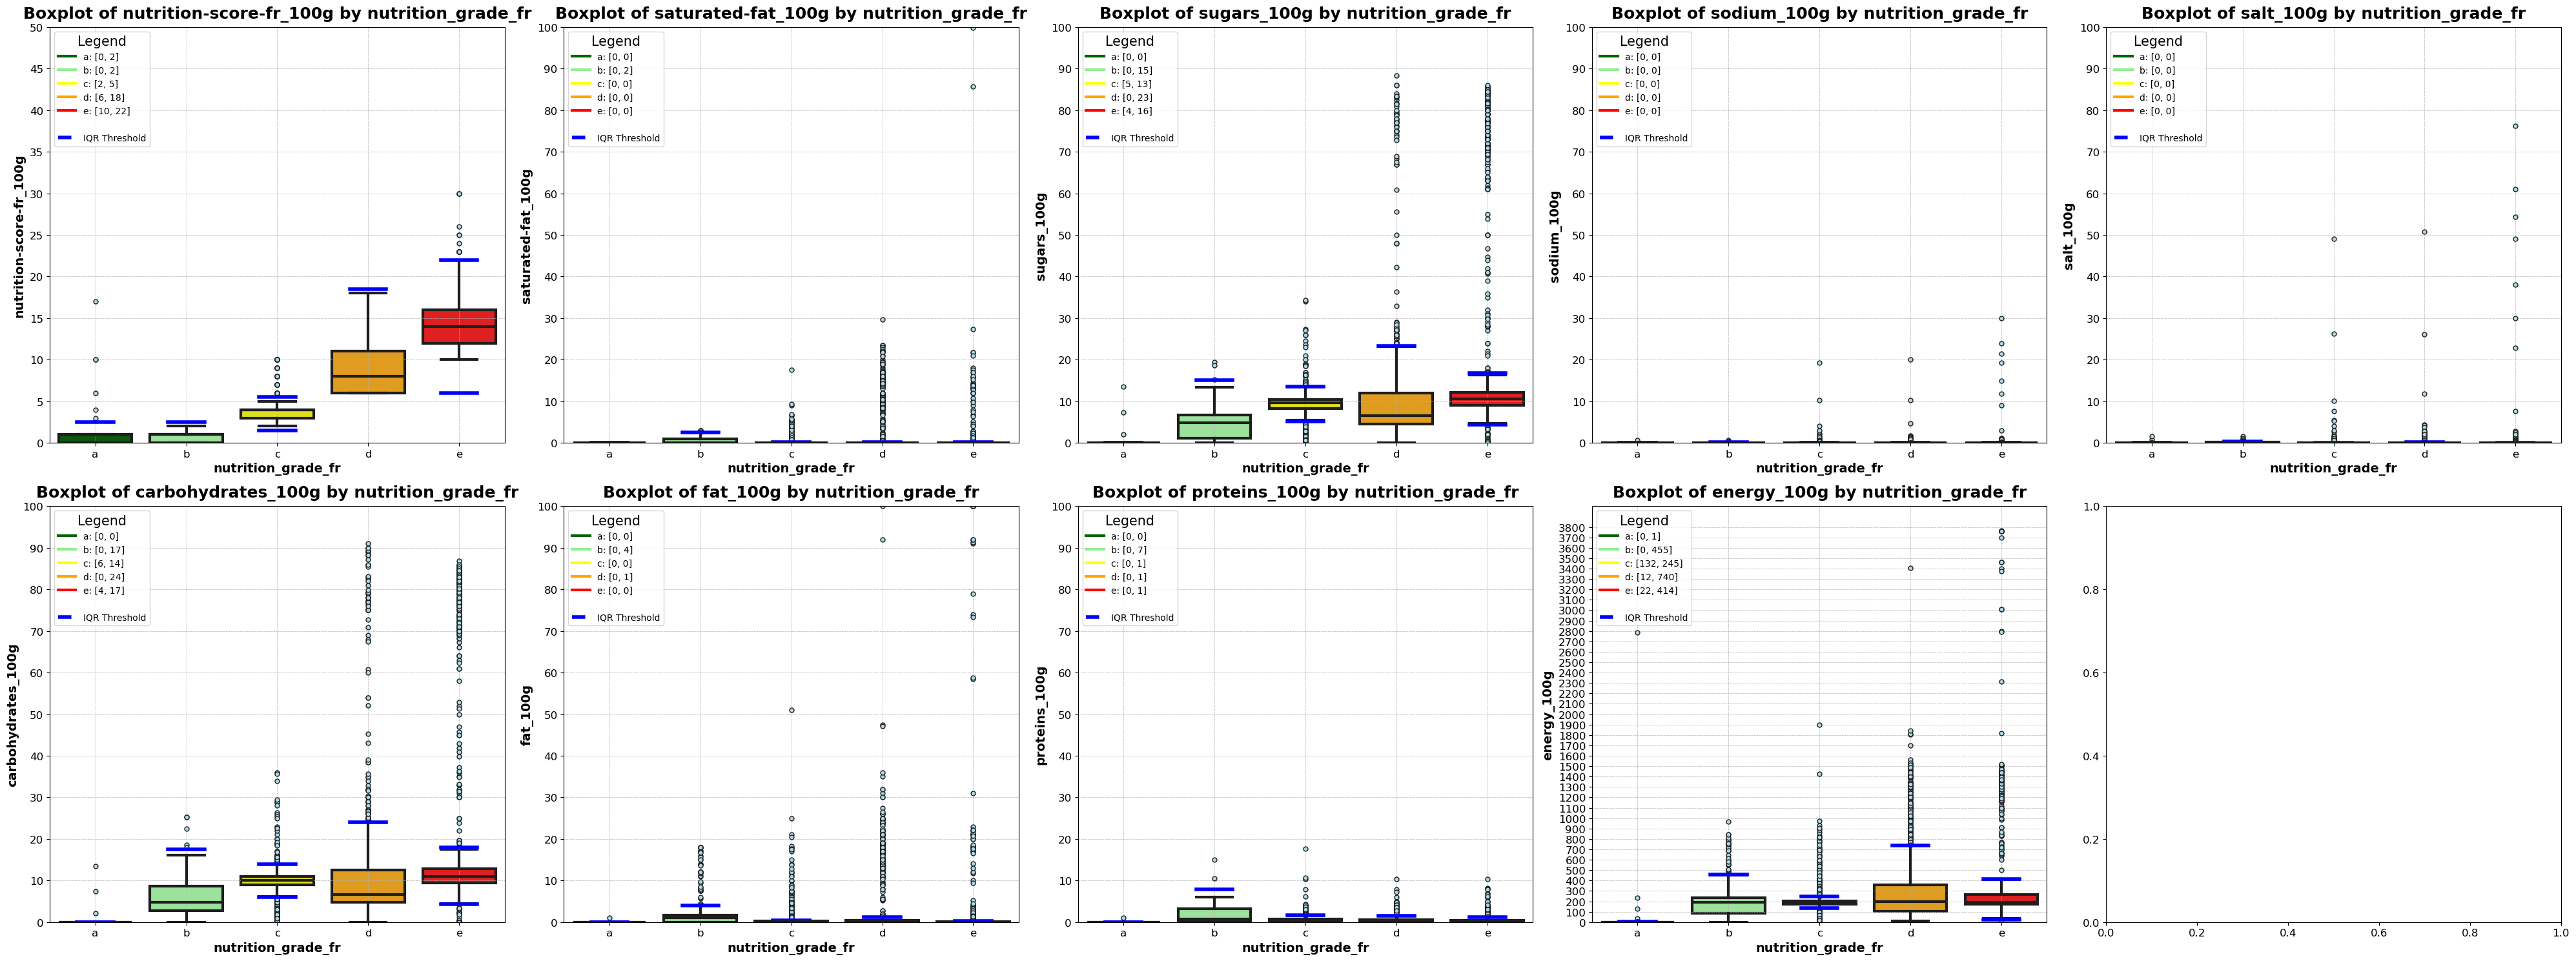

In [29]:
# ==================================================================================================
# BOXPLOTS OF EACH INDICATOR VS NUTRITION GRADE FOR THE BEVERAGES 
# ==================================================================================================
# Call the function with df_features_filtered as input
plot_boxplots_by_nutrition_grade(beverages_df)

In [30]:
# ==================================================================================================
# GET THE POTENTIAL OUTLIERS FOR THE BEVERAGES FOR ONE INDICATOR
# ==================================================================================================
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

# Define the list of numerical features including 'nutrition-score-fr_100g'
numerical_features_including_nutrition_score_fr_100g = ['nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                                                        'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']

data_outliers = pd.DataFrame([])

# Iterate over each numerical feature
for currentIndicator in numerical_features_including_nutrition_score_fr_100g:
    for grade in beverages_df['nutrition_grade_fr'].unique():
        df_outlier = beverages_df.sort_values(['nutrition_grade_fr'])
        df_outlier = df_outlier.loc[df_outlier['nutrition_grade_fr'] == grade, :]
        outliers = box_outliers(df_outlier[currentIndicator])
        outlier_index = outliers.index.tolist()             # Store the index before resetting it
        df_outlier.reset_index(drop=True, inplace=True)     # Reset the index to match the original dataframe
        outliers.index = outlier_index                      # Assign the stored index back to the outliers
        df_outliers = pd.DataFrame({'outlier_index': outliers.index, 'outlier_value': outliers.values, 'outlier_grade': grade, 'outlier_indicator': currentIndicator})

        # Create a DataFrame to store the outliers information
        data_outliers = pd.concat([data_outliers, df_outliers])

data_outliers.reset_index(drop=True, inplace=True)
print(f'Using IQR, there are {len(data_outliers)} outliers detected. Lets check if they abberant or atypic in the next part.')
# data_outliers['outlier_index']
data_outliers.head(200)

Using IQR, there are 5133 outliers detected. Lets check if they abberant or atypic in the next part.


outlier_index  outlier_value outlier_grade        outlier_indicator
0            8491          26.00             e  nutrition-score-fr_100g
1            2418          30.00             e  nutrition-score-fr_100g
2             982          25.00             e  nutrition-score-fr_100g
3             446          30.00             e  nutrition-score-fr_100g
4            1436          30.00             e  nutrition-score-fr_100g
5            6419          25.00             e  nutrition-score-fr_100g
6            7267          30.00             e  nutrition-score-fr_100g
7            4292          25.00             e  nutrition-score-fr_100g
8            3796          25.00             e  nutrition-score-fr_100g
9            8766          10.00             c  nutrition-score-fr_100g
10           8866           7.00             c  nutrition-score-fr_100g
11           4022           6.00             c  nutrition-score-fr_100g
12           4023           7.00             c  nutrition-score-fr_100g
13           4024          10.00             c  nutrition-score-fr_100g
14           4325           7.00             c  nutrition-score-fr_100g
15           8865           8.00             c  nutrition-score-fr_100g
16           4595           7.00             c  nutrition-score-fr_100g
17           8881           6.00             c  nutrition-score-fr_100g
18           8703          10.00             c  nutrition-score-fr_100g
19           6740           8.00             c  nutrition-score-fr_100g
20           8051           6.00             c  nutrition-score-fr_100g
21           8187          10.00             c  nutrition-score-fr_100g
22           8230           8.00             c  nutrition-score-fr_100g
23           7581           7.00             c  nutrition-score-fr_100g
24           7550          10.00             c  nutrition-score-fr_100g
25           6017           8.00             c  nutrition-score-fr_100g
26           8487           6.00             c  nutrition-score-fr_100g
27           5573           6.00             c  nutrition-score-fr_100g
28           2207          10.00             c  nutrition-score-fr_100g
29           2193          10.00             c  nutrition-score-fr_100g
30           2175           6.00             c  nutrition-score-fr_100g
31           2332           9.00             c  nutrition-score-fr_100g
32           9735           8.00             c  nutrition-score-fr_100g
33           9651           6.00             c  nutrition-score-fr_100g
34           1904           7.00             c  nutrition-score-fr_100g
35           2383           9.00             c  nutrition-score-fr_100g
36             41           9.00             c  nutrition-score-fr_100g
37            708          10.00             c  nutrition-score-fr_100g
38           1463          10.00             c  nutrition-score-fr_100g
39           9848           9.00             c  nutrition-score-fr_100g
40           1277           9.00             c  nutrition-score-fr_100g
41           1113           6.00             c  nutrition-score-fr_100g
42           1343          10.00             c  nutrition-score-fr_100g
43           9886           8.00             c  nutrition-score-fr_100g
44           3682           7.00             c  nutrition-score-fr_100g
45           9117          10.00             c  nutrition-score-fr_100g
46           3688           9.00             c  nutrition-score-fr_100g
47           8247          17.00             d  nutrition-score-fr_100g
48            758          14.00             d  nutrition-score-fr_100g
49           9736          18.00             d  nutrition-score-fr_100g
50           9738          15.00             d  nutrition-score-fr_100g
51           9737          15.00             d  nutrition-score-fr_100g
52           4405          18.00             d  nutrition-score-fr_100g
53           4404          17.00             d  nutrition-score-fr_100g
54           4403          15.00            

In [31]:
# ==================================================================================================
# USE THIS CODE TO GET THE LIST OF PRODUCT WHICH ARE CONSIDER OUTLIERS FOR ONE SPECIFIC INDICATOR. 
# THEN GO TO CARREFOUR or GOOGLE to SEARCH THE PRODUCTS. 
# THEN FIND THE REEL IndicatorIwant VALUE. IT IS OUR FILTER NOW. 
# ==================================================================================================

IndicatorIwant = 'energy_100g'
idxIWant = data_outliers[data_outliers['outlier_indicator'] == IndicatorIwant]['outlier_index']

# beverages_df.loc[idxIWant][['generic_name', 'saturated-fat_100g', 'ingredients_text', 'product_name', 'pnns_groups_2', 'categories_fr']]
# Select the subset of data and sort by 'sodium_100g'
sorted_df = beverages_df.loc[idxIWant][['generic_name', IndicatorIwant, 'ingredients_text', 'product_name', 'pnns_groups_2', 'categories_fr']].sort_values(by=IndicatorIwant, ascending=False)
sorted_df.head(200)

generic_name  energy_100g  \
2590                                  sirop de grenadine       5268.0   
3348                                                 NaN       5263.0   
9323                                                 NaN       3766.0   
9389                        aceite de oliva virgen extra       3761.0   
9387                        aceite de oliva virgen extra       3761.0   
9386                        aceite de oliva virgen extra       3761.0   
9385                        aceite de oliva virgen extra       3761.0   
9384                        aceite de oliva virgen extra       3761.0   
68                                        aceite de coco       3760.0   
10137                                            mct oil       3700.0   
9230                                       huile d'olive       3464.0   
7806                        huile pour wok à la chinoise       3464.0   
855                        mélange de 4 huiles végétales       3406.0   
4526                                                 NaN       3404.0   
9723   flüssige pflanzenfettzubereitung mit natürlich...       3400.0   
823                          azeite vrgem extra clássico       3378.0   
6419   nappage croquant pour glaces, au cacao forteme...       3012.0   
8860                                          mayonnaise       3010.0   
9724                                                 NaN       2800.0   
168                                           hellmann's       2790.0   
1297                               eau minéral naturelle       2787.0   
8229         sauce tartare douce avec morceaux d'oignons       2311.0   
9848                                  produit de cuisson       1900.0   
494                                                  NaN       1845.0   
7868                                lait concentré sucré       1815.0   
289                                   double fresh cream       1808.0   
7869                                                 NaN       1803.0   
6664                           konzentrierter agavensaft       1760.0   
6663                                      agavendicksaft       1760.0   
1001                                                 NaN       1700.0   
3684   crème glacée à la vanille, chocolat au lait, s...       1562.0   
4308                                                 NaN       1532.0   
2746                    sirop d'érable canada n°1 medium       1530.0   
1003                                                 NaN       1520.0   
2599                                                 NaN       1517.0   
8515                                            maionese       1517.0   
2981                                  sirop de framboise       1515.0   
2727                                                 NaN       1515.0   
4129                                                 NaN       1514.0   
189    vanilla ice cream dipped in rich milk chocolat...       1510.0   
8838                                      sirop d'érable       1510.0   
6527   glace au cacao-miel avec morceaux de chocolat ...       1502.0   
9813   glace au chocolat au lait enrobée de sauce au ...       1500.0   
8910                                                 NaN       1495.0   
4816                                      sirop d'erable       1488.0   
3855                                                 NaN       1487.0   
758                                                  NaN       1482.0   
3798                                                 NaN       1474.0   
3212                                                 NaN       1470.0   
3220                                                 NaN       1468.0   
9839   préparation aromatisée pour boissons rafraîchi...       1462.0   
2588                                     sirop de citron       1460.0   
2418                                  sirop de grenadine       1460.0   
9784   crème glacée vanille, morceaux d'amandes et éc...       1460.0   
310                          

In [32]:
# ==================================================================================================
# TRANSFORM THE OUTLIERS INTO NAN VALUES
# WE WILL IMPUTE THE MISSING VALUE IN STEP 4. 
# ==================================================================================================
# Initialize counters for each step
removed_outliers_step1 = 0
removed_outliers_step2 = 0
removed_outliers_step3 = 0
removed_outliers_step4 = 0
removed_outliers_step5 = 0
removed_outliers_step6 = 0
removed_outliers_step7 = 0
removed_outliers_step8 = 0
removed_outliers_step9 = 0

# Iterate over the rows of data_outliers
for index, row in data_outliers.iterrows():
    # Get the outlier grade and value
    grade = row['outlier_grade']
    outlier_value = row['outlier_value']
    outlier_index = row['outlier_index']
    outlier_indicator = row['outlier_indicator']
    
    #STEP 1 : Replace outliers from 'nutrition_grade_fr' by NaN !!!
    if grade == 'a' and outlier_value > 1 and outlier_indicator == 'nutrition-score-fr_100g':
        beverages_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'b' and outlier_value > 2 and outlier_indicator == 'nutrition-score-fr_100g':
        beverages_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'c' and outlier_value > 6 and outlier_indicator == 'nutrition-score-fr_100g':
        beverages_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'd' and outlier_value > 9 and outlier_indicator == 'nutrition-score-fr_100g':
        beverages_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'e' and outlier_value > 40 and outlier_indicator == 'nutrition-score-fr_100g':
        beverages_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1

    # STEP 2: Replace outliers from 'Sodium' by NaN !!!
    if outlier_indicator == 'sodium_100g' and outlier_value > 2:
        beverages_df.loc[outlier_index, 'sodium_100g'] = np.nan
        removed_outliers_step2 += 1

    # STEP 3: Replace outliers from 'saturated-fat_100g' by NaN !!! 
    if outlier_indicator == 'saturated-fat_100g' and outlier_value > 24:
        beverages_df.loc[outlier_index, 'saturated-fat_100g'] = np.nan
        removed_outliers_step3 += 1

    # STEP 4: Replace outliers from 'salt_100g' by NaN !!!
    if outlier_indicator == 'salt_100g' and outlier_value > 6:
        beverages_df.loc[outlier_index, 'salt_100g'] = np.nan
        removed_outliers_step4 += 1

    # STEP 5: Replace outliers from 'proteins_100g' by NaN !!!
    if outlier_indicator == 'proteins_100g' and outlier_value > 2.5:
        beverages_df.loc[outlier_index, 'proteins_100g'] = np.nan
        removed_outliers_step5 += 1

    # STEP 6: Replace outliers from 'carbohydrates_100g' by NaN !!!
    if outlier_indicator == 'carbohydrates_100g' and outlier_value > 80:
        beverages_df.loc[outlier_index, 'carbohydrates_100g'] = np.nan
        removed_outliers_step6 += 1

    # STEP 7: Replace outliers from 'energy_100g' by NaN !!!
    if outlier_indicator == 'energy_100g' and outlier_value > 1200:
        beverages_df.loc[outlier_index, 'energy_100g'] = np.nan
        removed_outliers_step7 += 1

    # STEP 8: Replace outliers from 'fat_100g' by NaN !!!
    if outlier_indicator == 'fat_100g' and outlier_value > 92:
        beverages_df.loc[outlier_index, 'fat_100g'] = np.nan
        removed_outliers_step8 += 1

    # STEP 9: Replace outliers from 'sugars_100g' by NaN !!!
    if outlier_indicator == 'sugars_100g' and outlier_value > 82:
        beverages_df.loc[outlier_index, 'sugars_100g'] = np.nan
        removed_outliers_step9 += 1

    # About the additive, I cannot check, so I don't touch the outliers. 

# Total number of outliers removed for each step
print('Total number of outliers replaced by NaN for each step: ')
print("Step 1: ", removed_outliers_step1)
print("Step 2: ", removed_outliers_step2)
print("Step 3: ", removed_outliers_step3)
print("Step 4: ", removed_outliers_step4)
print("Step 5: ", removed_outliers_step5)
print("Step 6: ", removed_outliers_step6)
print("Step 7: ", removed_outliers_step7)
print("Step 8: ", removed_outliers_step8)
print("Step 9: ", removed_outliers_step9)
all_removed_outliers_cnt = removed_outliers_step1+removed_outliers_step2+removed_outliers_step3+removed_outliers_step4+removed_outliers_step5+removed_outliers_step6+removed_outliers_step7+removed_outliers_step8+removed_outliers_step9
print("\nTOTAL OUTLIERS : ", all_removed_outliers_cnt)

Total number of outliers replaced by NaN for each step: 
Step 1:  121
Step 2:  18
Step 3:  5
Step 4:  16
Step 5:  192
Step 6:  97
Step 7:  298
Step 8:  9
Step 9:  50

TOTAL OUTLIERS :  806


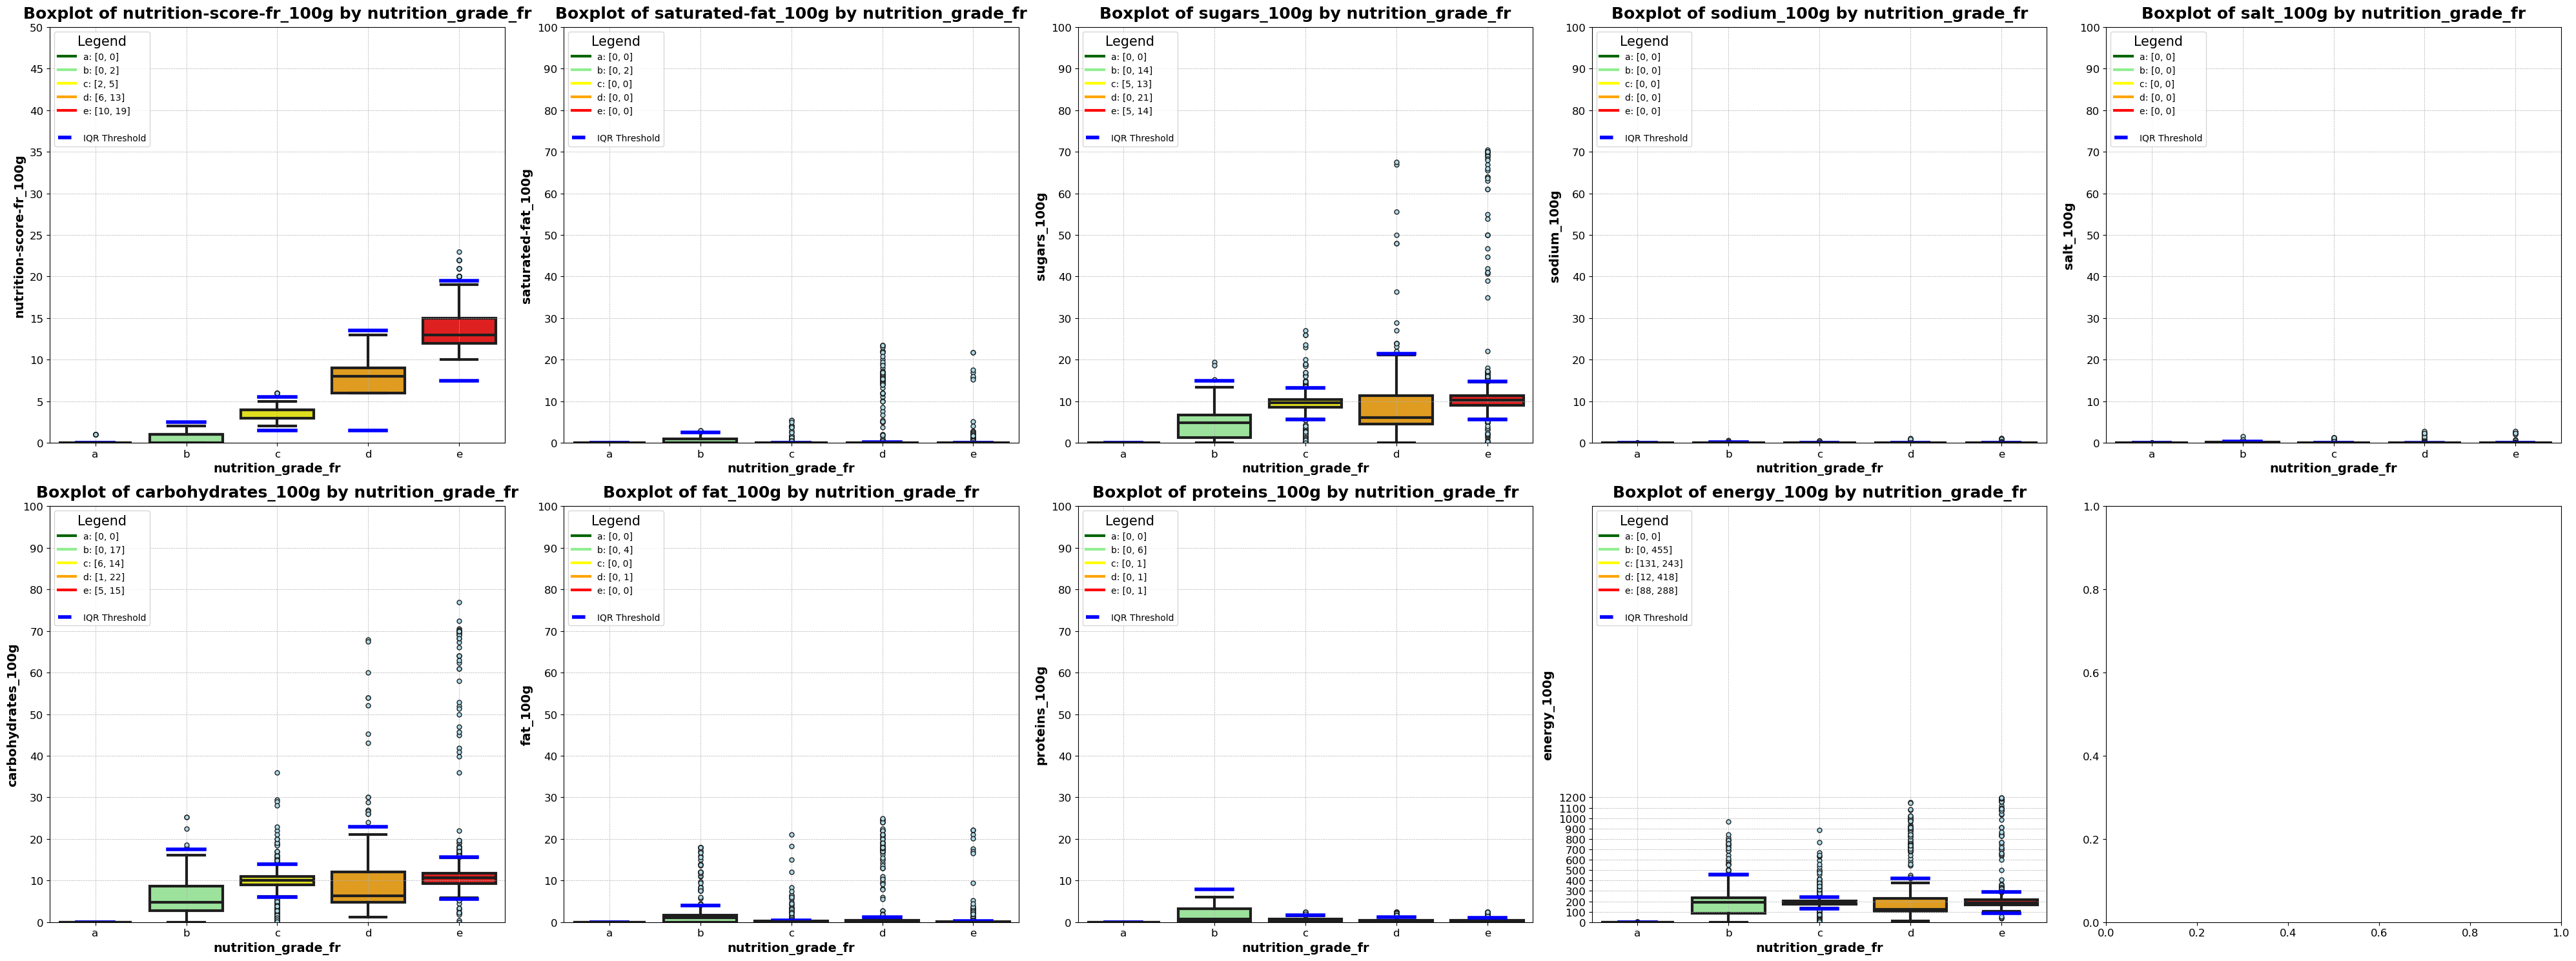

In [33]:
# ==================================================================================================
# WE CHECK AGAIN THE BOXPLOTS NOW THAT WE ARE DONE WITH OUTLIERS
# BOXPLOTS OF EACH INDICATOR VS NUTRITION GRADE FOR THE BEVERAGES 
# ==================================================================================================
# Call the function with df_features_filtered as input
plot_boxplots_by_nutrition_grade(beverages_df)

### III.2.2. SOLID FOOD

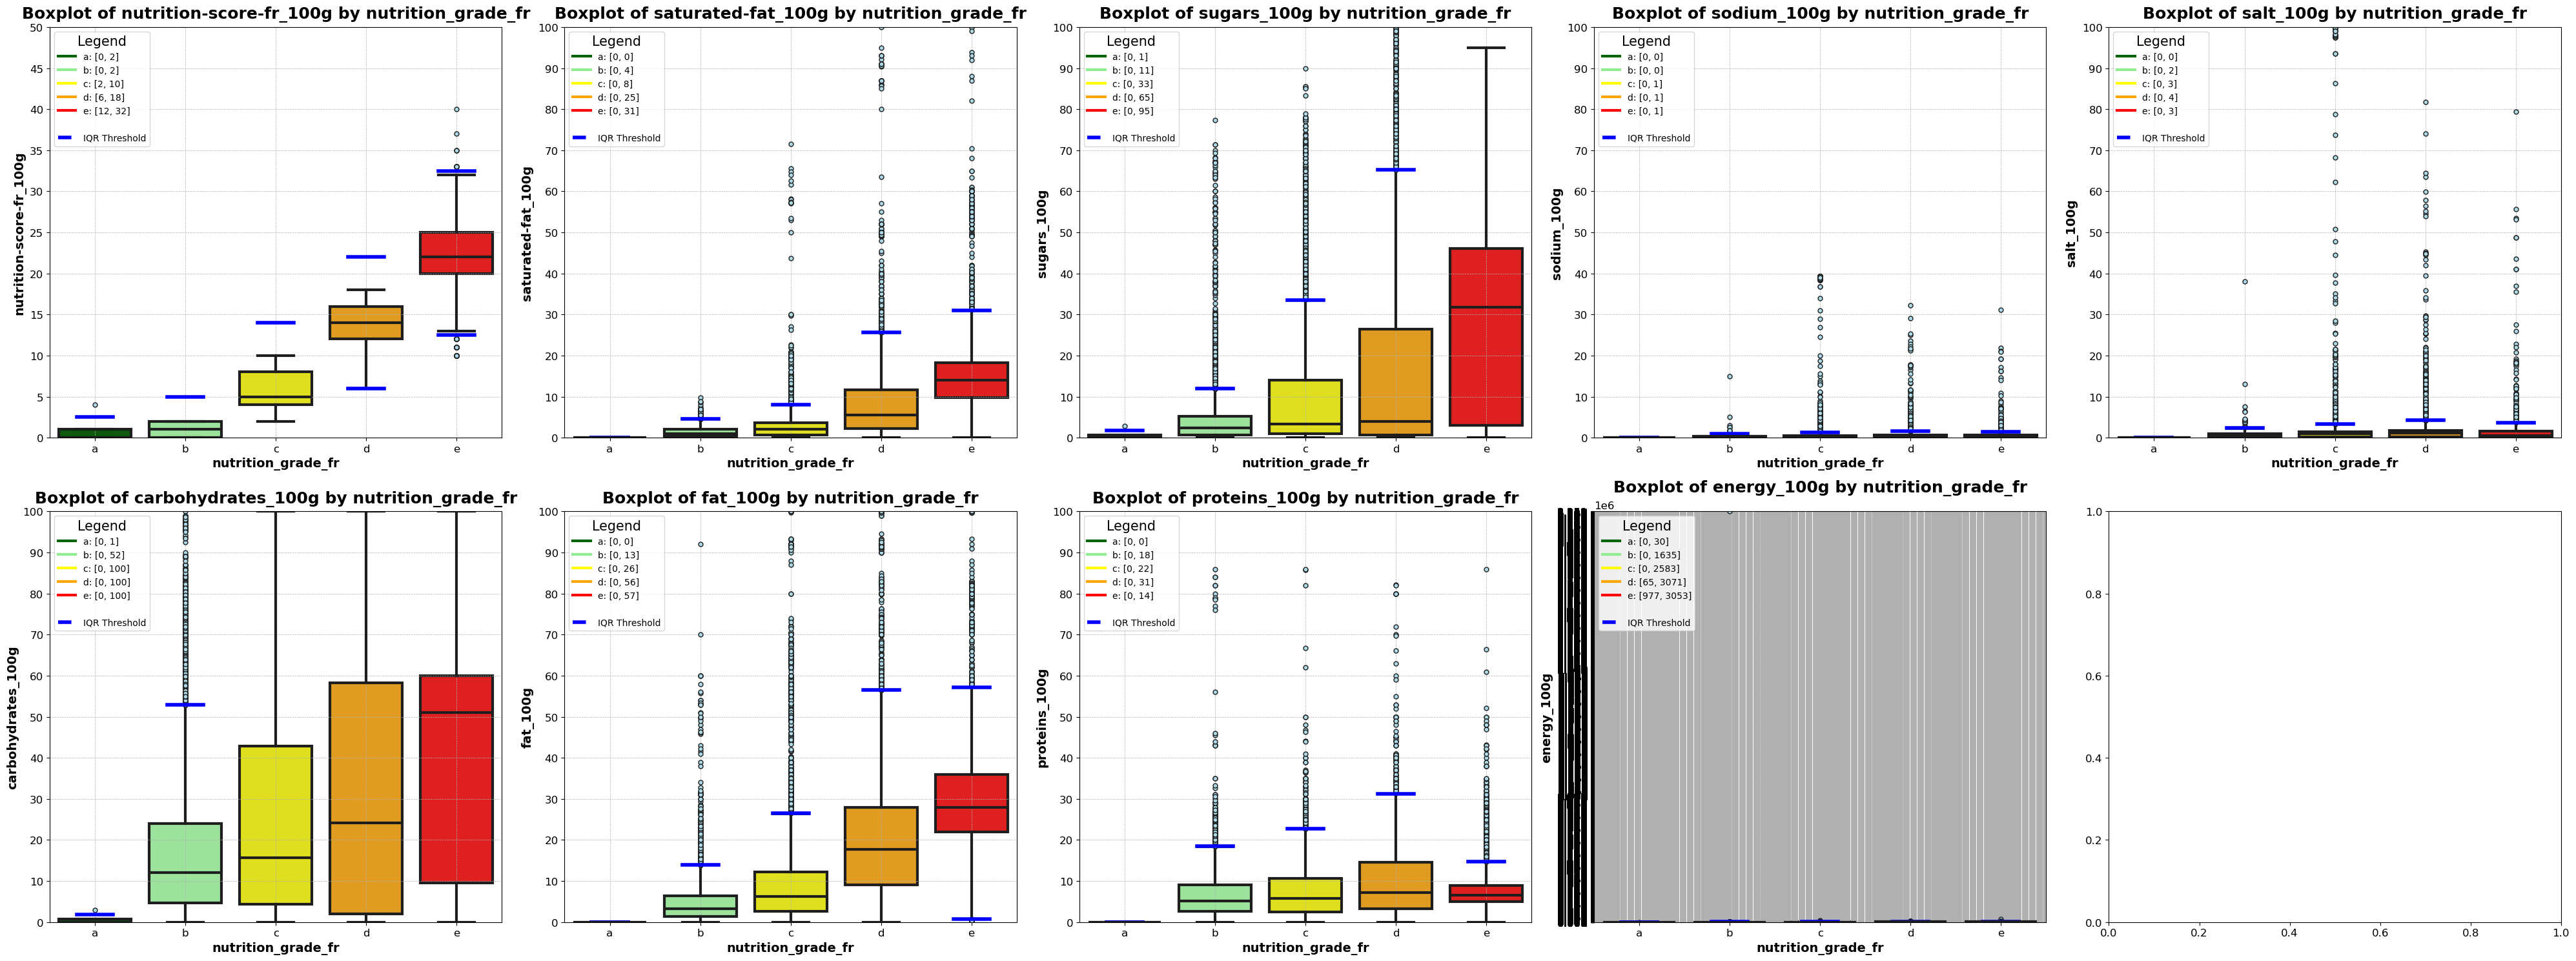

In [34]:
# ==================================================================================================
# BOXPLOTS OF EACH INDICATOR VS NUTRITION GRADE FOR THE SOLID FOOD 
# ==================================================================================================
# Call the function with df_features_filtered as input
plot_boxplots_by_nutrition_grade(solid_foods_df)

In [35]:
# ==================================================================================================
# SOLID FOOD
# GET THE POTENTIAL OUTLIERS FOR THE BEVERAGES FOR ONE INDICATOR
# ==================================================================================================
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

# Define the list of numerical features including 'nutrition-score-fr_100g'
numerical_features_including_nutrition_score_fr_100g = ['nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                                                        'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']

data_outliers = pd.DataFrame([])

# Iterate over each numerical feature
for currentIndicator in numerical_features_including_nutrition_score_fr_100g:
    for grade in solid_foods_df['nutrition_grade_fr'].unique():
        df_outlier = solid_foods_df.sort_values(['nutrition_grade_fr'])
        df_outlier = df_outlier.loc[df_outlier['nutrition_grade_fr'] == grade, :]
        outliers = box_outliers(df_outlier[currentIndicator])
        outlier_index = outliers.index.tolist()             # Store the index before resetting it
        df_outlier.reset_index(drop=True, inplace=True)     # Reset the index to match the original dataframe
        outliers.index = outlier_index                      # Assign the stored index back to the outliers
        df_outliers = pd.DataFrame({'outlier_index': outliers.index, 'outlier_value': outliers.values, 'outlier_grade': grade, 'outlier_indicator': currentIndicator})

        # Create a DataFrame to store the outliers information
        data_outliers = pd.concat([data_outliers, df_outliers])

data_outliers.reset_index(drop=True, inplace=True)
print(f'Using IQR, there are {len(data_outliers)} outliers detected. Lets check if they abberant or atypic in the next part.')
# data_outliers['outlier_index']
# data_outliers.head(200)

Using IQR, there are 17346 outliers detected. Lets check if they abberant or atypic in the next part.


In [36]:
# ==================================================================================================
# SOLID FOOD
# TRANSFORM THE OUTLIERS INTO NAN VALUES
# WE WILL IMPUTE THE MISSING VALUE IN STEP 4. 
# ==================================================================================================
# Initialize counters for each step
removed_outliers_step1 = 0
removed_outliers_step2 = 0
removed_outliers_step3 = 0
removed_outliers_step4 = 0
removed_outliers_step5 = 0
removed_outliers_step6 = 0
removed_outliers_step7 = 0
removed_outliers_step8 = 0
removed_outliers_step9 = 0

# Iterate over the rows of data_outliers
for index, row in data_outliers.iterrows():
    # Get the outlier grade and value
    grade             = row['outlier_grade']
    outlier_value     = row['outlier_value']
    outlier_index     = row['outlier_index']
    outlier_indicator = row['outlier_indicator']

    #STEP 1 : Replace outliers from 'nutrition_grade_fr' by NaN !!!
    if grade == 'a' and outlier_value > 1 and outlier_indicator == 'nutrition_grade_fr':
        solid_foods_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'b' and outlier_value > 2 and outlier_indicator == 'nutrition_grade_fr':
        solid_foods_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'c' and outlier_value > 10 and outlier_indicator == 'nutrition_grade_fr':
        solid_foods_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'd' and outlier_value > 18 and outlier_indicator == 'nutrition_grade_fr':
        solid_foods_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1
    if grade == 'e' and outlier_value > 40 and outlier_indicator == 'nutrition_grade_fr':
        solid_foods_df.loc[outlier_index, 'nutrition-score-fr_100g'] = np.nan
        removed_outliers_step1 += 1

    # STEP 2: Replace outliers from 'Sodium' by NaN !!!
    if outlier_indicator == 'sodium_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'sodium_100g'] = np.nan
        removed_outliers_step2 += 1

    # STEP 3: Replace outliers from 'saturated-fat_100g' by NaN !!!
    if outlier_indicator == 'saturated-fat_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'saturated-fat_100g'] = np.nan
        removed_outliers_step3 += 1

    # STEP 4: Replace outliers from 'salt_100g' by NaN !!!
    if outlier_indicator == 'salt_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'salt_100g'] = np.nan
        removed_outliers_step4 += 1

    # STEP 5: Replace outliers from 'proteins_100g' by NaN !!!
    if outlier_indicator == 'proteins_100g' and outlier_value > 80:
        solid_foods_df.loc[outlier_index, 'proteins_100g'] = np.nan
        removed_outliers_step5 += 1

    # STEP 6: Replace outliers from 'carbohydrates_100g' by NaN !!!
    if outlier_indicator == 'carbohydrates_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'carbohydrates_100g'] = np.nan
        removed_outliers_step6 += 1

    # STEP 7: Replace outliers from 'energy_100g' by NaN !!!
    if outlier_indicator == 'energy_100g' and outlier_value > 3400:
        solid_foods_df.loc[outlier_index, 'energy_100g'] = np.nan
        removed_outliers_step7 += 1

    # STEP 8: Replace outliers from 'fat_100g' by NaN !!!
    if outlier_indicator == 'fat_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'fat_100g'] = np.nan
        removed_outliers_step8 += 1

    # STEP 9: Replace outliers from 'sugars_100g' by NaN !!!
    if outlier_indicator == 'sugars_100g' and outlier_value > 100:
        solid_foods_df.loc[outlier_index, 'sugars_100g'] = np.nan
        removed_outliers_step9 += 1

    # About the additive, I cannot check, so I don't touch the outliers. 

# Total number of outliers removed for each step
print('Total number of outliers replaced by NaN for each step: ')
print("Step 1: ", removed_outliers_step1)
print("Step 2: ", removed_outliers_step2)
print("Step 3: ", removed_outliers_step3)
print("Step 4: ", removed_outliers_step4)
print("Step 5: ", removed_outliers_step5)
print("Step 6: ", removed_outliers_step6)
print("Step 7: ", removed_outliers_step7)
print("Step 8: ", removed_outliers_step8)
print("Step 9: ", removed_outliers_step9)
all_removed_outliers_cnt = removed_outliers_step1+removed_outliers_step2+removed_outliers_step3+removed_outliers_step4+removed_outliers_step5+removed_outliers_step6+removed_outliers_step7+removed_outliers_step8+removed_outliers_step9
print("\nTOTAL OUTLIERS : ", all_removed_outliers_cnt)

Total number of outliers replaced by NaN for each step: 
Step 1:  0
Step 2:  0
Step 3:  0
Step 4:  0
Step 5:  15
Step 6:  0
Step 7:  412
Step 8:  0
Step 9:  0

TOTAL OUTLIERS :  427


In [37]:
# ==================================================================================================
# USE THIS CODE TO GET THE LIST OF PRODUCT WHICH ARE CONSIDER OUTLIERS FOR ONE SPECIFIC INDICATOR. 
# THEN GO TO CARREFOUR or GOOGLE to SEARCH THE PRODUCTS. 
# THEN FIND THE REEL IndicatorIwant VALUE. IT IS OUR FILTER NOW. 
# ==================================================================================================
# Set the display format for floats
pd.options.display.float_format = '{:.2f}'.format
# 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
#  'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g'

IndicatorIwant = 'sugars_100g'
idxIWant = data_outliers[data_outliers['outlier_indicator'] == IndicatorIwant]['outlier_index']

# Select the subset of data and sort by 'sodium_100g'
sorted_df = solid_foods_df.loc[idxIWant][['generic_name', IndicatorIwant, 'ingredients_text', 'product_name', 'pnns_groups_2', 'categories_fr']].sort_values(by=IndicatorIwant, ascending=False)
# sorted_df.head(200)


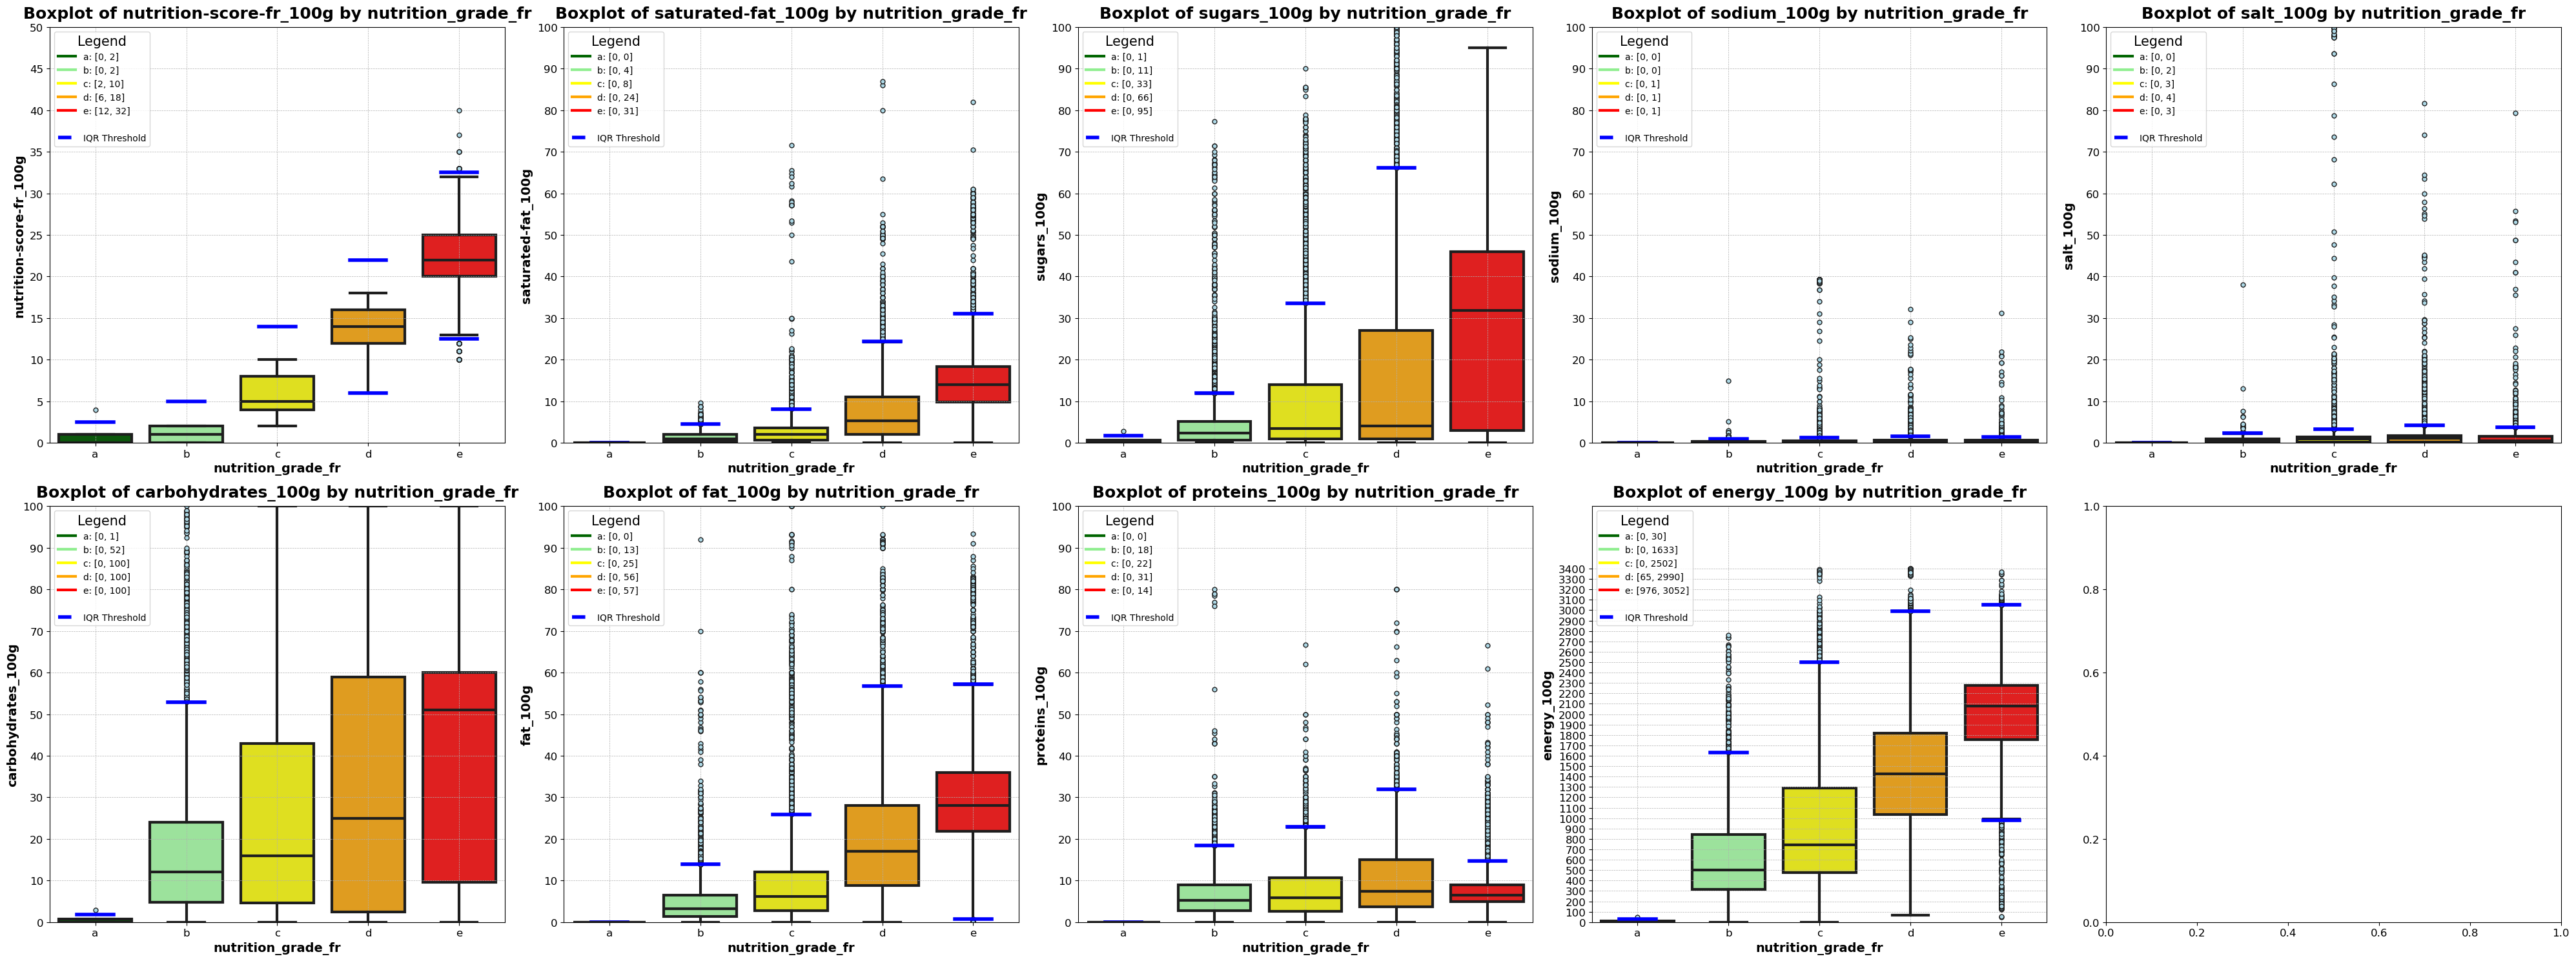

In [38]:
# ==================================================================================================
# BOXPLOTS OF EACH INDICATOR VS NUTRITION GRADE FOR THE SOLID FOOD 
# ==================================================================================================
# Call the function with df_features_filtered as input
plot_boxplots_by_nutrition_grade(solid_foods_df)

## III.3. IQR - Outliers detection

### III.3.1. BEVERAGES

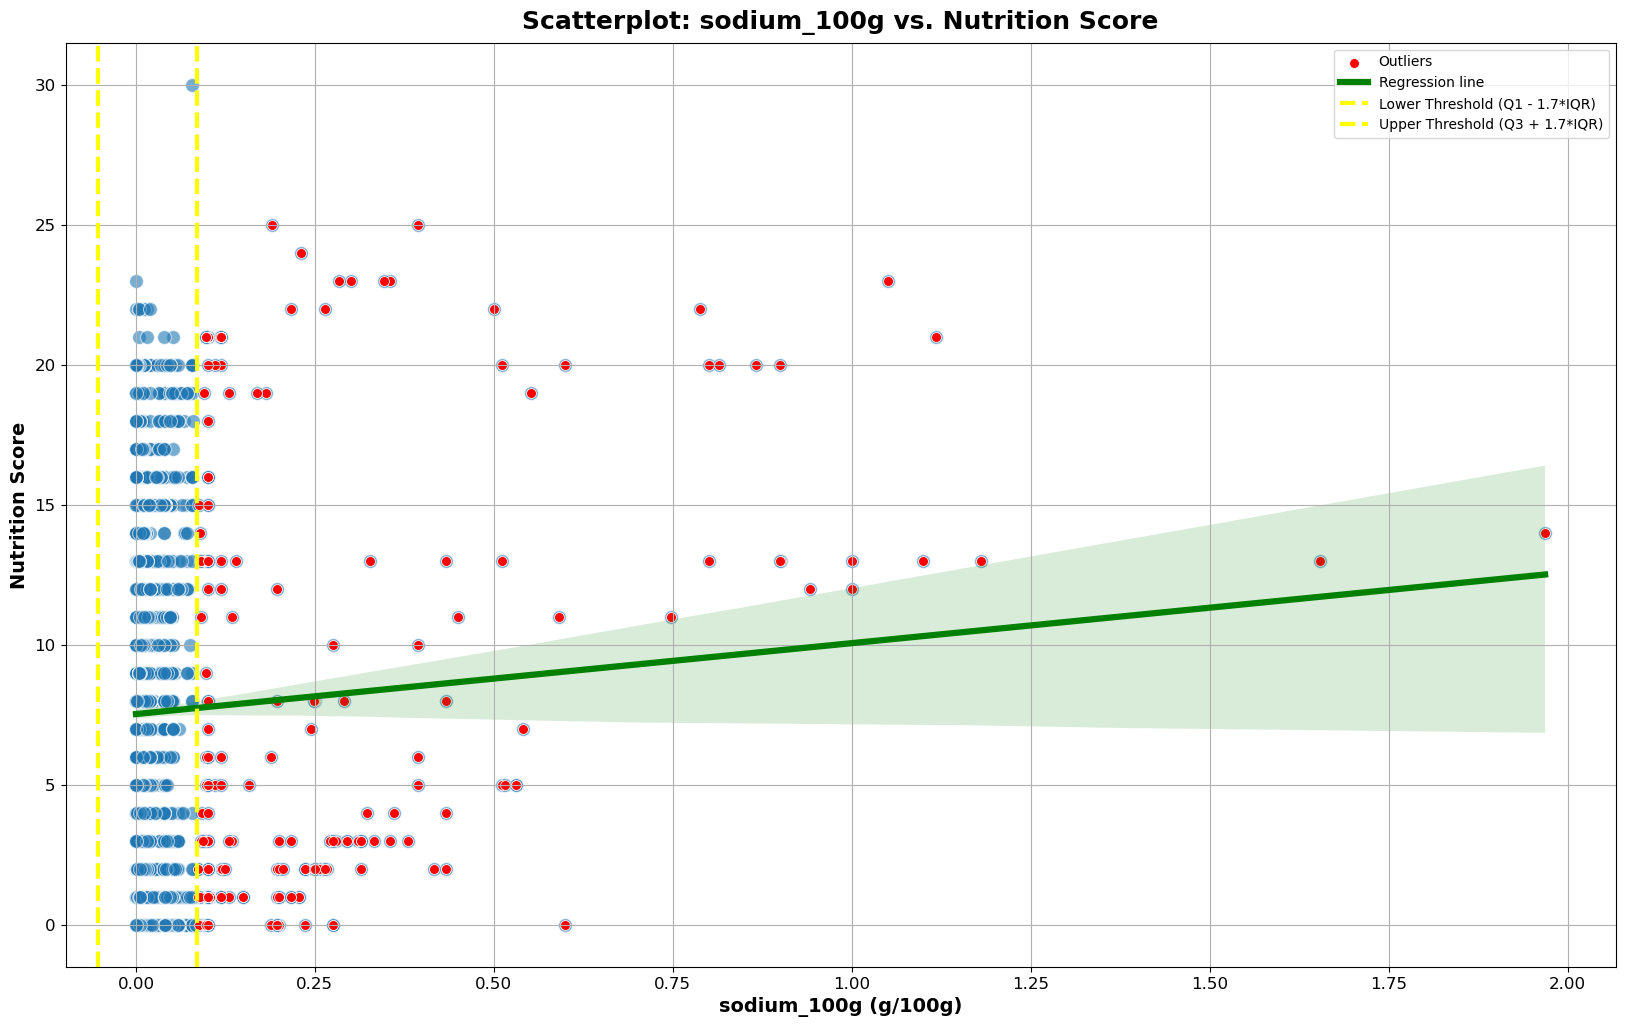

Number of outliers for sodium_100g : 354 / 10213


generic_name nutrition_grade_fr  \
163                             tartinade suprême cassis                NaN   
7203                        вода питьевая негазированная                NaN   
9872                    boisson aloe vera - arôme mangue                NaN   
9250              agua mineral natural. manantial sacalm                NaN   
7072                             condiment à base de sel                NaN   
8676                                                 NaN                NaN   
4588                                         sel liquide                NaN   
211                                                  NaN                NaN   
1282                                       mineral water                NaN   
352                                       gives you wing                NaN   
9020                     coca-cola, refrigerante de cola                NaN   
6433                                        bière blonde                NaN   
392                                                  NaN                NaN   
393                                                  NaN                NaN   
1006                                                 NaN                  e   
9756                                      sauce crudités                  d   
9748                                                 NaN                  d   
4595                           olives vertes sans noyau.                  c   
4296                                               sauce                  d   
8571              sauce à l'ail médium pour côtes levées                NaN   
43                                    cucumbers in brine                NaN   
1463                                     sirop concentré                  c   
9749                                                 NaN                  d   
55                                                   NaN                  d   
23                                                   NaN                  e   
6                                                    NaN                NaN   
743                                              ketchup                  d   
1343                            olives noires en saumure                  c   
10095                                                NaN                  e   
9341                                  leche de almendras                  d   
7800                                       jus de pommes                  e   
10193                               balsamic vinaigrette                  d   
3632                                         vinaigrette                  d   
6368                                                 NaN                  d   
348                          concombre mariné et tranché                NaN   
7342                                                 NaN                  d   
592                                               sherry                  e   
496                                                  NaN                  d   
2396            sauce pour rouleaux de printemps et nems                  e   
8229         sauce tartare douce avec morceaux d'oignons                  e   
9686                                                 NaN                NaN   
88                                                   NaN                  d   
147                                        sauce ketchup                  e   
9965                                                 NaN                  d   
8515                                            maionese                  d   
8718                                                 NaN                  e   
8230                               soupe aux champignons                  c   
4399                                                 NaN                NaN   
3023   vinaigrette à l'huile d'olive et au jus de cit...                  d   
9744                                                 NaN                  d   
236            

In [39]:
# ==================================================================================================
# GET THE POTENTIAL OUTLIERS FOR THE BEVERAGES
# ==================================================================================================
# ['nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
#                                                         'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']


indicatorToCheck = 'sodium_100g'
outliers_fat = plot_outlier_scatter(beverages_df, indicatorToCheck)
outliers_fat.head(200)
outliers_fat_sorted = outliers_fat.sort_values(by=indicatorToCheck, ascending=False)
outliers_fat_sorted.head(200)

### III.3.2. SOLID FOOD

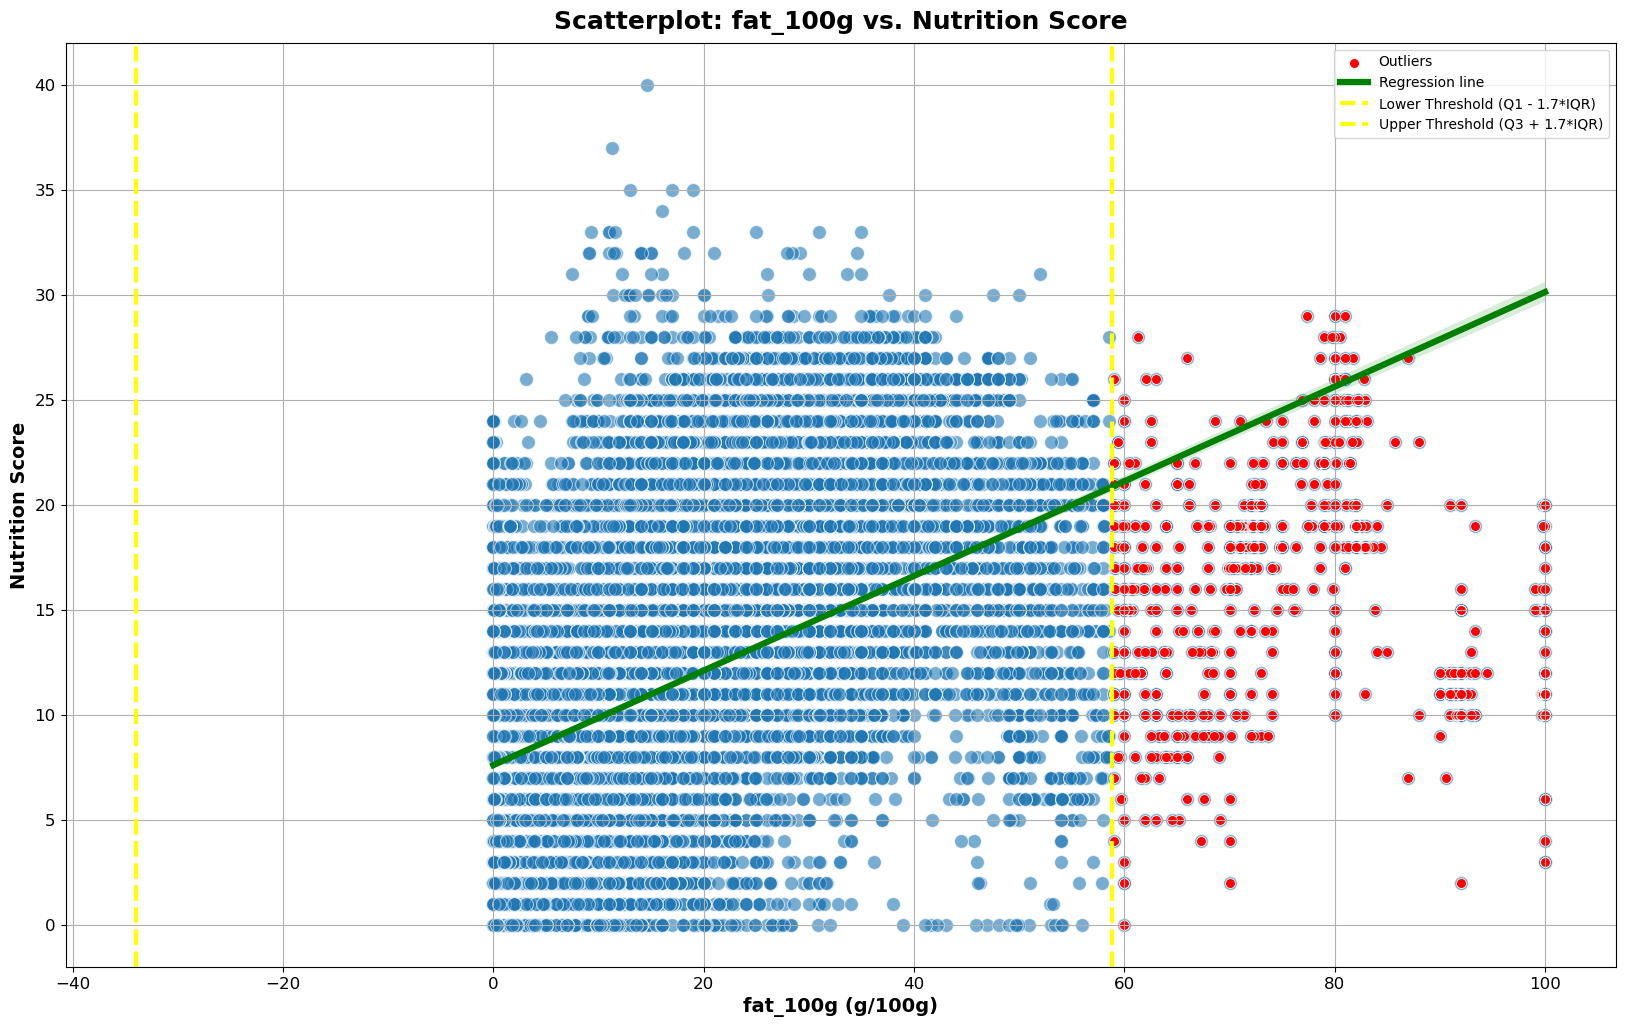

Number of outliers for fat_100g : 1628 / 71454


generic_name nutrition_grade_fr  \
27985                                 huile de tournesol                  d   
33710                                                NaN                  c   
15570                         huile d'olive vierge extra                NaN   
22740                                 huile de tournesol                  d   
31436                                                NaN                  d   
22806                                                NaN                NaN   
31433                                                NaN                  d   
31432                                                NaN                  e   
31431                                                NaN                  c   
31429                                                NaN                  d   
52390                                                NaN                  e   
33794                          huile de pépins de raisin                  c   
53639  pflanzliches speiseöl hergestellt aus kokosöl,...                  e   
53640                                                NaN                  e   
33882                                                NaN                NaN   
19700                                                NaN                  d   
23262                                                NaN                  d   
53721                                                NaN                  d   
15571                                                NaN                NaN   
15575                                                NaN                  d   
23263                                      huile d'olive                  d   
15804                                                NaN                  d   
16208                                  graisse de canard                  d   
49304                    huile vierge de coco biologique                NaN   
33099                                                NaN                  d   
31449                                  huile d'olive bio                  d   
49542                                                NaN                  c   
49845                                       pflanzenfett                NaN   
15805  graisse obtenue par fusion et pasteurisation à...                  d   
49846                                       pflanzenfett                NaN   
15576       huile d'olive vierge extra aux olives jeunes                NaN   
31441                                      huile de soja                  d   
31440                                      huile d'olive                NaN   
50829                                                NaN                  d   
50830                                                NaN                  d   
31439                                 huile de colza bio                  c   
31438                                                NaN                  d   
22739                                      huile d'olive                  d   
53810                                    natives kokosöl                  d   
23264                                 huile de tournesol                  d   
48567                                                NaN                  d   
33095                                  huile de noix bio                  d   
28288                                                NaN                  d   
57719                                                NaN                NaN   
57726                                                NaN                  d   
28287                          huile vierge de colza bio                NaN   
28072  huile végétale aromatisée naturellement riche ...                  c   
28071  huile de tournesol pour assaisonnement, cuisso...                  d   
57756                     huile végétale pour la friture                  d   
58153                                                NaN                  c   
57346          

In [40]:
# ==================================================================================================
# GET THE POTENTIAL OUTLIERS FOR THE SOLID FOOD
# ==================================================================================================
outliers_fat = plot_outlier_scatter(solid_foods_df, 'fat_100g')
outliers_fat_sorted = outliers_fat.sort_values(by='fat_100g', ascending=False)
outliers_fat_sorted.head(200)

### III.3.3.NOTE

<div class="alert alert-block alert-info">
    
- Note1: Comparing each numerical indicator vs the nurition score show that there is no evident model between them (There is not a linear or non linear relationship between them). 
This note is valid for both BEVERAGE and SOLID FOOD dataset. 
--> We can already exclude the data imputation like Interpolation for this reason.

- Note2: There is no notion of sequential data and/or time series data. The order of observation don't matter here. 

- Note3: So we could choose to do data imputation using: 
1. Mean/Median imputation
2. K-Nearest Neighbors (KNN) imputation
3. Random Forest Imputation
4. Mice / Iterative Imputer

- However we are missing an important notion to choose the data imputation technique: the type of missing value (MCAR, MAR, ...), and knowing if the missing is systematic. In step IV.0. i check this thanks to a visual inspection, Missingness Correlation and a statistic test like Chi-square. 
</div>



### III.4.1. BOISSONS

In [41]:
# # Define the constant indicator
# indicator_constant = 'nutrition-score-fr_100g'

# # Defineindicator_combinations the list of numerical features
# numerical_features = ['saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g', 'carbohydrates_100g',
#                       'fat_100g', 'proteins_100g', 'energy_100g']

# # Generate combinations of indicators
# indicator_combinations = generate_indicator_combinations(indicator_constant, numerical_features)

# # Iterate over indicator combinations and perform clustering and visualization
# for indicators in indicator_combinations:
#     outliers = cluster_and_visualize(beverages_df, indicators, True)
#     # beverages_df = beverages_df.drop(outliers.index)
#     # beverages_df = beverages_df.reset_index(drop=True)


### III.4.2. ALIMENTS SOLIDES

In [42]:
# # Define the constant indicator
# indicator_constant = 'nutrition-score-fr_100g'

# # Defineindicator_combinations the list of numerical features
# numerical_features = ['saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g', 'carbohydrates_100g',
#                       'fat_100g', 'proteins_100g', 'energy_100g']

# # Generate combinations of indicators
# indicator_combinations = generate_indicator_combinations(indicator_constant, numerical_features)

# # Iterate over indicator combinations and perform clustering and visualization
# for indicators in indicator_combinations:
#     outliers = cluster_and_visualize(beverages_df, indicators, True)
#     # solid_foods_df = beverages_df.drop(outliers.index)
#     # solid_foods_df = beverages_df.reset_index(drop=True)


# STEP 4. IDENTIFY AND HANDLE MISSING VALUES

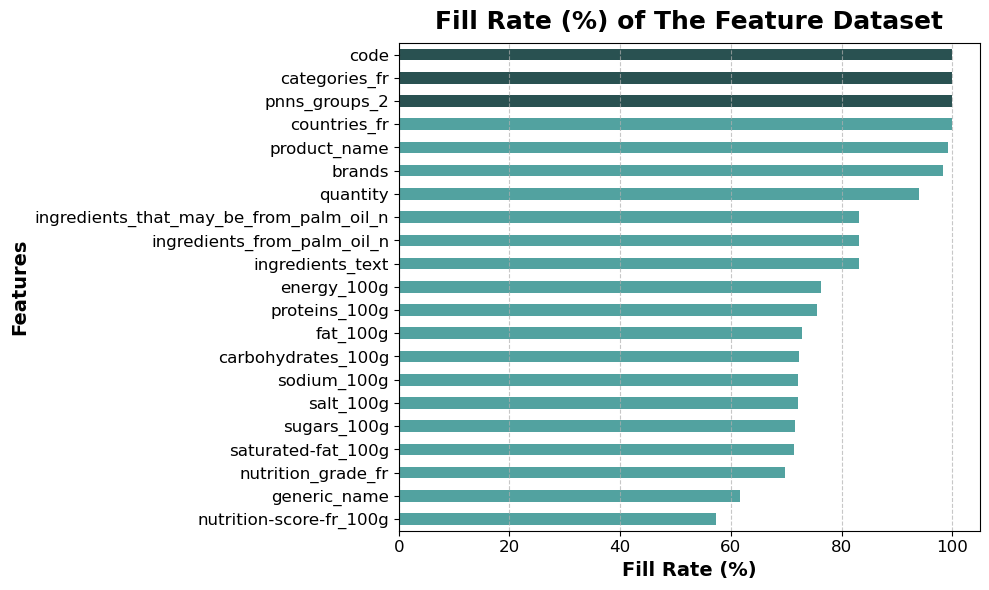

nutrition-score-fr_100g                    57.24
generic_name                               61.60
nutrition_grade_fr                         69.75
saturated-fat_100g                         71.35
sugars_100g                                71.60
salt_100g                                  72.04
sodium_100g                                72.04
carbohydrates_100g                         72.38
fat_100g                                   72.88
proteins_100g                              75.53
energy_100g                                76.19
ingredients_text                           83.18
ingredients_from_palm_oil_n                83.18
ingredients_that_may_be_from_palm_oil_n    83.18
quantity                                   93.92
brands                                     98.35
product_name                               99.14
countries_fr                               99.88
pnns_groups_2                             100.00
categories_fr                             100.00
code                

In [43]:
# Calculate the percentage of missing values for each feature
fill_rate_percentages = 100 - (df_features_filtered.isnull().sum() / len(df_features_filtered)) * 100

# Sort fill_rate_percentages
fill_rate_percentages_sorted = fill_rate_percentages.sort_values(ascending=True)  # Sorting in ascending order

# Plotting
plt.figure(figsize=(10, 6))

# Set color to dark blue when fill rate is 100%, otherwise use skyblue
colors = [blue_green_dark if rate == 100 else blue_green for rate in fill_rate_percentages_sorted]

fill_rate_percentages_sorted.plot(kind='barh', color=colors)
plt.title('Fill Rate (%) of The Feature Dataset', fontsize=18, fontweight='bold')
plt.xlabel('Fill Rate (%)', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Customize x-axis ticks to display only every nth label
n = 1  # Display every 5th label
plt.yticks(range(0, len(fill_rate_percentages_sorted), n), fill_rate_percentages_sorted.index[::n])

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

display(fill_rate_percentages_sorted)

## IV.0. TYPE OF MISSING DATA (Eg. MCAR) and if there is a systematic reason

<div class="alert alert-block alert-info">
    
To verify if missing values are missing completely at random (MCAR), or if there is a systematic reason behind their absence, I performed some exploratory data analysis and statistical tests. 

1. Visual Inspection: Plot the distribution of missing values across different variables. You can use heatmaps or bar plots to visualize the presence of missing values in each variable. If missingness appears random across variables, it suggests MCAR.
2. Missingness Correlation: Calculate the correlation between missing values in different variables. If missingness is correlated across variables, it suggests a systematic reason behind missingness.
3. Statistical Tests: Conduct statistical tests to compare the distribution of observed values and missing values for different variables. For example, you can use t-tests or chi-square tests to compare means or proportions between groups with and without missing values.

</div>

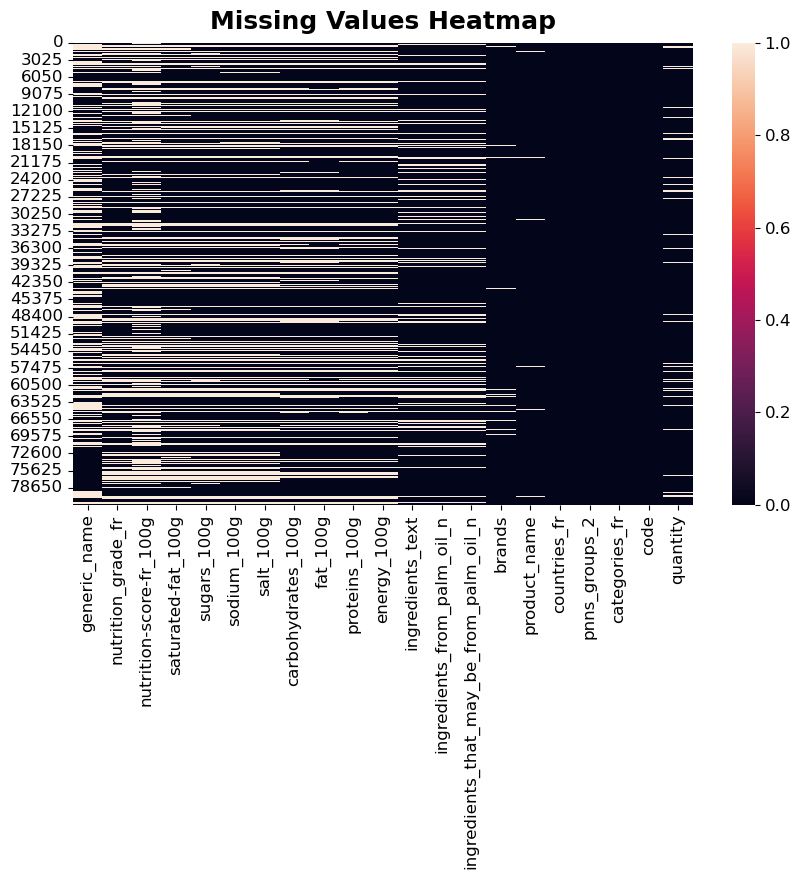

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


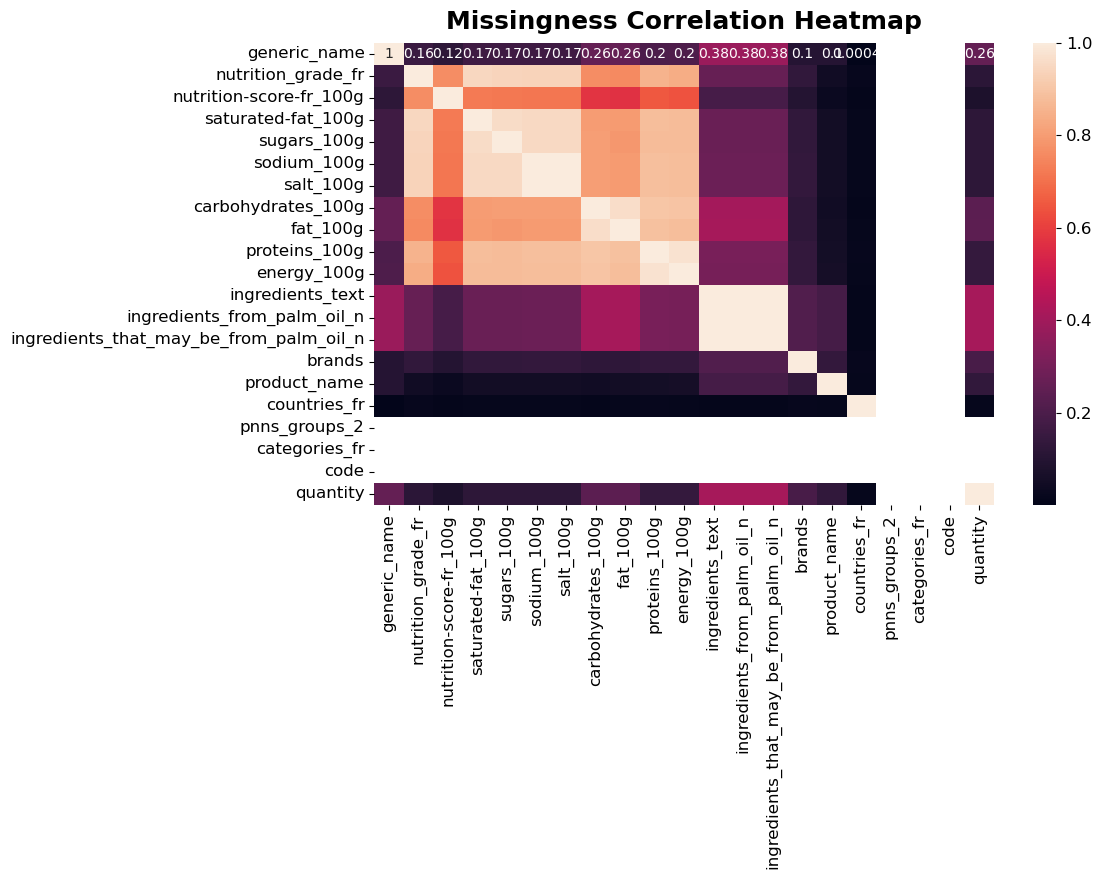

Chi-square test for generic_name:
Chi-square statistic: 81662.7724541477
P-value: 0.0
/!\ The difference between observed and missing values is statistically significant.
/!\ There is evidence to suggest that the missingness pattern is not random.

Chi-square test for nutrition_grade_fr:
Chi-square statistic: 81662.26078008779
P-value: 0.0
/!\ The difference between observed and missing values is statistically significant.
/!\ There is evidence to suggest that the missingness pattern is not random.

Chi-square test for nutrition-score-fr_100g:
Chi-square statistic: 81662.91433325884
P-value: 0.0
/!\ The difference between observed and missing values is statistically significant.
/!\ There is evidence to suggest that the missingness pattern is not random.

Chi-square test for saturated-fat_100g:
Chi-square statistic: 81662.10843098097
P-value: 0.0
/!\ The difference between observed and missing values is statistically significant.
/!\ There is evidence to suggest that the missingness pa

quantity  False  True 
quantity              
False         0   4965
True      76702      0

observed


0         True
1         True
2         True
3        False
4         True
         ...  
81662     True
81663     True
81664     True
81665     True
81666     True
Name: quantity, Length: 81667, dtype: bool

missing


0        False
1        False
2        False
3         True
4        False
         ...  
81662    False
81663    False
81664    False
81665    False
81666    False
Name: quantity, Length: 81667, dtype: bool

In [44]:
numerical_features = ['saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g', 'carbohydrates_100g',
                      'fat_100g', 'proteins_100g', 'energy_100g']
df_features_filtered_numerical_features = df_features_filtered[numerical_features]
# Visual inspection: Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_features_filtered.isnull(), cbar=True)
plt.title('Missing Values Heatmap', fontsize=18, fontweight='bold')
plt.show()
# NOTE TO READ THIS VISUAL INSPECTION: This visualization helps to quickly identify patterns of missingness. 
# If missing values are randomly distributed, you'll observe a uniform distribution of missing values across variables. 
# However, if there are systematic patterns, such as entire columns being missing or specific rows having missing values 
# across multiple variables, it suggests non-random missingness.

# Missingness correlation: Calculate correlation matrix of missing values
missing_corr = df_features_filtered.isnull().corr()

# Plot heatmap of missingness correlation
plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, annot=True)
plt.title('Missingness Correlation Heatmap', fontsize=18, fontweight='bold')
plt.show()

# Statistical tests: Compare distribution of observed vs. missing values
# NOTE: If the p-value (the probability value) calculated from the chi-square test is less than 0.05, it suggests that 
# the difference between observed and missing values is statistically significant. In other words, it's unlikely that the 
# difference occurred just by random chance.

# On the other hand, if the p-value is greater than 0.05, it means that there isn't enough evidence to conclude that the 
# difference between observed and missing values is significant. In this case, we might say that the missingness pattern 
# is more random, and there's no strong indication of a systematic reason behind the missing values.

from scipy.stats import chi2_contingency
for column in df_features_filtered.columns:
    observed = df_features_filtered[column].notnull()
    missing = df_features_filtered[column].isnull()
    
    # Perform chi-square test
    contingency_table = pd.crosstab(observed, missing)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Chi-square test for {column}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    
    # Interpretation
    if p < 0.05:
        print("/!\ The difference between observed and missing values is statistically significant.")
        print("/!\ There is evidence to suggest that the missingness pattern is not random.")
    else:
        print("The difference between observed and missing values is not statistically significant.")
        print("There is no strong evidence to suggest a systematic pattern in the missingness.")
    print()
display(contingency_table)
print('observed')
display(observed)
print('missing')
display(missing)

<div class="alert alert-block alert-info">

Note:
1. Visual Inspection: The missing data seems to be concentrated in the same rows across variables, except for the "energy" column. This suggests that missingness may not be completely at random (MCAR), as there is some pattern to it.

2. Missingness Correlation: The heatmap indicates that missingness is not strongly correlated across variables, except for 4 pairs: "fat" and "saturated fat",  "sugar" and "carbohydrates", and "salt" and "sodium", and 'ingredients_from_palm_oil_n' with 'ingredients_that_may_be_from_palm_oil_n'. This suggests that while missingness may not be completely random, there are only specific relationships between missingness in certain pairs of variables.

3. Statistical Tests (Chi-square Tests): For all numerical features, the p-values from the chi-square tests are extremely low (close to 0), indicating that the difference between observed and missing values is statistically significant. This suggests that there is evidence to suggest that the missingness pattern is not random across all these variables.

</div>

<div class="alert alert-block alert-info">

CONCLUSION:
The missing data in the dataset appear to exhibit a systematic pattern rather than being missing completely at random (MCAR). 
While missingness is not strongly correlated across all variables, there are specific relationships between missingness in certain pairs of variables. 
Further investigation into the underlying reasons behind the missing data may be necessary for a comprehensive understanding.
</div>

## IV.1. DATA IMPUTATION - Numerical Features

### IV.1.1 DATA IMPUTATION - Numerical Features - MEAN or Median IMPUTATION

#### IV.1.1.1. BEVERAGES

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\326170423.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5

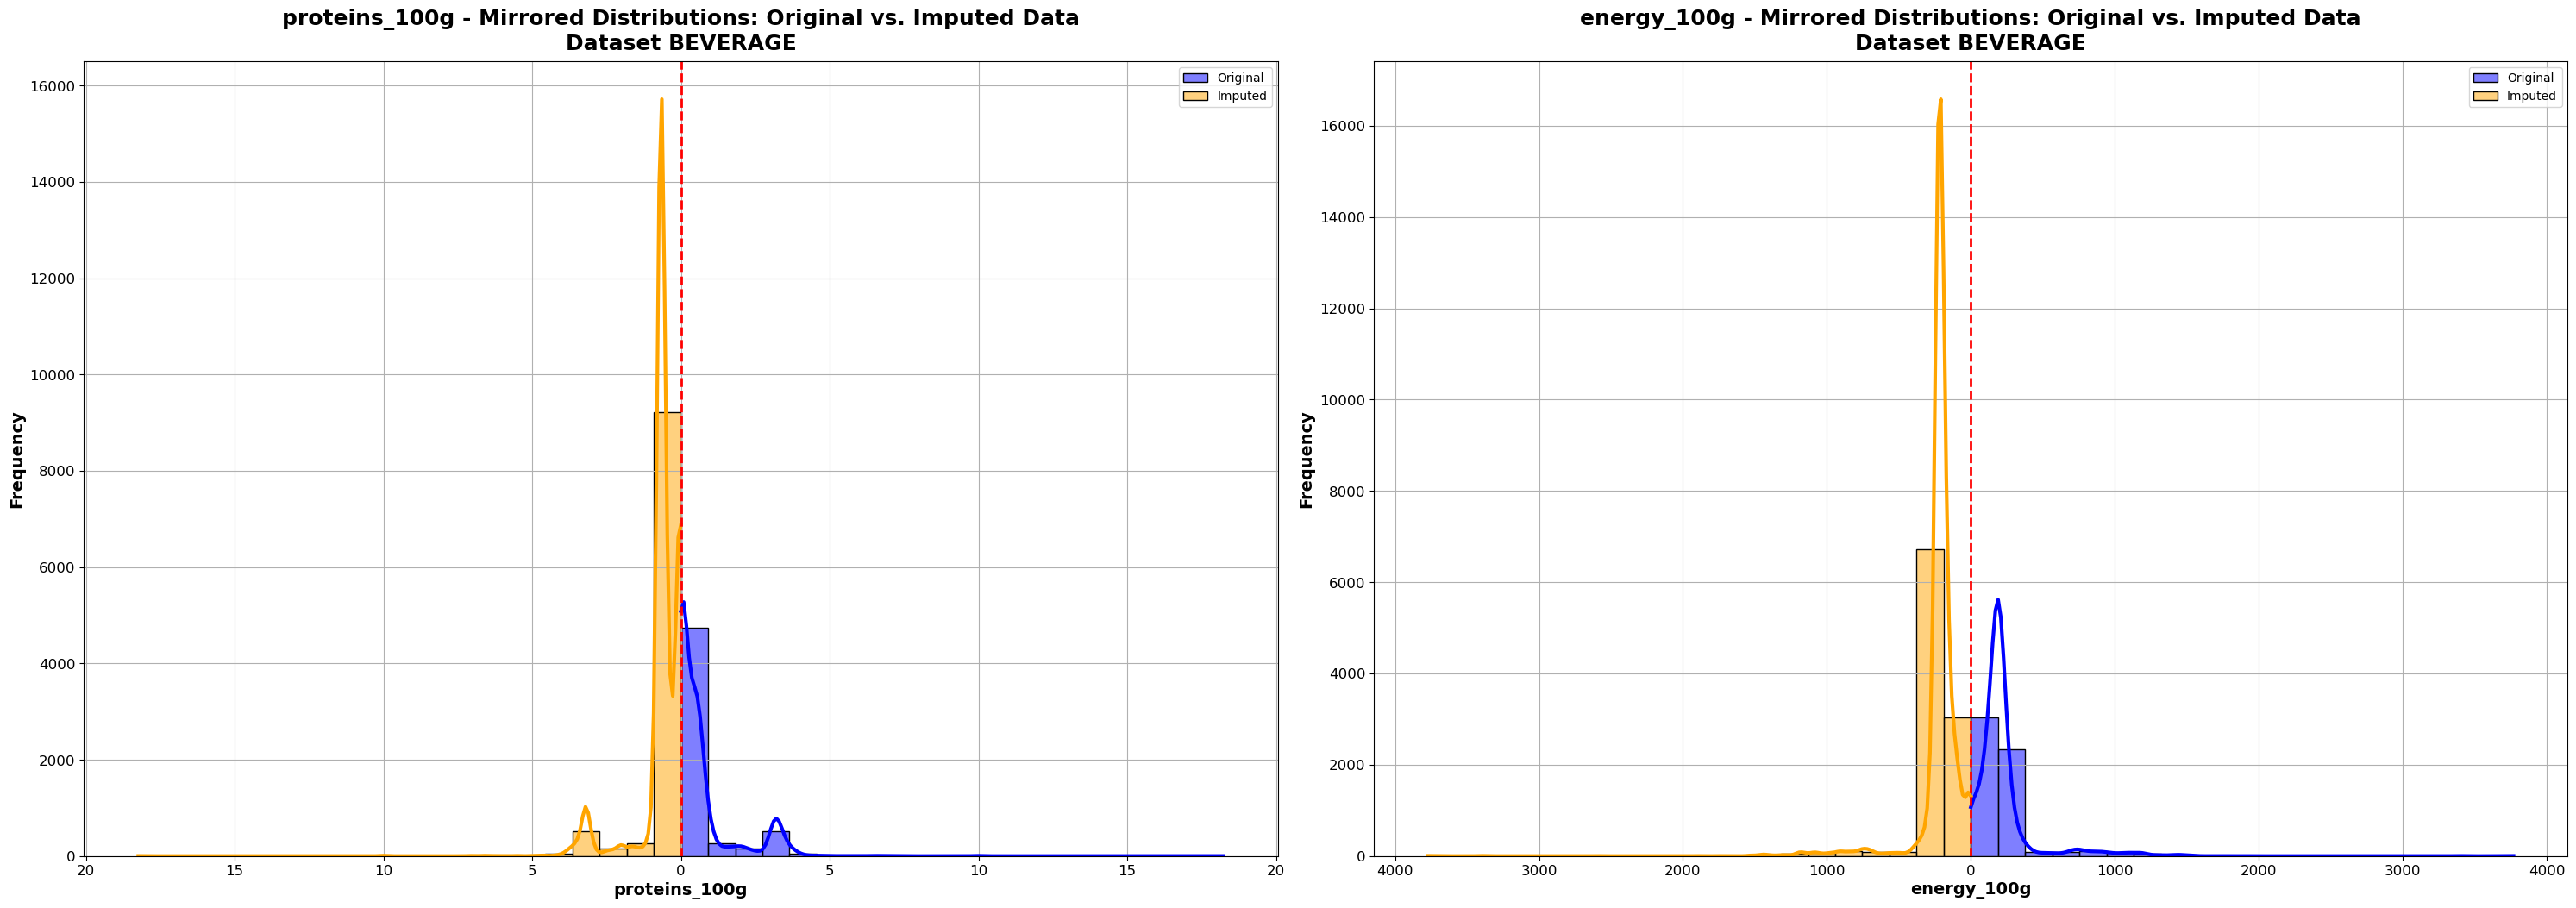

Summary Statistics:


C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\326170423.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_statistics_display = summary_statistics.applymap(lambda x: f"count {x['count']:.2f}, mean {x['mean']:.2f}, std {x['std']:.2f}")
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\326170423.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normality_test_display = normality_test.applymap(lambda x: f"{x:.2f}")


Before_Imputation  \
proteins_100g  count   5740.00
mean       0.67
std        1.0...   
energy_100g    count   5835.00
mean     222.21
std      234.2...   

                                                After_Imputation  
proteins_100g  count   10213.00
mean        0.67
std         ...  
energy_100g    count   10213.00
mean      222.21
std       17...


Normality Test (Shapiro-Wilk Test - p-value):


Before_Imputation After_Imputation
proteins_100g              0.00             0.00
energy_100g                0.00             0.00

In [45]:
# ===========================================================================
# BEVERAGE
# Data IMPUTATION - Numerical Features
# For 3 features : 'nutrition-score-fr_100g', 'proteins_100g', and 'energy_100g'
# ===========================================================================
from sklearn.impute import SimpleImputer
from scipy import stats
# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)  # Disable column width truncation

# Reset index
beverages_df.reset_index(drop=True, inplace=True)

# Get Numerical data : 
numerical_features = ['proteins_100g', 'energy_100g']
df_features_filtered_numerical = beverages_df[numerical_features]
df_copy = df_features_filtered_numerical
# Perform imputation
# imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='mean')

data_imputed = imputer.fit_transform(df_features_filtered_numerical[numerical_features])
data_imputed = pd.DataFrame(data_imputed, columns=numerical_features)

# Create DataFrames for summary statistics and normality test results
summary_statistics = pd.DataFrame(index=numerical_features, columns=['Before_Imputation', 'After_Imputation'])
normality_test = pd.DataFrame(index=numerical_features, columns=['Before_Imputation', 'After_Imputation'])

# Create a single figure with subplots
plt.figure(figsize=(30, 20))
for i, col in enumerate(numerical_features, start=1):
    # Add a subplot for each numerical feature
    plt.subplot(2, 2, i)
    # Plot histogram of original and imputed data
    # Plot histogram of original data
    sns.histplot(df_copy[col].dropna(), kde=True, color='blue', label='Original', bins=20)
    
    # Plot histogram of imputed data
    sns.histplot(-data_imputed[col], kde=True, color='orange', label='Imputed', bins=20)
    
    plt.title(f'{col} - Mirrored Distributions: Original vs. Imputed Data\nDataset BEVERAGE', fontweight='bold', fontsize=18)
    plt.xlabel(col, fontweight='bold', fontsize=14)
    plt.ylabel('Frequency', fontweight='bold', fontsize=14)
    
    # Force x-ticks to be positive
    plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

    plt.grid(True)  # Add grid
    plt.legend()

    # Summary statistics
    summary_statistics.at[col, 'Before_Imputation'] = df_features_filtered_numerical[col].describe()
    summary_statistics.at[col, 'After_Imputation'] = data_imputed[col].describe()

    # Test for normality
    _, p_orig = stats.shapiro(df_copy[col].dropna())
    _, p_imp = stats.shapiro(data_imputed[col])
    normality_test.at[col, 'Before_Imputation'] = p_orig
    normality_test.at[col, 'After_Imputation'] = p_imp

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Format summary statistics DataFrame for display
summary_statistics_display = summary_statistics.applymap(lambda x: f"count {x['count']:.2f}, mean {x['mean']:.2f}, std {x['std']:.2f}")

# Format normality test DataFrame for display
normality_test_display = normality_test.applymap(lambda x: f"{x:.2f}")
# Print summary statistics and normality test results
print("Summary Statistics:")
display(summary_statistics)

print("\nNormality Test (Shapiro-Wilk Test - p-value):")
display(normality_test)

# Replace the value of the numerical columns with the imputed value
beverages_df[numerical_features] = data_imputed

#### IV.1.1.2. SOLID FOOD

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\1121261807.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 

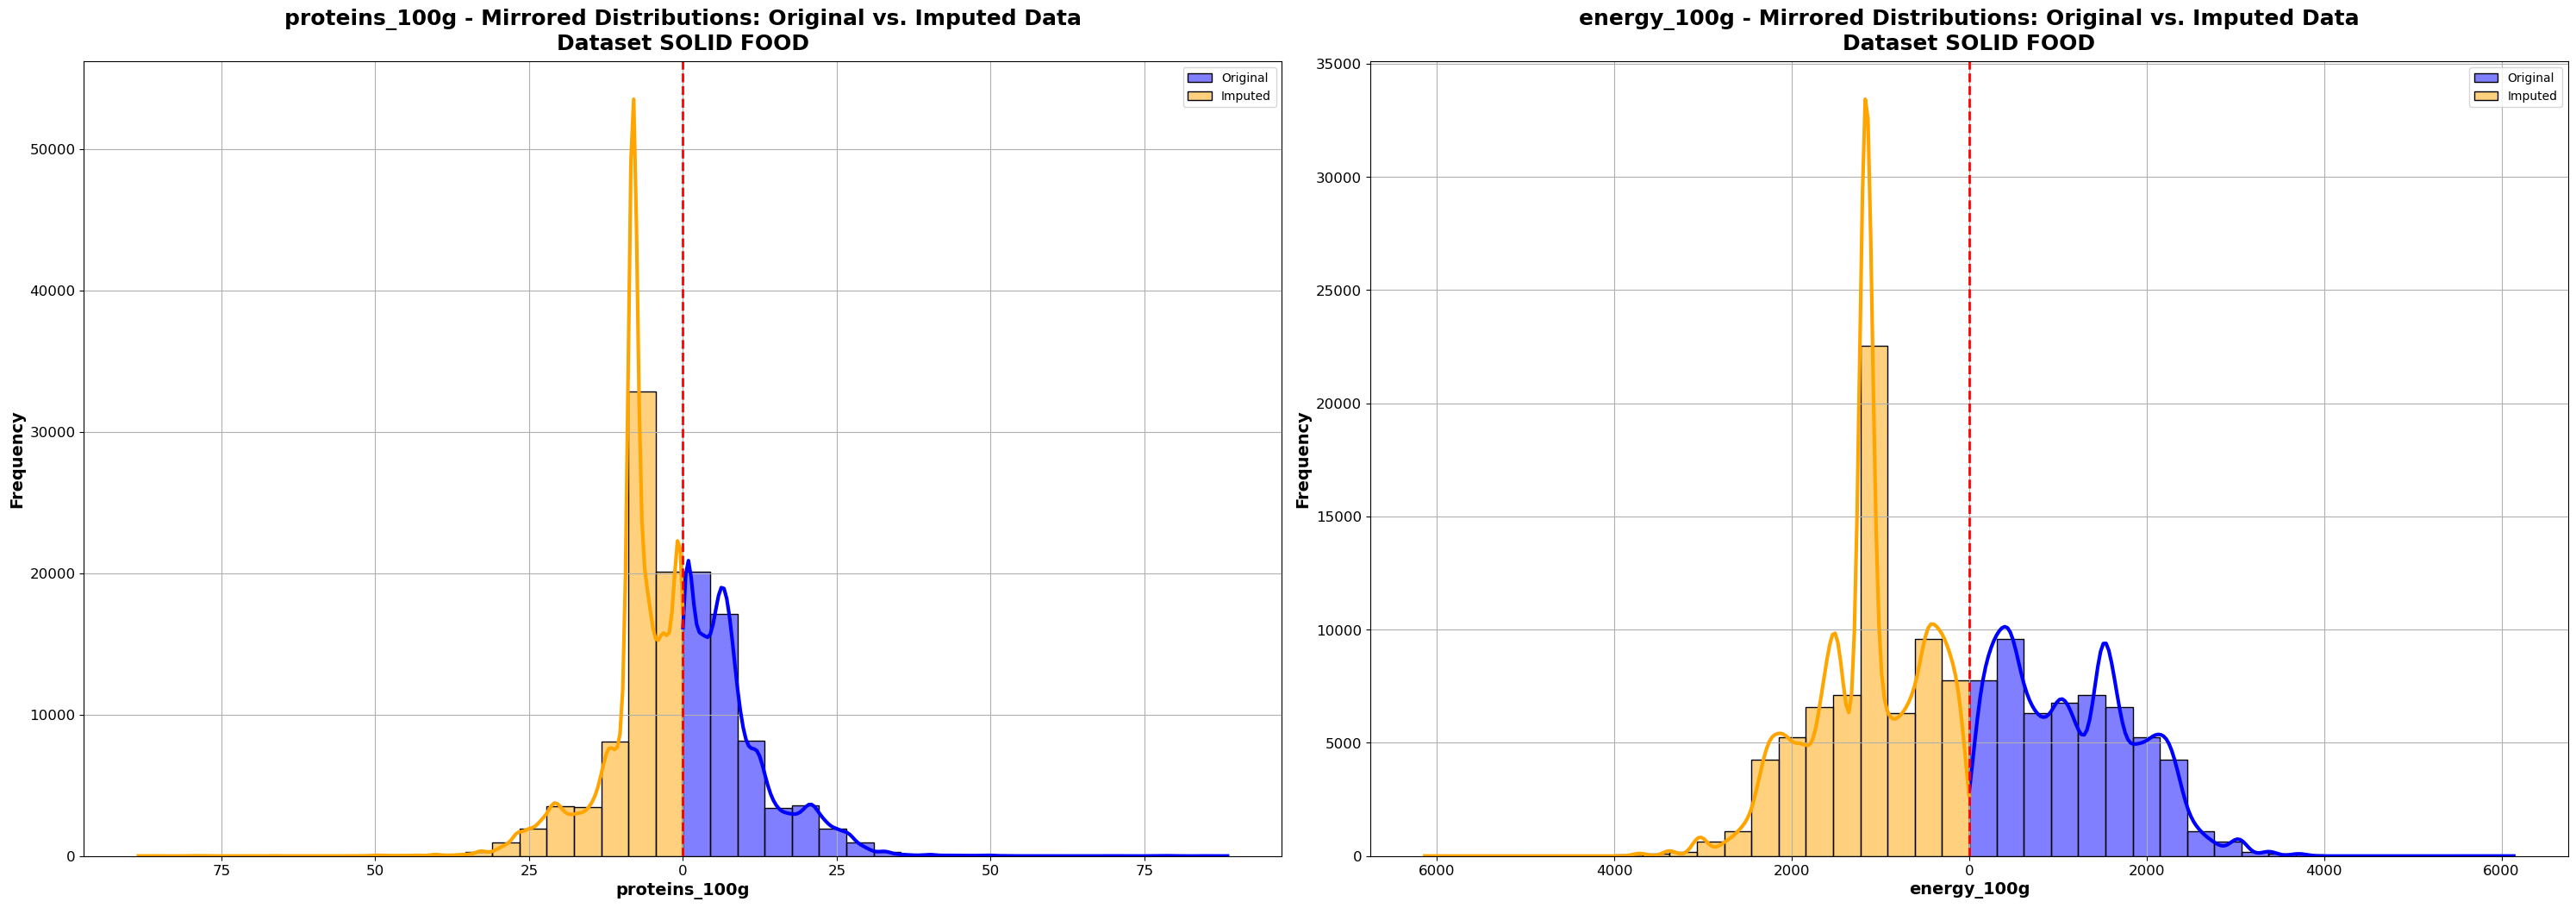

Summary Statistics:


C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\1121261807.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_statistics_display = summary_statistics.applymap(lambda x: f"count {x['count']:.2f}, mean {x['mean']:.2f}, std {x['std']:.2f}")
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\1121261807.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normality_test_display = normality_test.applymap(lambda x: f"{x:.2f}")


Before_Imputation  \
proteins_100g  count   55734.00
mean        8.16
std         ...   
energy_100g    count   55678.00
mean     1163.71
std       74...   

                                                After_Imputation  
proteins_100g  count   71454.00
mean        8.16
std         ...  
energy_100g    count   71454.00
mean     1163.71
std       65...


Normality Test (Shapiro-Wilk Test - p-value):


Before_Imputation After_Imputation
proteins_100g              0.00             0.00
energy_100g                0.00             0.00

In [46]:
# ===========================================================================
# BEVERAGE
# Data IMPUTATION - Numerical Features
# For 3 features : 'nutrition-score-fr_100g', 'proteins_100g', and 'energy_100g'
# ===========================================================================
from sklearn.impute import SimpleImputer
from scipy import stats
# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)  # Disable column width truncation

# Reset index
solid_foods_df.reset_index(drop=True, inplace=True)

# Get Numerical data : 
numerical_features = ['proteins_100g', 'energy_100g']
df_features_filtered_numerical = solid_foods_df[numerical_features]
df_copy = df_features_filtered_numerical
# Perform imputation
# imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='mean')

data_imputed = imputer.fit_transform(df_features_filtered_numerical[numerical_features])
data_imputed = pd.DataFrame(data_imputed, columns=numerical_features)

# Create DataFrames for summary statistics and normality test results
summary_statistics = pd.DataFrame(index=numerical_features, columns=['Before_Imputation', 'After_Imputation'])
normality_test = pd.DataFrame(index=numerical_features, columns=['Before_Imputation', 'After_Imputation'])

# Create a single figure with subplots
plt.figure(figsize=(30, 20))
for i, col in enumerate(numerical_features, start=1):
    # Add a subplot for each numerical feature
    plt.subplot(2, 2, i)
    # Plot histogram of original and imputed data
    # Plot histogram of original data
    sns.histplot(df_copy[col].dropna(), kde=True, color='blue', label='Original', bins=20)
    
    # Plot histogram of imputed data
    sns.histplot(-data_imputed[col], kde=True, color='orange', label='Imputed', bins=20)
    
    plt.title(f'{col} - Mirrored Distributions: Original vs. Imputed Data\nDataset SOLID FOOD', fontweight='bold', fontsize=18)
    plt.xlabel(col, fontweight='bold', fontsize=14)
    plt.ylabel('Frequency', fontweight='bold', fontsize=14)
    
    # Force x-ticks to be positive
    plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

    plt.grid(True)  # Add grid
    plt.legend()

    # Summary statistics
    summary_statistics.at[col, 'Before_Imputation'] = df_features_filtered_numerical[col].describe()
    summary_statistics.at[col, 'After_Imputation'] = data_imputed[col].describe()

    # Test for normality
    _, p_orig = stats.shapiro(df_copy[col].dropna())
    _, p_imp = stats.shapiro(data_imputed[col])
    normality_test.at[col, 'Before_Imputation'] = p_orig
    normality_test.at[col, 'After_Imputation'] = p_imp

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Format summary statistics DataFrame for display
summary_statistics_display = summary_statistics.applymap(lambda x: f"count {x['count']:.2f}, mean {x['mean']:.2f}, std {x['std']:.2f}")

# Format normality test DataFrame for display
normality_test_display = normality_test.applymap(lambda x: f"{x:.2f}")
# Print summary statistics and normality test results
print("Summary Statistics:")
display(summary_statistics)

print("\nNormality Test (Shapiro-Wilk Test - p-value):")
display(normality_test)

# Replace the value of the numerical columns with the imputed value
solid_foods_df[numerical_features] = data_imputed

### IV.1.2 DATA IMPUTATION - Numerical Features - Iterative Imputer for the highly correlated pairs of indicators

#### IV.1.2.1. BEVERAGES

fat_100g  saturated-fat_100g  sugars_100g  carbohydrates_100g  \
0           NaN                 NaN          NaN                 NaN   
1          0.00                0.00        10.40               10.40   
2          0.00                0.00        10.40               10.40   
3           NaN                 NaN          NaN                 NaN   
4           NaN                 NaN          NaN                 NaN   
...         ...                 ...          ...                 ...   
10208       NaN                 NaN          NaN                 NaN   
10209      0.50                0.00         9.20               10.20   
10210       NaN                 NaN          NaN                 NaN   
10211       NaN                 NaN          NaN                 NaN   
10212       NaN                 NaN          NaN                 NaN   

       salt_100g  sodium_100g  ingredients_from_palm_oil_n  \
0            NaN          NaN                         0.00   
1           0.03         0.01                         0.00   
2           0.10         0.04                         0.00   
3            NaN          NaN                          NaN   
4            NaN          NaN                         0.00   
...          ...          ...                          ...   
10208        NaN          NaN                          NaN   
10209       0.03         0.01                         0.00   
10210        NaN          NaN                         0.00   
10211        NaN          NaN                          NaN   
10212        NaN          NaN                          NaN   

       ingredients_that_may_be_from_palm_oil_n  
0                                         0.00  
1                                         0.00  
2                                         0.00  
3                                          NaN  
4                                         0.00  
...                                        ...  
10208                                      NaN  
10209                                     0.00  
10210                                     0.00  
10211                                      NaN  
10212                                      NaN  

[10213 rows x 8 columns]

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\3037983663.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

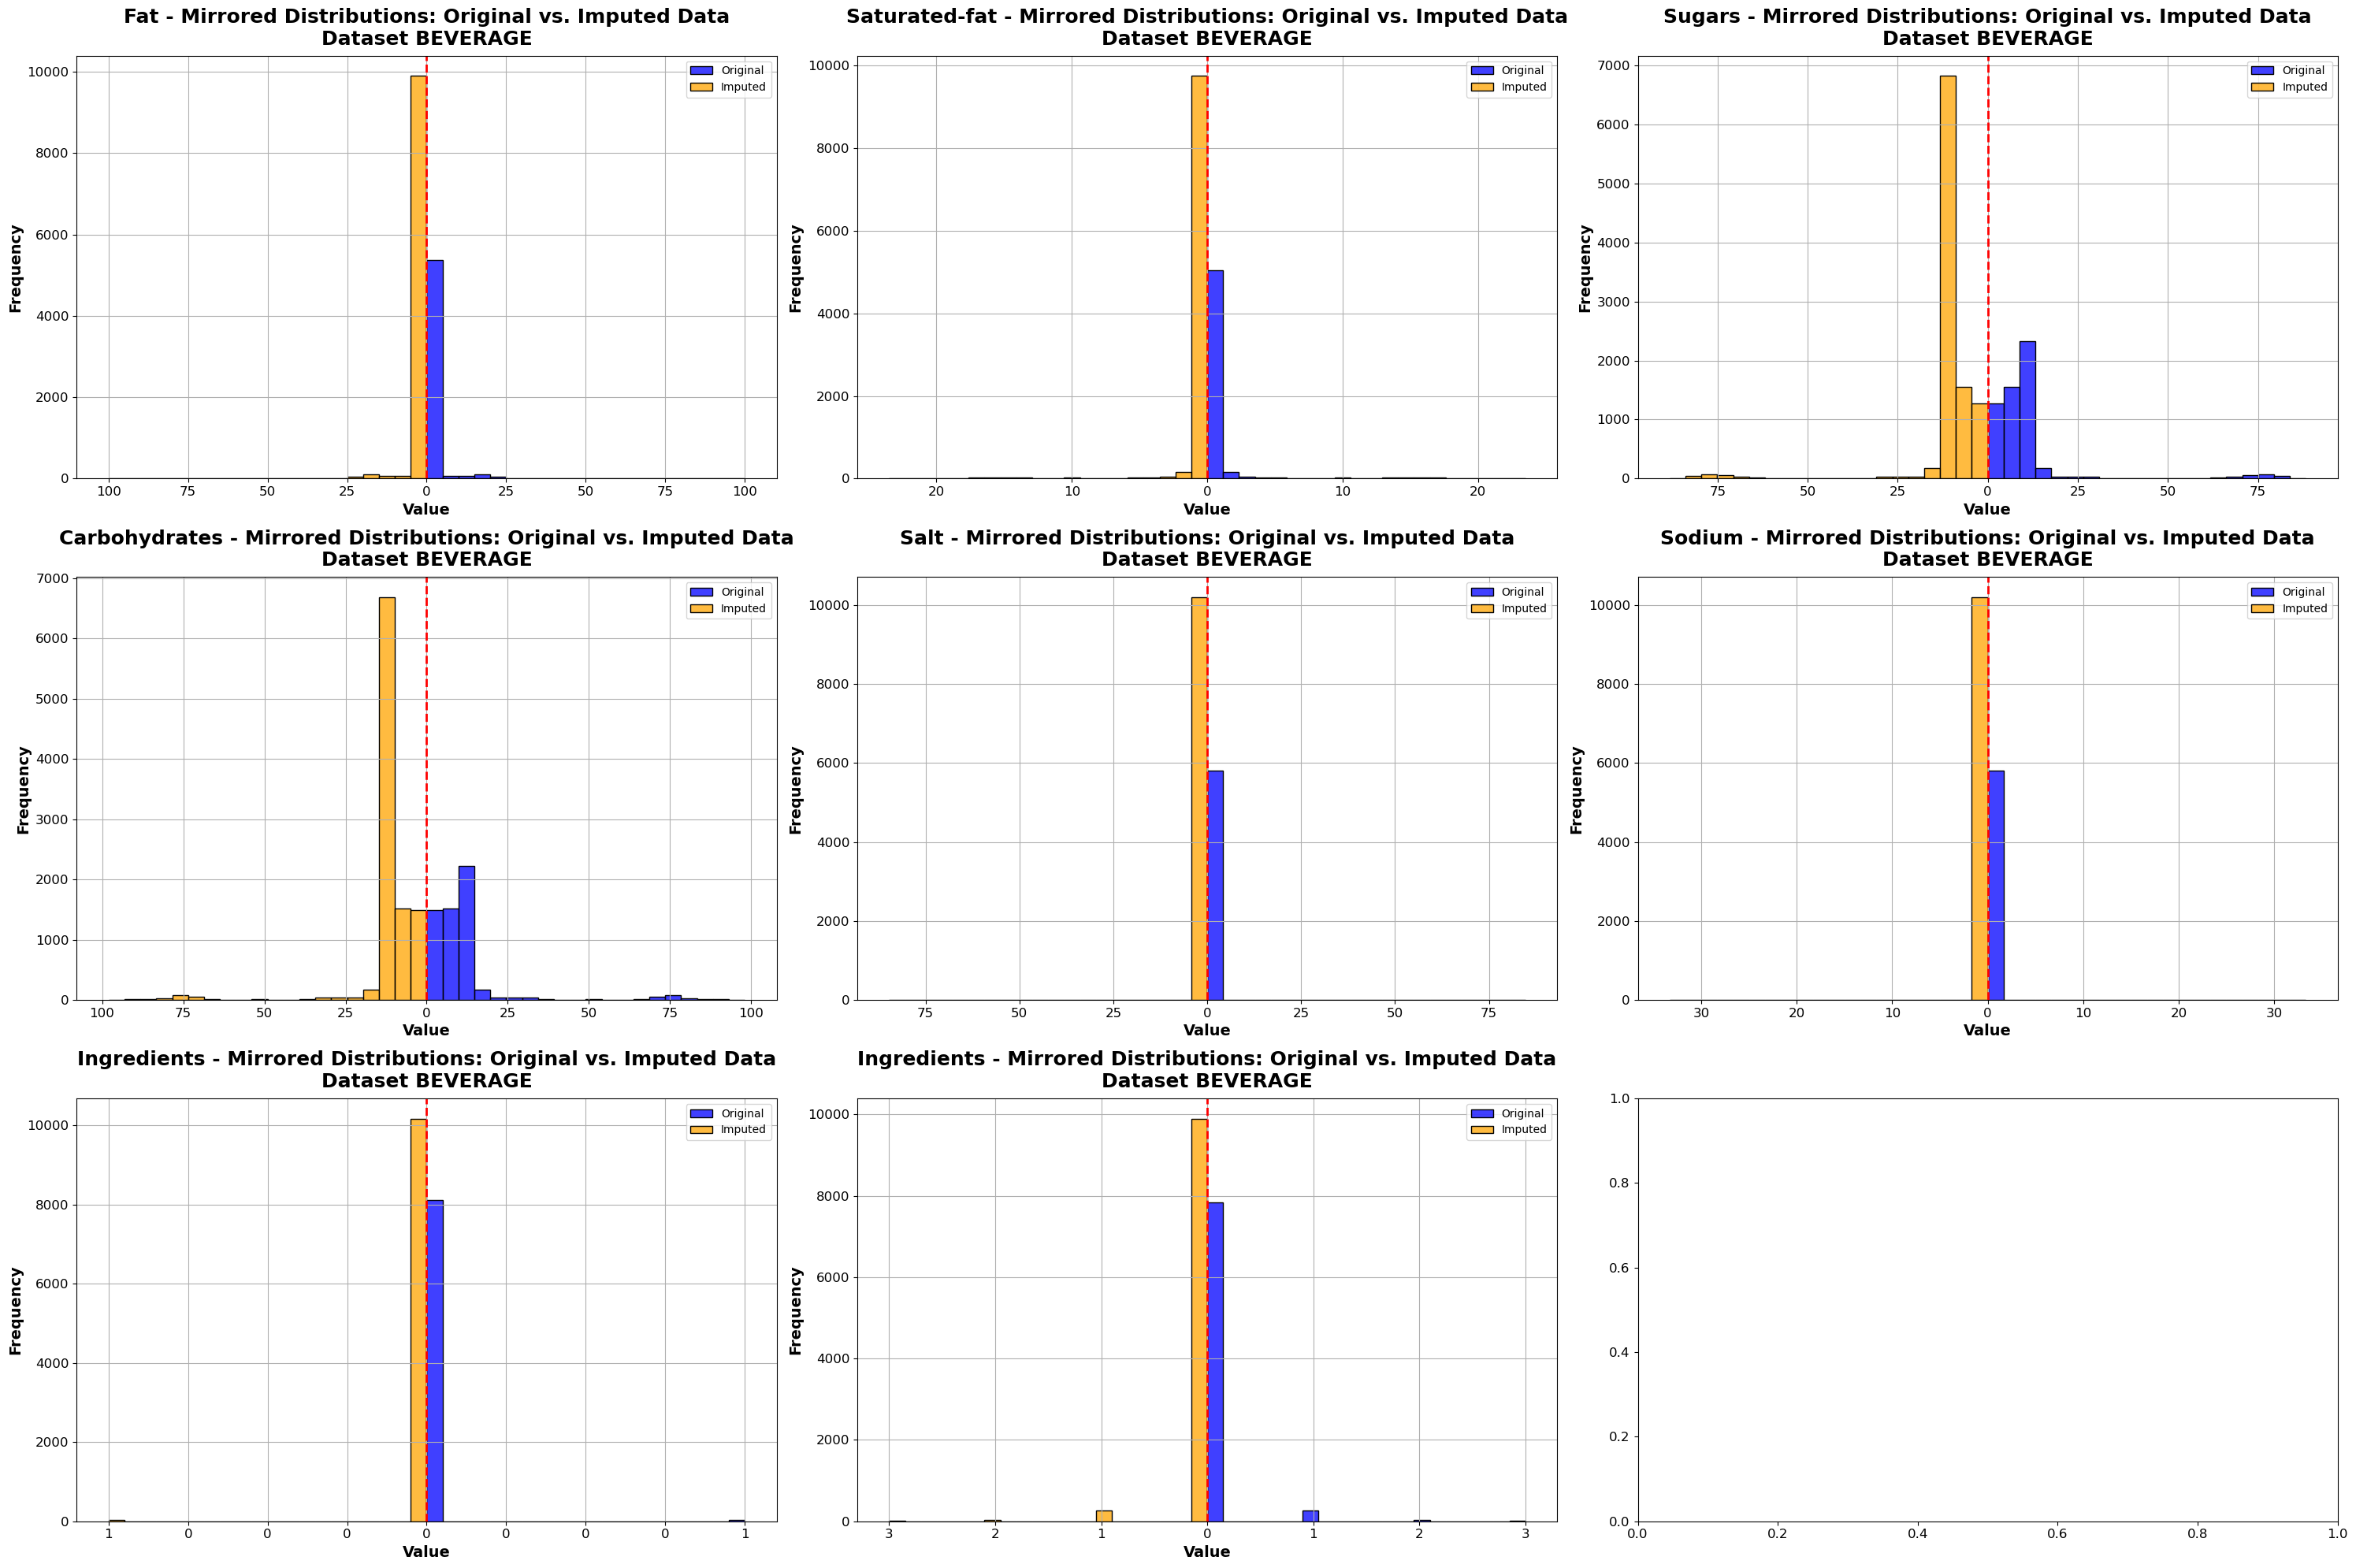

[0 1]
[0 1 2 3]


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the pairs of variables for which you want to perform iterative imputation
imputation_pairs = [('fat_100g', 'saturated-fat_100g'), ('sugars_100g', 'carbohydrates_100g'), ('salt_100g', 'sodium_100g'), ('ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n')]

# Extract the indicators before imputation
indicators_before_imputation = beverages_df[[var for pair in imputation_pairs for var in pair]].copy()

# Create a subset of the DataFrame containing only the specified pairs of variables
subset = beverages_df[[var for pair in imputation_pairs for var in pair]]

# Perform imputation
imputer.fit(subset)
imputed_values = imputer.transform(subset)
for i, pair in enumerate(imputation_pairs):
    beverages_df[pair[0]] = imputed_values[:, 2*i]  # First variable in the pair
    beverages_df[pair[1]] = imputed_values[:, 2*i + 1]  # Second variable in the pair
    # Round and cast imputed values to integers for the specific pair
    if pair == ('ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'):
        beverages_df[pair[0]] = np.round(beverages_df[pair[0]]).astype(int)
        beverages_df[pair[1]] = np.round(beverages_df[pair[1]]).astype(int)
    
# Extract the indicators after imputation
indicators_after_imputation = beverages_df[[var for pair in imputation_pairs for var in pair]].copy()
display(indicators_before_imputation)


# Define the list of indicators
indicators = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
axes = axes.flatten()

for i, indicator in enumerate(indicators):
    # Plot distribution before imputation
    sns.histplot(indicators_before_imputation[indicator], ax=axes[i], kde=False, color='blue', label='Original', bins=20)
    
    # Plot distribution after imputation (-indicators_after_imputation
    sns.histplot(-indicators_after_imputation[indicator], ax=axes[i], kde=False, color='orange', label='Imputed', bins=20)
    
    # Add vertical line at x=0
    axes[i].axvline(x=0, color='red', linestyle='--', linewidth=2)    
    
    # Set labels and title
    axes[i].set_title(f'{indicator.split("_")[0].capitalize()} - Mirrored Distributions: Original vs. Imputed Data\nDataset BEVERAGE', fontweight='bold', fontsize=18)
    axes[i].set_xlabel('Value', fontweight='bold', fontsize=14)
    axes[i].set_ylabel('Frequency', fontweight='bold', fontsize=14)
    
    axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
    
    axes[i].grid(True)  # Add grid
    axes[i].legend()

# Hide empty subplots if the number of indicators is less than 6
if len(indicators) < 6:
    for j in range(len(indicators), 6):
        axes[j].axis('off')

plt.tight_layout()
plt.show()


    
# Update beverages_df with imputed values
beverages_df.update(indicators_after_imputation)
print(beverages_df['ingredients_from_palm_oil_n'].unique())
print(beverages_df['ingredients_that_may_be_from_palm_oil_n'].unique())

#### IV.1.2.1. SOLID FOOD

fat_100g  saturated-fat_100g  sugars_100g  carbohydrates_100g  \
0           NaN                 NaN          NaN                 NaN   
1         12.00                7.00         0.00               23.00   
2         14.40                 NaN        28.10               54.10   
3           NaN                 NaN          NaN                 NaN   
4         10.70                2.00        24.70               38.70   
...         ...                 ...          ...                 ...   
71449       NaN                 NaN          NaN                 NaN   
71450       NaN                 NaN          NaN                 NaN   
71451      0.20                0.20         0.50                0.50   
71452       NaN                 NaN          NaN                 NaN   
71453       NaN                 NaN          NaN                 NaN   

       salt_100g  sodium_100g  ingredients_from_palm_oil_n  \
0            NaN          NaN                          NaN   
1           2.16         0.85                         0.00   
2           0.92         0.36                         0.00   
3            NaN          NaN                         0.00   
4           0.65         0.26                         0.00   
...          ...          ...                          ...   
71449        NaN          NaN                         0.00   
71450        NaN          NaN                          NaN   
71451       0.03         0.01                         0.00   
71452        NaN          NaN                         0.00   
71453        NaN          NaN                          NaN   

       ingredients_that_may_be_from_palm_oil_n  
0                                          NaN  
1                                         0.00  
2                                         1.00  
3                                         0.00  
4                                         0.00  
...                                        ...  
71449                                     0.00  
71450                                      NaN  
71451                                     0.00  
71452                                     0.00  
71453                                      NaN  

[71454 rows x 8 columns]

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\2262759278.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

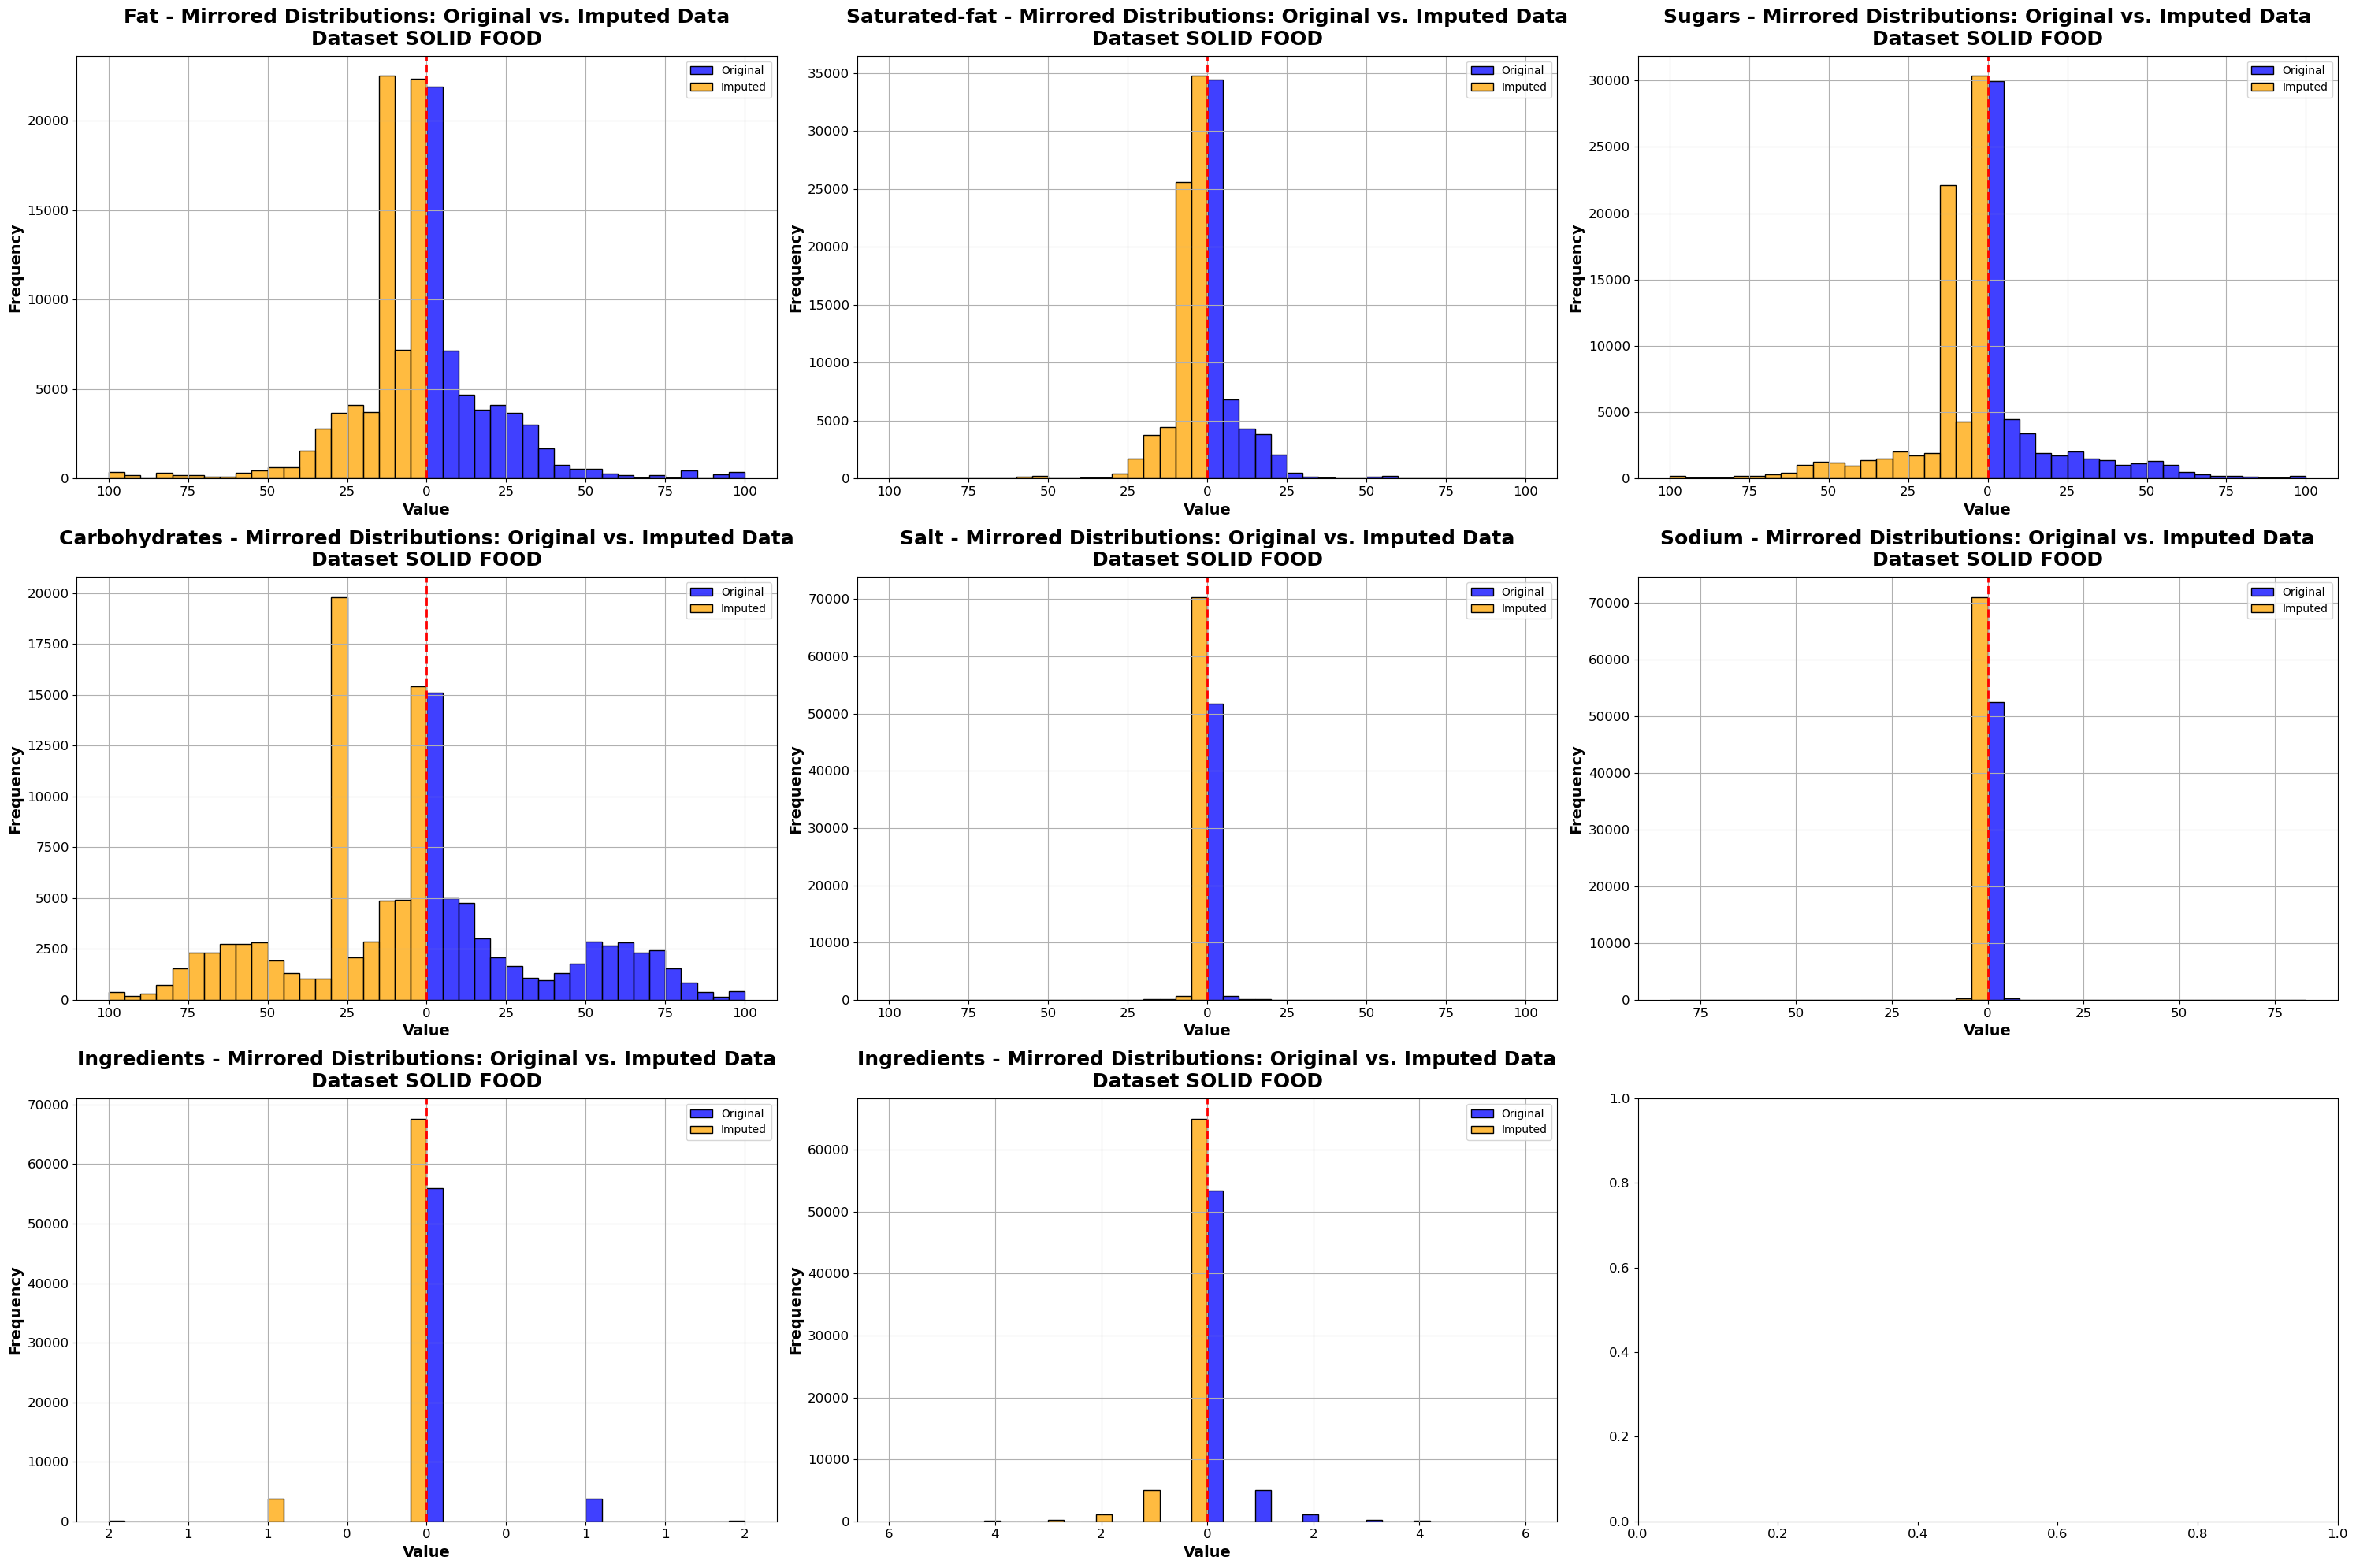

[0 1 2]
[0 1 2 5 4 3 6]


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the pairs of variables for which you want to perform iterative imputation
imputation_pairs = [('fat_100g', 'saturated-fat_100g'), ('sugars_100g', 'carbohydrates_100g'), ('salt_100g', 'sodium_100g'), ('ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n')]

# Extract the indicators before imputation
indicators_before_imputation = solid_foods_df[[var for pair in imputation_pairs for var in pair]].copy()

# Create a subset of the DataFrame containing only the specified pairs of variables
subset = solid_foods_df[[var for pair in imputation_pairs for var in pair]]

# Perform imputation
imputer.fit(subset)
imputed_values = imputer.transform(subset)



for i, pair in enumerate(imputation_pairs):
    solid_foods_df[pair[0]] = imputed_values[:, 2*i]  # First variable in the pair
    solid_foods_df[pair[1]] = imputed_values[:, 2*i + 1]  # Second variable in the pair
    # Round and cast imputed values to integers for the specific pair
    if pair == ('ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'):
        solid_foods_df[pair[0]] = np.round(solid_foods_df[pair[0]]).astype(int)
        solid_foods_df[pair[1]] = np.round(solid_foods_df[pair[1]]).astype(int)

# Extract the indicators after imputation
indicators_after_imputation = solid_foods_df[[var for pair in imputation_pairs for var in pair]].copy()
display(indicators_before_imputation)


# Define the list of indicators
indicators = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
axes = axes.flatten()

for i, indicator in enumerate(indicators):
    # Plot distribution before imputation
    sns.histplot(indicators_before_imputation[indicator], ax=axes[i], kde=False, color='blue', label='Original', bins=20)
    
    # Plot distribution after imputation (-indicators_after_imputation
    sns.histplot(-indicators_after_imputation[indicator], ax=axes[i], kde=False, color='orange', label='Imputed', bins=20)
    
    # Add vertical line at x=0
    axes[i].axvline(x=0, color='red', linestyle='--', linewidth=2)    
    
    # Set labels and title
    axes[i].set_title(f'{indicator.split("_")[0].capitalize()} - Mirrored Distributions: Original vs. Imputed Data\nDataset SOLID FOOD', fontweight='bold', fontsize=18)
    axes[i].set_xlabel('Value', fontweight='bold', fontsize=14)
    axes[i].set_ylabel('Frequency', fontweight='bold', fontsize=14)
    
    axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
    
    axes[i].grid(True)  # Add grid
    axes[i].legend()

# Hide empty subplots if the number of indicators is less than 6
if len(indicators) < 6:
    for j in range(len(indicators), 6):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

# Update beverages_df with imputed values
solid_foods_df.update(indicators_after_imputation)

print(solid_foods_df['ingredients_from_palm_oil_n'].unique())
print(solid_foods_df['ingredients_that_may_be_from_palm_oil_n'].unique())

In [49]:
# 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'
print(solid_foods_df['ingredients_from_palm_oil_n'].unique())
print(solid_foods_df['ingredients_that_may_be_from_palm_oil_n'].unique())
print('\n')
print(beverages_df['ingredients_from_palm_oil_n'].unique())
print(beverages_df['ingredients_that_may_be_from_palm_oil_n'].unique())

[0 1 2]
[0 1 2 5 4 3 6]


[0 1]
[0 1 2 3]


## IV.2. DATA IMPUTATION - Categorical Features

### IV.2.1. BEVERAGES

In [50]:
# ===========================================================================
# Data IMPUTATION - CATEGORICAL Features
# USING K-Nearest Neighbors (KNN)
# ===========================================================================
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder


# Define categorical columns
categorical_columns = ['nutrition_grade_fr', 'generic_name' , 'ingredients_text', 'brands', 'product_name', 'countries_fr', 'pnns_groups_2', 'categories_fr', 'quantity']

# Extract the categorical data
df_features_filtered_categorical = beverages_df[categorical_columns]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode categorical variables
encoded_data = ordinal_encoder.fit_transform(df_features_filtered_categorical)

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=20)

# Perform imputation
imputed_values = knn_imputer.fit_transform(encoded_data)

# Convert back to DataFrame
df_imputed_categorical = pd.DataFrame(imputed_values, columns=categorical_columns)

# Replace imputed values in the original DataFrame
beverages_df[categorical_columns] = ordinal_encoder.inverse_transform(imputed_values)



print('I FINISH IMPUTATION!!!')




I FINISH IMPUTATION!!!


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\1863635061.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

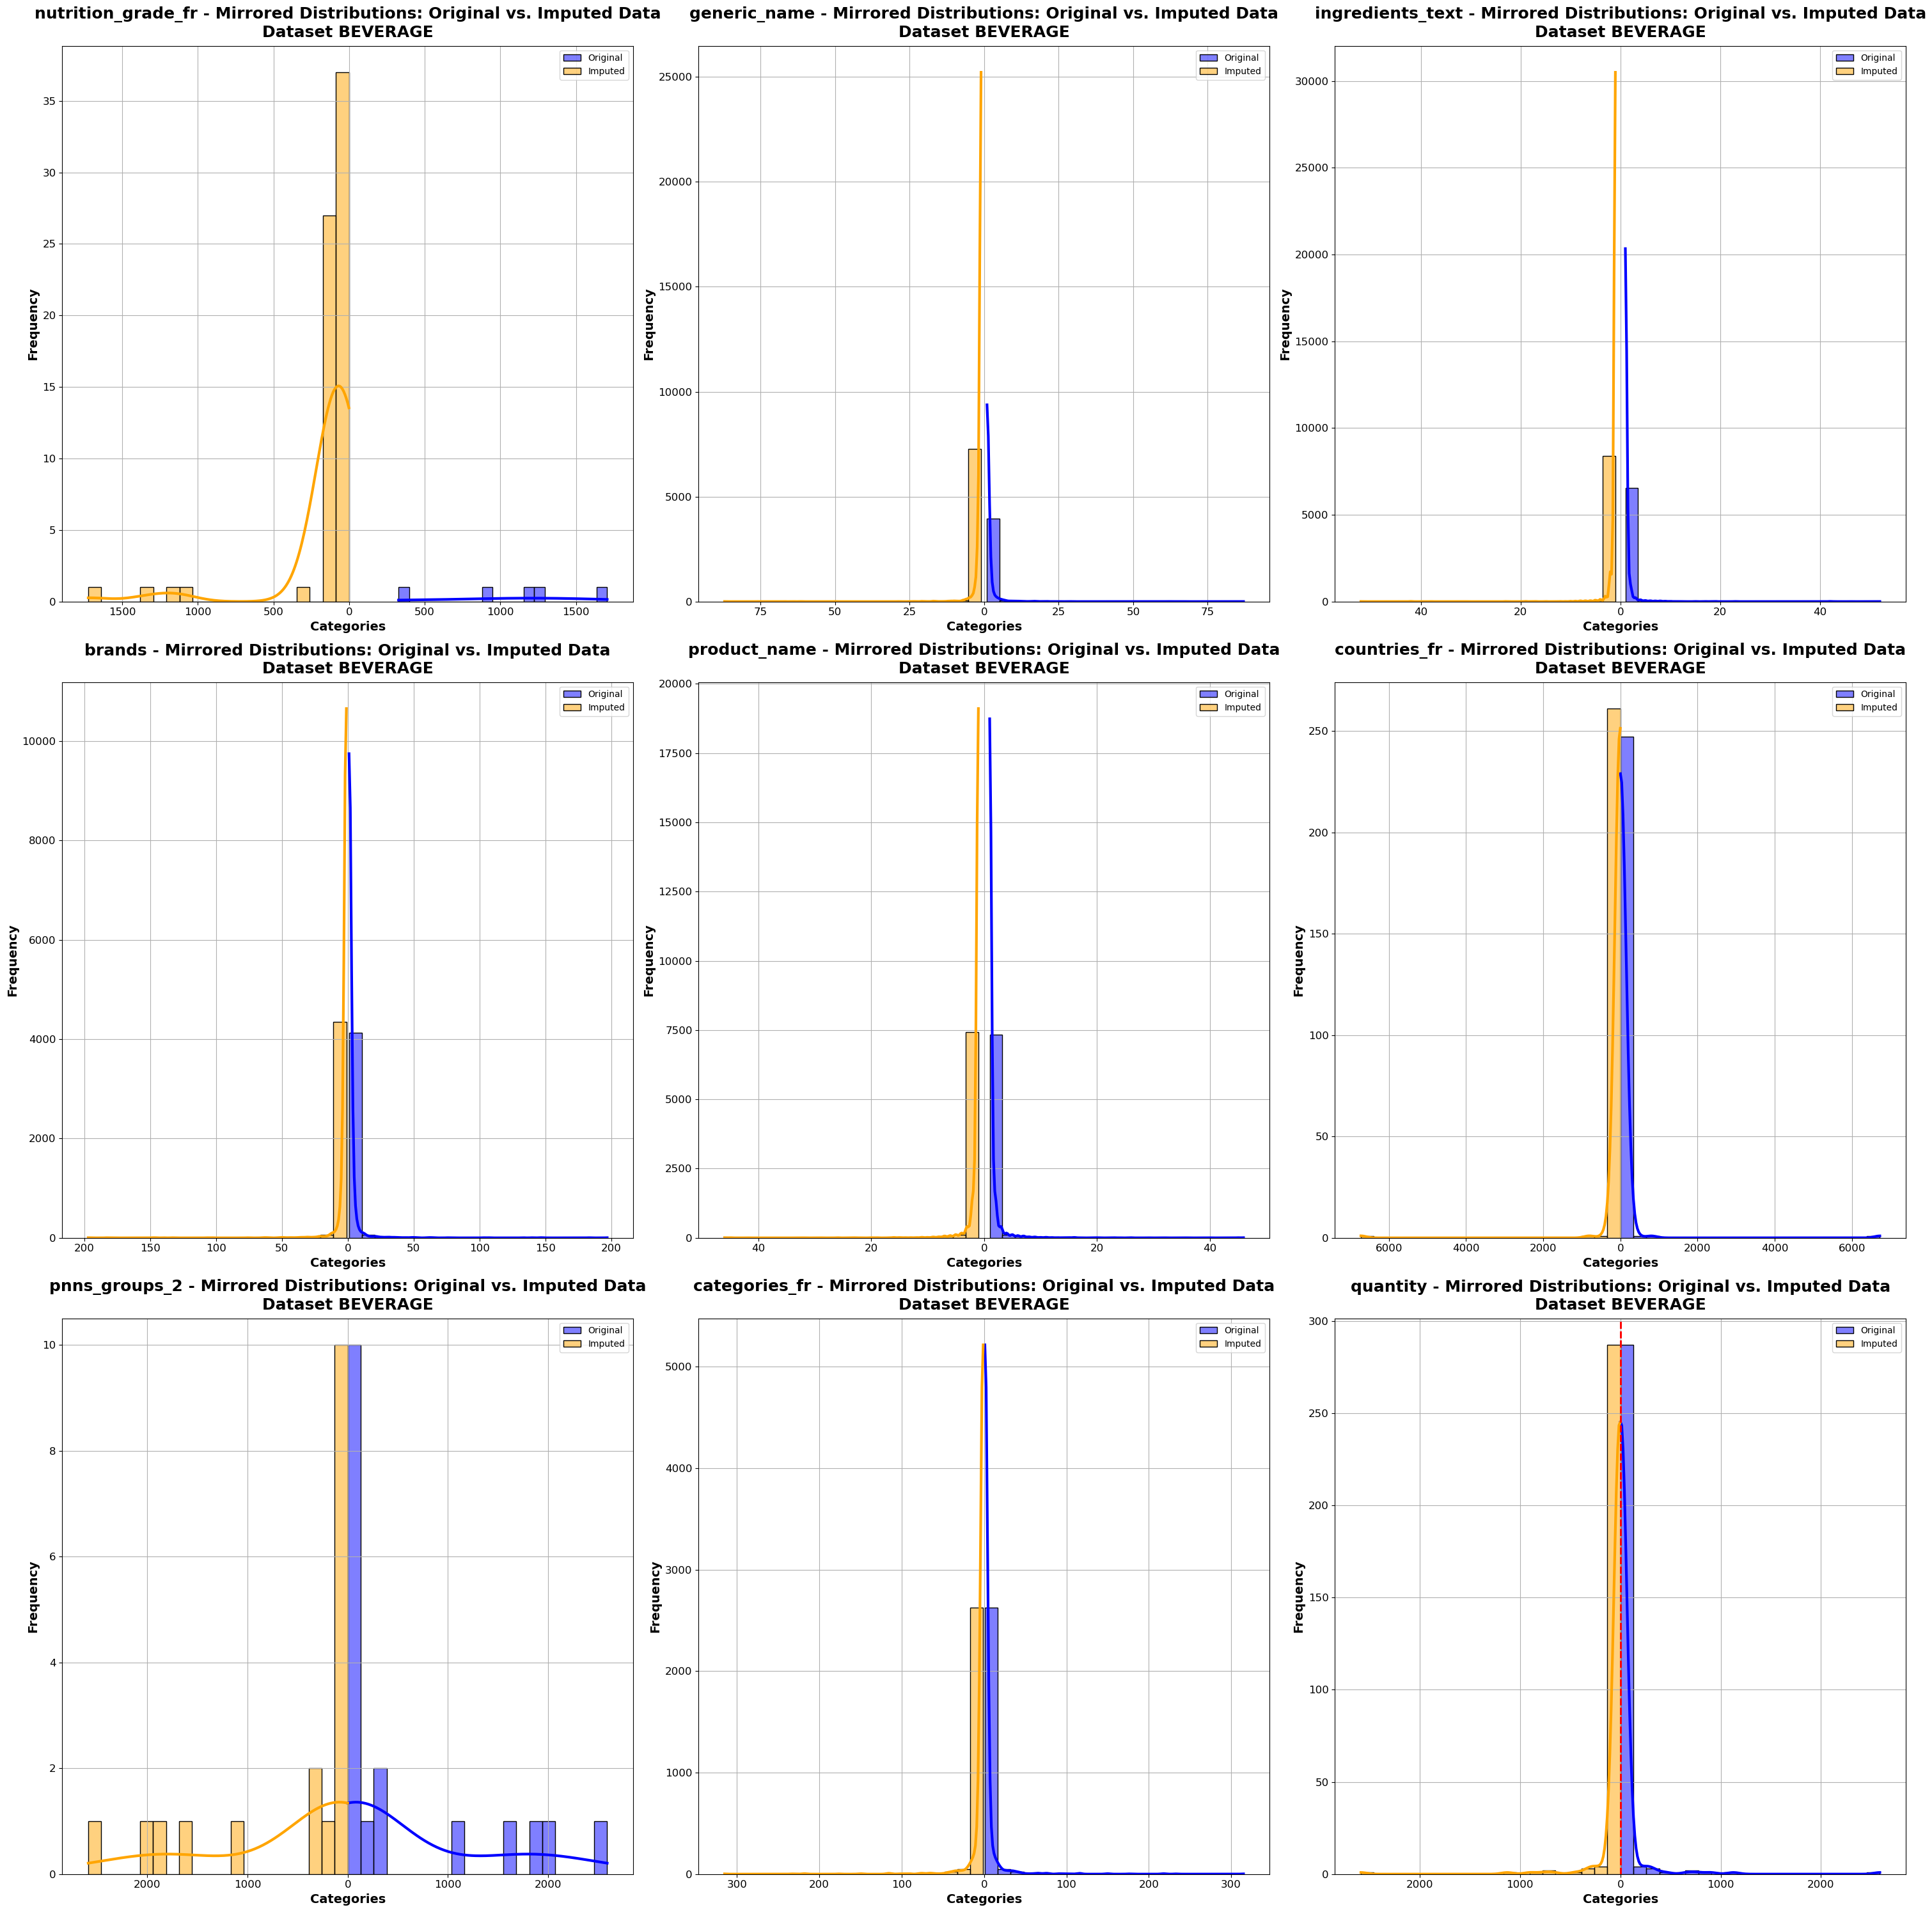

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to truncate long labels
def truncate_label(label):
    return label[:20]
    
# Function to compare frequency counts before and after imputation, plotting only categories with frequency above a threshold
def compare_frequency_counts(before_imputation, after_imputation, columns, threshold):
    fig, axes = plt.subplots(3, 3, figsize=(30, 30))
    axes = axes.flatten()

    # Calculate the total number of unique categories across all columns
    total_unique_categories = sum([len(before_imputation[col].value_counts()) for col in columns])
    
    # Determine the number of ticks to display based on the total number of unique categories
    num_ticks = min(total_unique_categories, 20)  # Maximum of 20 ticks
    
    for i, col in enumerate(columns):
        # Get frequency counts before imputation
        freq_before = before_imputation[col].value_counts()
        freq_before = freq_before[freq_before > threshold]  # Filter categories with frequency above threshold

        # Plot frequency counts before imputation
        # freq_before.plot(kind='bar', ax=axes[i], color='blue', label='Original', fill=False)
        sns.histplot(freq_before, ax=axes[i], kde=True, color='blue', label='Original', bins=20)

        axes[i].set_title(f'{col} - Mirrored Distributions: Original vs. Imputed Data\nDataset BEVERAGE', fontweight='bold', fontsize=18)
        axes[i].set_xlabel('Categories', fontweight='bold', fontsize=14)
        axes[i].set_ylabel('Frequency', fontweight='bold', fontsize=14)

        # Get frequency counts after imputation
        freq_after = after_imputation[col].value_counts()
        freq_after = freq_after[freq_after > threshold]  # Filter categories with frequency above threshold

        # Plot frequency counts after imputation
        # freq_after.plot(kind='bar', ax=axes[i], color='orange', label='Imputed', fill=False)
        sns.histplot(-freq_after, ax=axes[i], kde=True, color='orange', label='Imputed', bins=20)

        axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
        plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
        
        axes[i].grid(True)  # Add grid
        # Add legend
        axes[i].legend()

        # Dynamically adjust x ticks and labels based on the total number of unique categories
        # axes[i].set_xticks(range(0, len(freq_before), max(len(freq_before) // num_ticks, 1)))
        # axes[i].set_xticklabels([truncate_label(label) for label in freq_before.index[::max(len(freq_before) // num_ticks, 1)]], rotation=45, ha='right')

    
    plt.tight_layout()
    plt.show()

# Compare frequency counts before and after imputation, plotting only categories with frequency above a threshold
compare_frequency_counts(df_features_filtered_categorical, df_imputed_categorical, categorical_columns, 0)


### IV.2.2. SOLID FOOD

In [52]:
# ===========================================================================
# Data IMPUTATION - CATEGORICAL Features
# USING K-Nearest Neighbors (KNN)
# ===========================================================================
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder


# Define categorical columns
categorical_columns = ['nutrition_grade_fr', 'generic_name' , 'ingredients_text', 'brands', 'product_name', 'countries_fr', 'pnns_groups_2', 'categories_fr', 'quantity']

# Extract the categorical data
df_features_filtered_categorical = solid_foods_df[categorical_columns]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode categorical variables
encoded_data = ordinal_encoder.fit_transform(df_features_filtered_categorical)

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=20)

# Perform imputation
imputed_values = knn_imputer.fit_transform(encoded_data)

# Convert back to DataFrame
df_imputed_categorical = pd.DataFrame(imputed_values, columns=categorical_columns)

# Replace imputed values in the original DataFrame
solid_foods_df[categorical_columns] = ordinal_encoder.inverse_transform(imputed_values)



print('I FINISH IMPUTATION!!!')




I FINISH IMPUTATION!!!


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\1026211468.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

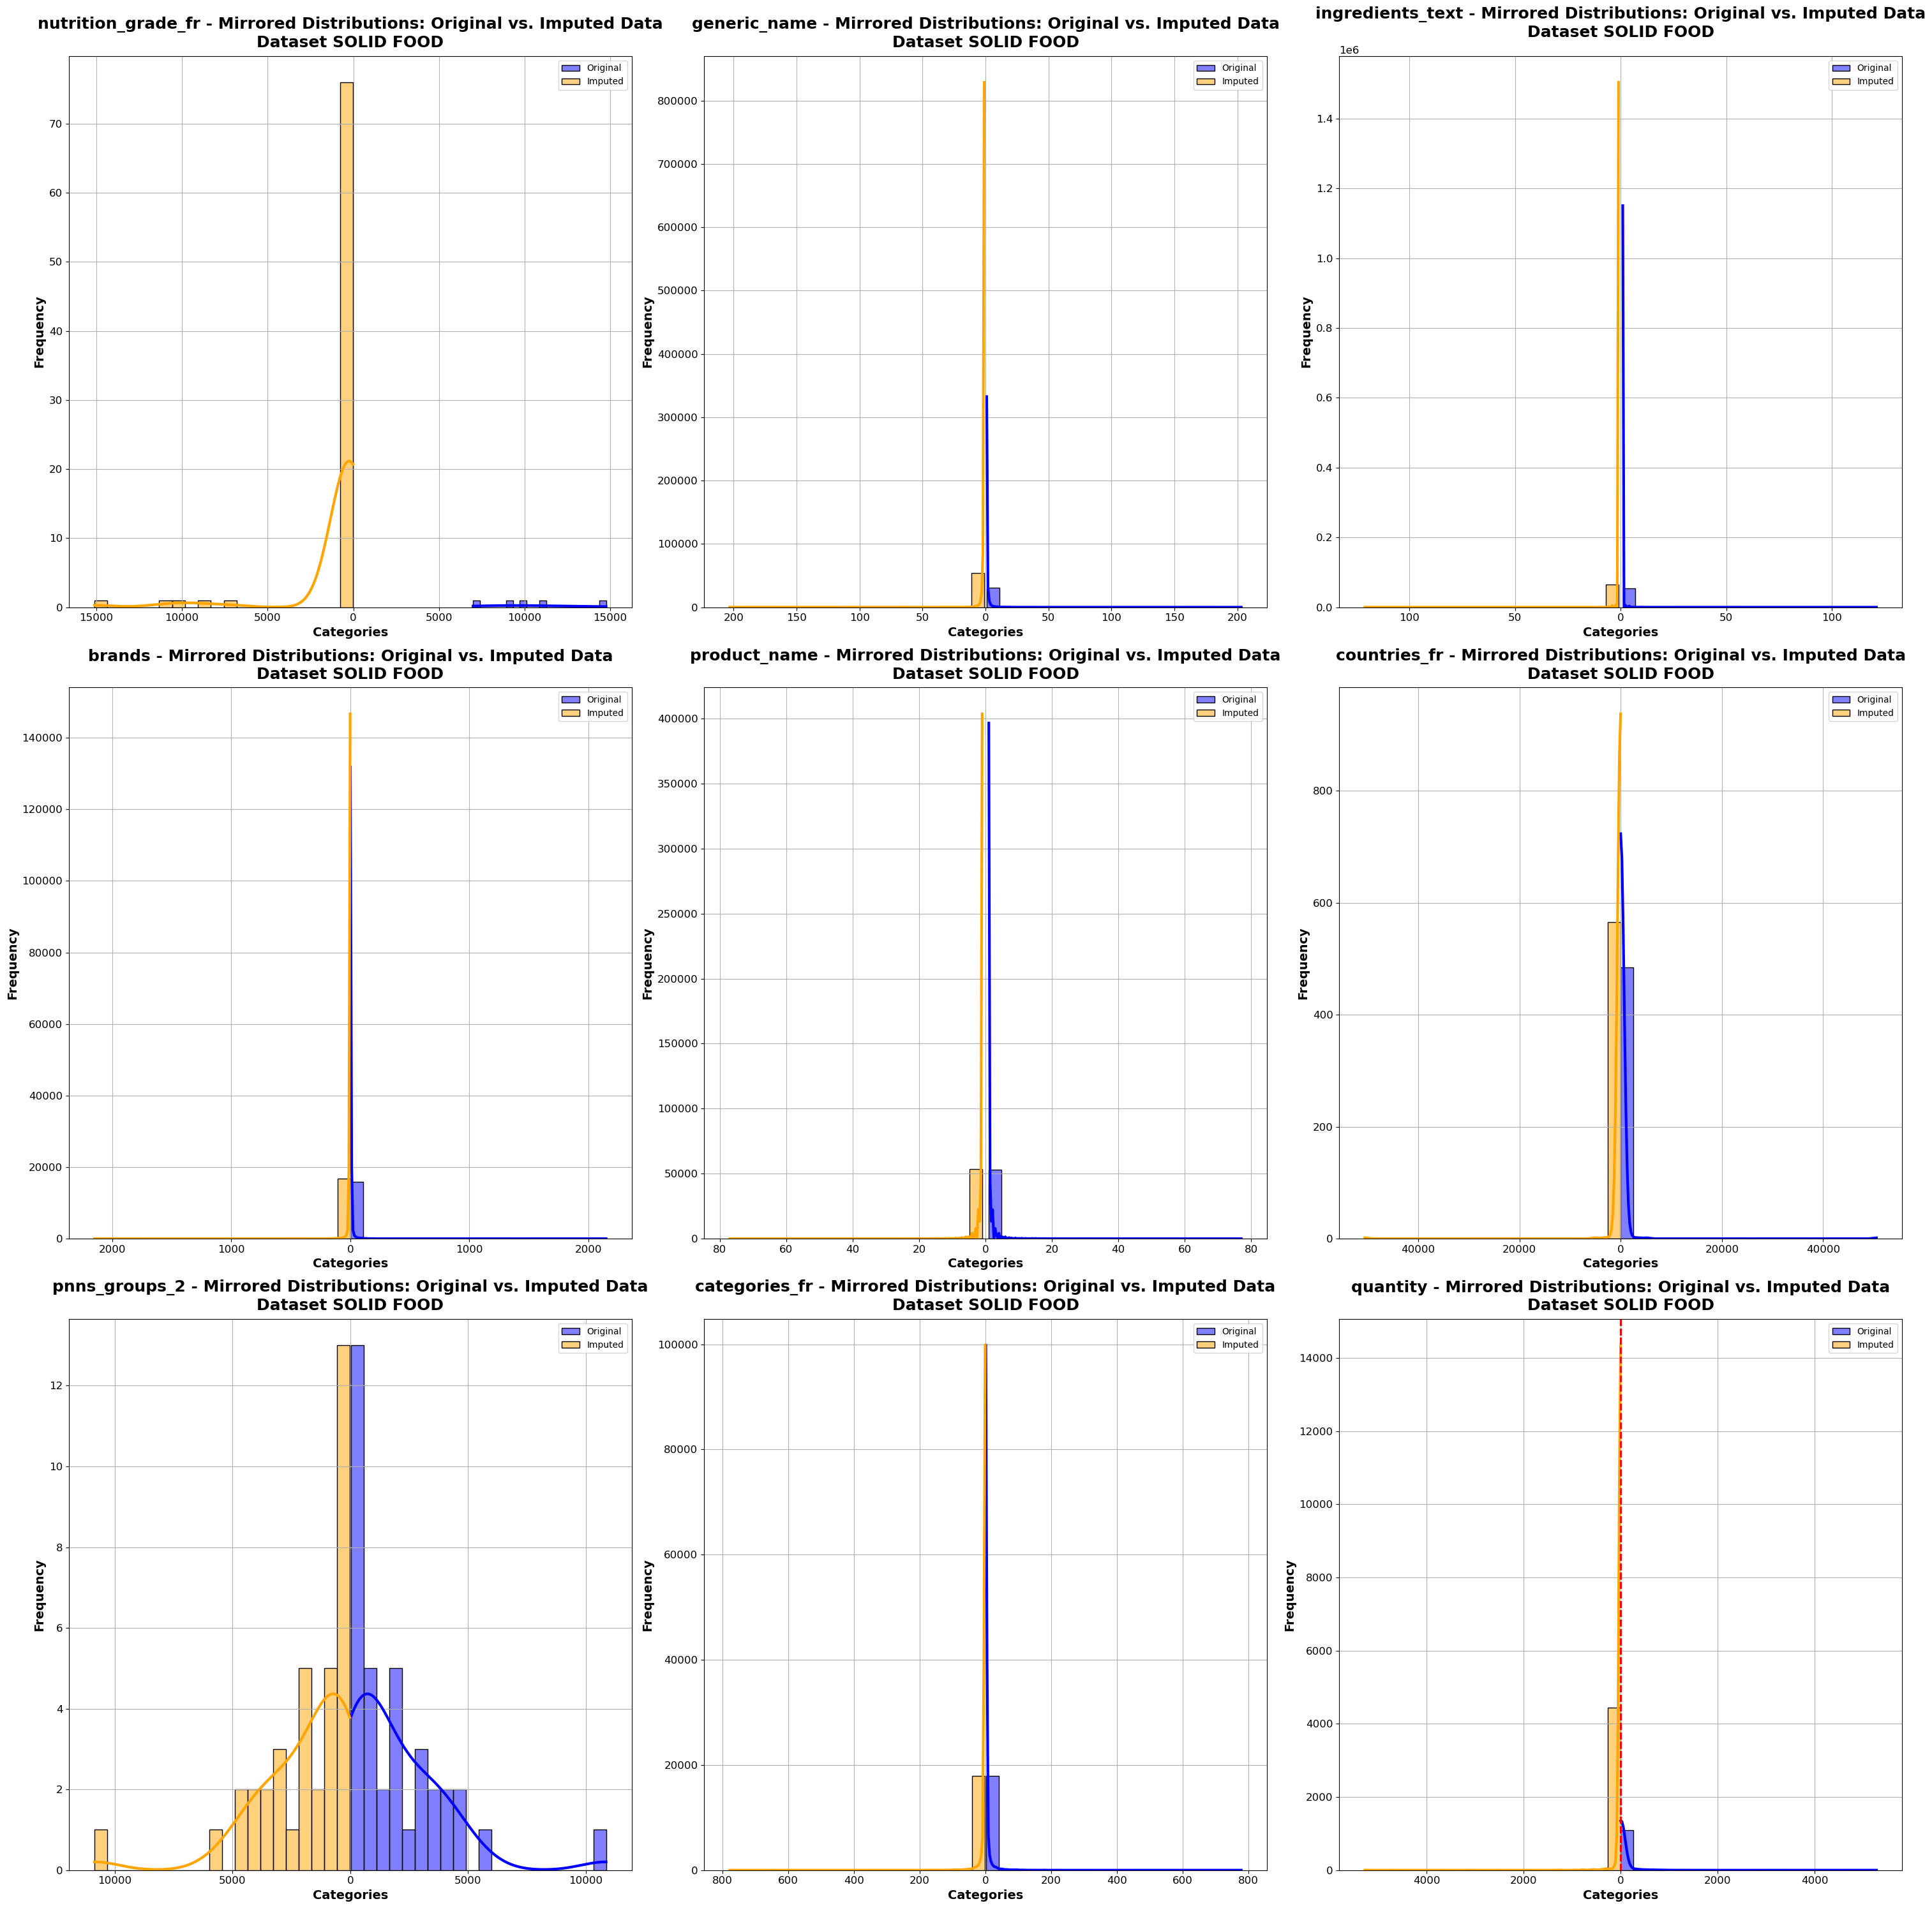

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to truncate long labels
def truncate_label(label):
    return label[:20]
    
# Function to compare frequency counts before and after imputation, plotting only categories with frequency above a threshold
def compare_frequency_counts(before_imputation, after_imputation, columns, threshold):
    fig, axes = plt.subplots(3, 3, figsize=(30, 30))
    axes = axes.flatten()

    # Calculate the total number of unique categories across all columns
    total_unique_categories = sum([len(before_imputation[col].value_counts()) for col in columns])
    
    # Determine the number of ticks to display based on the total number of unique categories
    num_ticks = min(total_unique_categories, 20)  # Maximum of 20 ticks
    
    for i, col in enumerate(columns):
        # Get frequency counts before imputation
        freq_before = before_imputation[col].value_counts()
        freq_before = freq_before[freq_before > threshold]  # Filter categories with frequency above threshold

        # Plot frequency counts before imputation
        # freq_before.plot(kind='bar', ax=axes[i], color='blue', label='Original', fill=False)
        sns.histplot(freq_before, ax=axes[i], kde=True, color='blue', label='Original', bins=20)

        axes[i].set_title(f'{col} - Mirrored Distributions: Original vs. Imputed Data\nDataset SOLID FOOD', fontweight='bold', fontsize=18)
        axes[i].set_xlabel('Categories', fontweight='bold', fontsize=14)
        axes[i].set_ylabel('Frequency', fontweight='bold', fontsize=14)

        # Get frequency counts after imputation
        freq_after = after_imputation[col].value_counts()
        freq_after = freq_after[freq_after > threshold]  # Filter categories with frequency above threshold

        # Plot frequency counts after imputation
        # freq_after.plot(kind='bar', ax=axes[i], color='orange', label='Imputed', fill=False)
        sns.histplot(-freq_after, ax=axes[i], kde=True, color='orange', label='Imputed', bins=20)

        axes[i].set_xticklabels([str(abs(int(x))) for x in axes[i].get_xticks()])  # Corrected
        plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
        
        axes[i].grid(True)  # Add grid
        # Add legend
        axes[i].legend()

        # Dynamically adjust x ticks and labels based on the total number of unique categories
        # axes[i].set_xticks(range(0, len(freq_before), max(len(freq_before) // num_ticks, 1)))
        # axes[i].set_xticklabels([truncate_label(label) for label in freq_before.index[::max(len(freq_before) // num_ticks, 1)]], rotation=45, ha='right')

    
    plt.tight_layout()
    plt.show()

# Compare frequency counts before and after imputation, plotting only categories with frequency above a threshold
compare_frequency_counts(df_features_filtered_categorical, df_imputed_categorical, categorical_columns, 0)


## IV.3. DATA IMPUTATION - Categorical Ordinal Features

In [54]:
# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# FUNCTIONS
# ===========================================================================
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer

def add_label(data, attr, name_notnan='Training', name_nan='Predict'):
    null_pos = data[attr].isnull()
    data.loc[~null_pos, 'Label'] = name_notnan
    data.loc[null_pos, 'Label'] = name_nan

def Miss_forest_impute_iterative(data, attrb, dtype, num_iterations):
    for _ in range(num_iterations):
        # Separate training and prediction data
        train_data = data[data['Label'] == 'Training']
        test_data = data[data['Label'] == 'Predict']

        # Separate features and target variable
        Y = train_data[[attrb]]
        X = train_data.drop(['Label', attrb], axis=1)

        # Initialize model
        if dtype == 'Continuous':
            model = RandomForestRegressor()
        elif dtype == 'Categorical':
            model = RandomForestClassifier()

        # Fit the model
        model.fit(X, Y)

        # Prediction set features
        x_test = test_data.drop(['Label', attrb], axis=1)

        # Predict missing values
        y_pred = model.predict(x_test)

        # Replace missing values with predicted values
        data.loc[data['Label'] == 'Predict', attrb] = y_pred

    return data


### IV.3.1. BEVERAGES

C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\3731384381.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[~null_pos, 'Label'] = name_notnan
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\bas

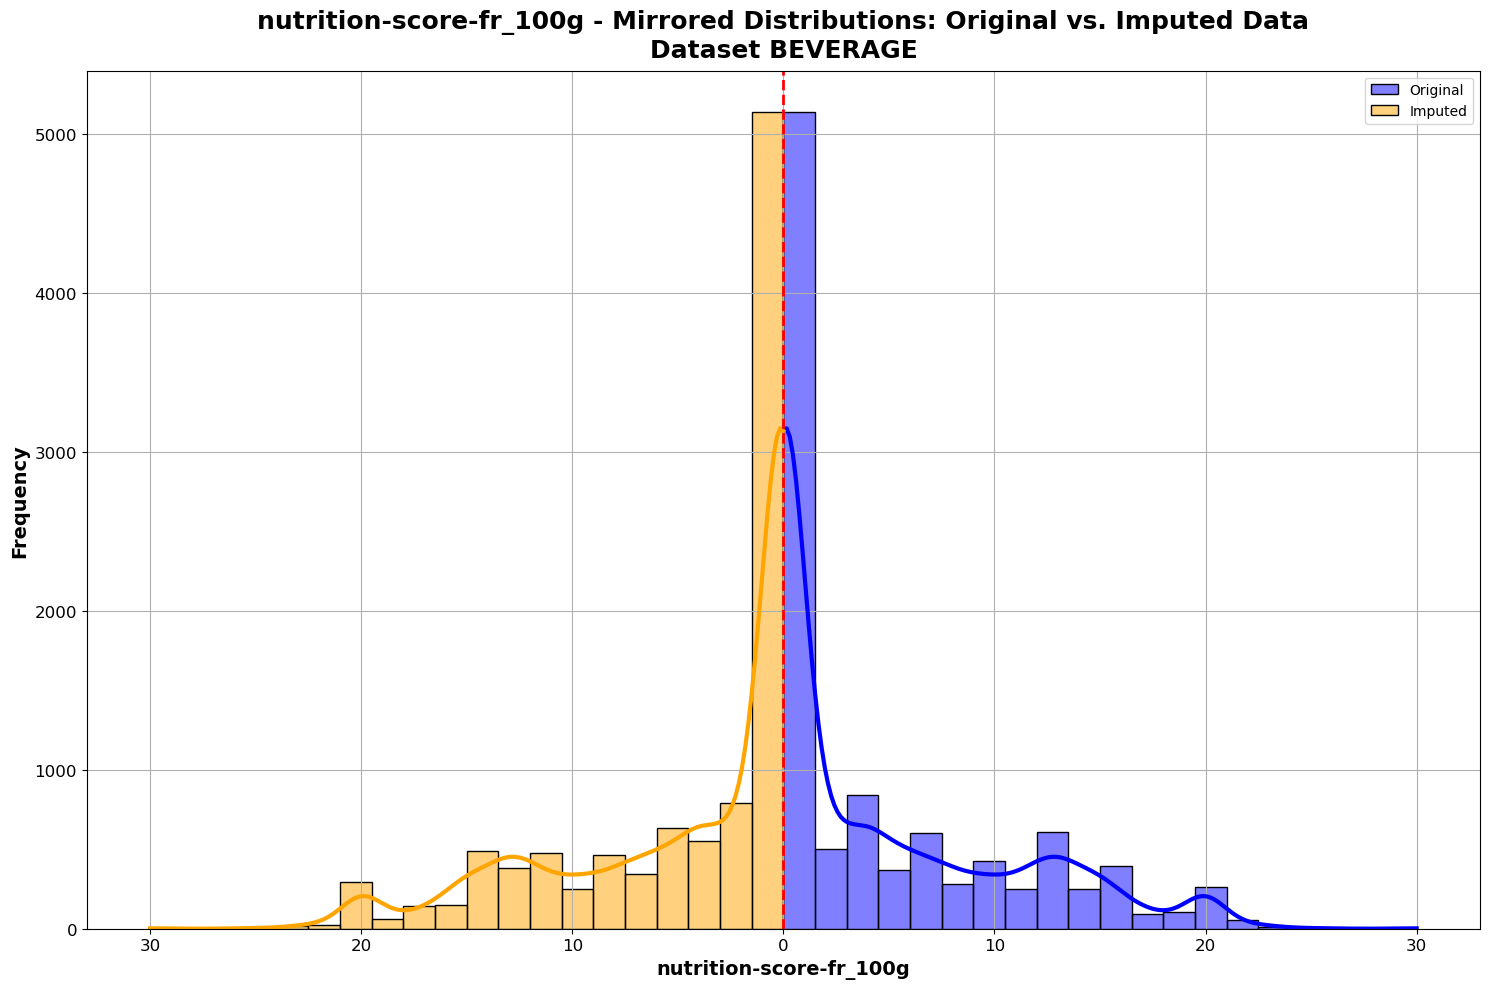

In [55]:
# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# USING Miss Forest
# ===========================================================================
# Imputation of 'nutrition-score-fr_100g'
df_features_filtered_ALL_categorical = beverages_df[['nutrition-score-fr_100g','saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                  'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']]
df_copy = df_features_filtered_ALL_categorical


# Add labels
add_label(df_features_filtered_ALL_categorical, 'nutrition-score-fr_100g')
df_features_filtered_imputed = Miss_forest_impute_iterative(df_features_filtered_ALL_categorical, 'nutrition-score-fr_100g', 'Continuous', 5)

# Update df_features_filtered with the imputated data
beverages_df['nutrition-score-fr_100g'] = df_features_filtered_imputed['nutrition-score-fr_100g'].astype(int)
beverages_df

# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# PLOT
# ===========================================================================
# Create a single figure with subplots
plt.figure(figsize=(15, 10))

sns.histplot(df_copy['nutrition-score-fr_100g'], kde=True, color='blue', label='Original', bins=20)

# Plot histogram of imputed data
sns.histplot(-df_features_filtered_imputed['nutrition-score-fr_100g'], kde=True, color='orange', label='Imputed', bins=20)

plt.title(f'nutrition-score-fr_100g - Mirrored Distributions: Original vs. Imputed Data\nDataset BEVERAGE', fontweight='bold', fontsize=18)
plt.xlabel('nutrition-score-fr_100g', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)  # Add grid

plt.legend()



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()





### IV.3.2. SOLID FOOD

C:\Users\Olivi\AppData\Local\Temp\ipykernel_29888\3731384381.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[~null_pos, 'Label'] = name_notnan
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\bas

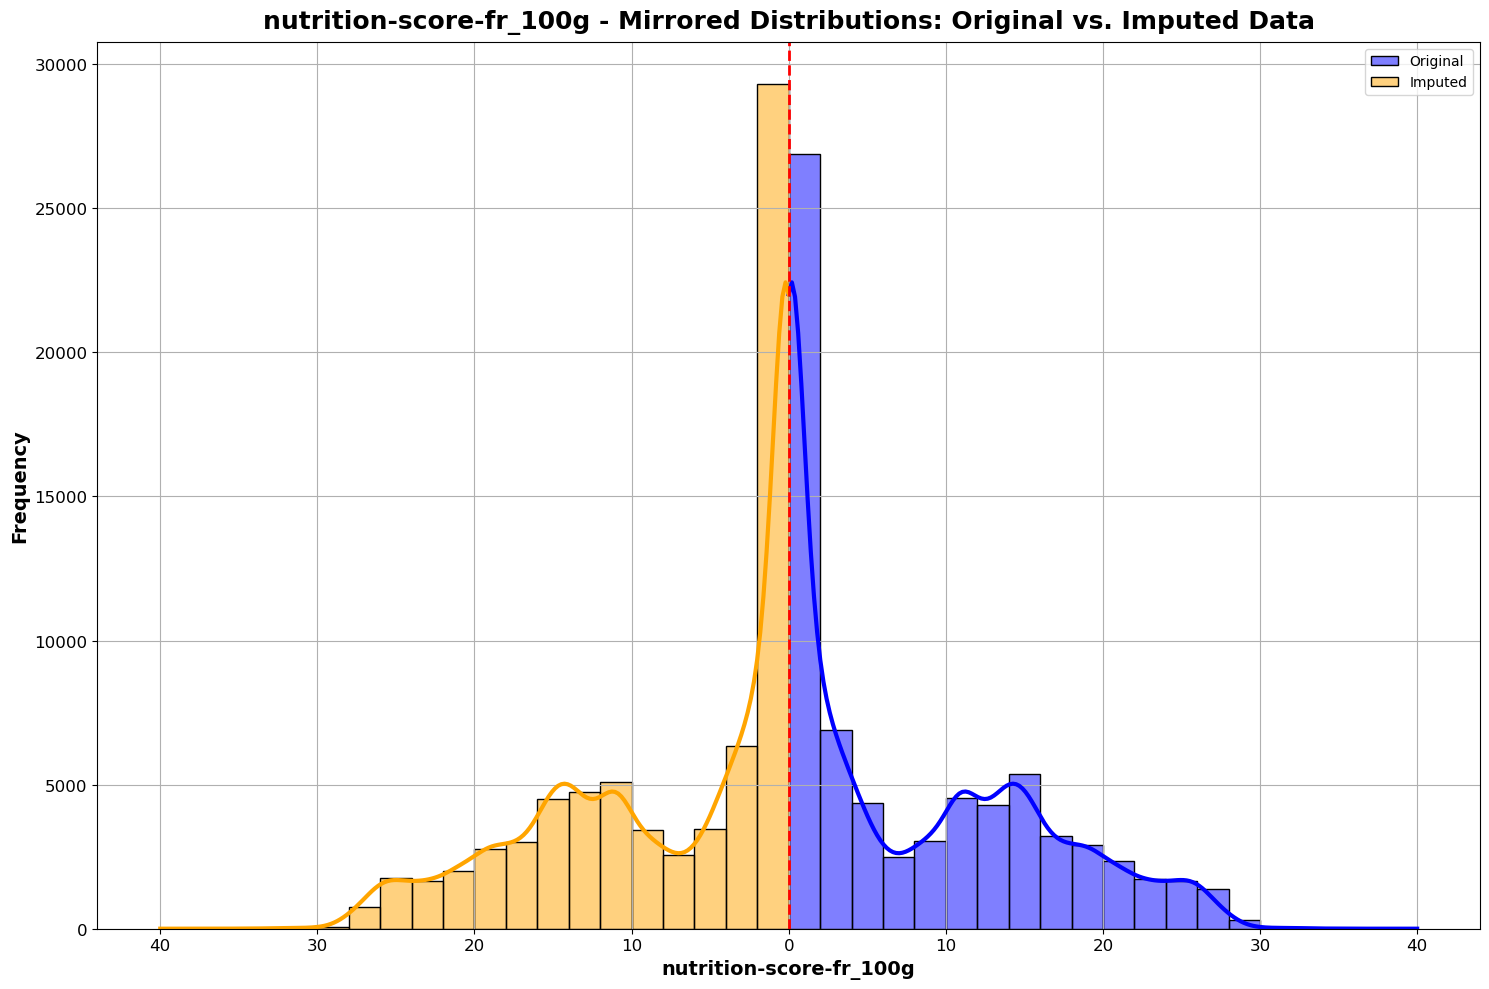

In [56]:
# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# USING Miss Forest
# NO NEED, there is no EMPTY VALUE IN THE SOLID_FOOD DATASET. 
# ===========================================================================
# Imputation of 'nutrition-score-fr_100g'
df_features_filtered_ALL_categorical = solid_foods_df[['nutrition-score-fr_100g','saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
                  'carbohydrates_100g', 'fat_100g', 'proteins_100g', 'energy_100g']]
df_copy = df_features_filtered_ALL_categorical


# Add labels
add_label(df_features_filtered_ALL_categorical, 'nutrition-score-fr_100g')
df_features_filtered_imputed = Miss_forest_impute_iterative(df_features_filtered_ALL_categorical, 'nutrition-score-fr_100g', 'Continuous', 5)

# Update df_features_filtered with the imputated data
solid_foods_df['nutrition-score-fr_100g'] = df_features_filtered_imputed['nutrition-score-fr_100g'].astype(int)
solid_foods_df

# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# PLOT
# ===========================================================================
# Create a single figure with subplots
plt.figure(figsize=(15, 10))

sns.histplot(df_copy['nutrition-score-fr_100g'], kde=True, color='blue', label='Original', bins=20)

# Plot histogram of imputed data
sns.histplot(-df_features_filtered_imputed['nutrition-score-fr_100g'], kde=True, color='orange', label='Imputed', bins=20)

plt.title(f'nutrition-score-fr_100g - Mirrored Distributions: Original vs. Imputed Data', fontweight='bold', fontsize=18)
plt.xlabel('nutrition-score-fr_100g', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)  # Add grid

plt.legend()



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



## IV.5. Re-create the dataframe df_features_filtered based on the BEVERAGE and SOLID FOOD dataframes. 

In [57]:
# Add to beverages_df a column 'type' with the value 'BEVERAGE'
beverages_df['TYPE_DATASET'] = 'BEVERAGE'
solid_foods_df['TYPE_DATASET'] = 'SOLID_FOOD'
# Add to solid_foods_df a column 'type' with the value 'SOLID_FOOD'
df_features_filtered = pd.concat([beverages_df, solid_foods_df], ignore_index=True)


## IV.5.1. Verification that all columns have been imputated

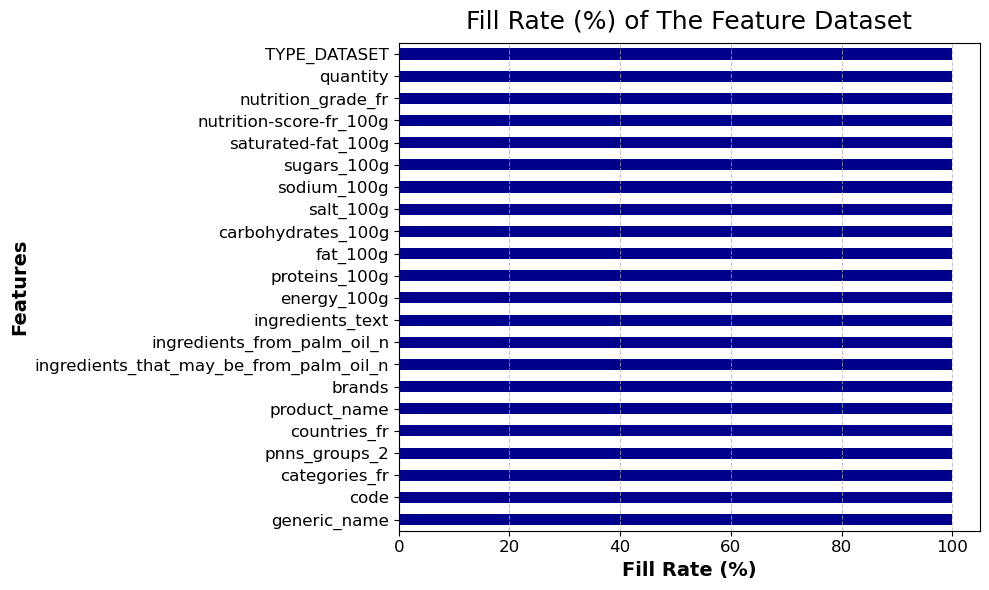

In [58]:
# Calculate the percentage of missing values for each feature
fill_rate_percentages = 100 - (df_features_filtered.isnull().sum() / len(df_features_filtered)) * 100

# Sort fill_rate_percentages
fill_rate_percentages_sorted = fill_rate_percentages.sort_values(ascending=True)  # Sorting in ascending order
# Plotting
plt.figure(figsize=(10, 6))

# Set color to dark blue when fill rate is 100%, otherwise use skyblue
colors = ['darkblue' if rate == 100 else 'skyblue' for rate in fill_rate_percentages_sorted]

fill_rate_percentages_sorted.plot(kind='barh', color=colors)
plt.title('Fill Rate (%) of The Feature Dataset')
plt.xlabel('Fill Rate (%)')
plt.ylabel('Features')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Customize x-axis ticks to display only every nth label
n = 1  # Display every 5th label
plt.yticks(range(0, len(fill_rate_percentages_sorted), n), fill_rate_percentages_sorted.index[::n])

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()


## IV.5.2. Add the target to cleaned feature dataframe. 

In [59]:
# Assuming both DataFrames have an index that you want to use for merging
# Merge the cleaned feature dataset with the target dataset based on their indices
# merged_df = df_features_filtered.merge(df_target, left_index=True, right_index=True)
merged_df = pd.merge(df_features_filtered, df_data[['code', 'main_category_fr']], on='code', how='left')
# Rename the new column to the desired name
merged_df.rename(columns={'main_category_fr': 'TARGET_main_category_fr'}, inplace=True)



existing_columns = merged_df.columns.tolist() # Get the list of existing columns in the DataFrame
column_order = ['TARGET_main_category_fr'] + [col for col in existing_columns if col != 'TARGET_main_category_fr'] # Move the target column to the beginning of the column_order list
merged_df = merged_df[column_order] # Reorder the columns in the DataFrame





# Replace '-' with '_' in column names
merged_df.columns = merged_df.columns.str.replace('-', '_')

# Print the merged DataFrame
print("Merged DataFrame:")
merged_df

Merged DataFrame:


TARGET_main_category_fr  \
0                         Sirops   
1                          Sodas   
2               Sodas aux fruits   
3                          Sodas   
4               Sodas aux fruits   
...                          ...   
81683        Produits d'élevages   
81684                  pl:Szprot   
81685                 Thés verts   
81686  Produits à tartiner salés   
81687            Chips et frites   

                                            generic_name nutrition_grade_fr  \
0                         pur jus de tomates biologiques                  c   
1      boisson gazeuse rafraîchissante aux extraits n...                  e   
2      boisson gazeuse aux extraits naturels de citro...                  e   
3                                  cidre breton bio doux                  d   
4                                            ginger beer                  c   
...                                                  ...                ...   
81683                                               miel                  d   
81684                                              sprot                  c   
81685                                  thé bio équitable                  c   
81686  rollitos de primavera y salsa agridulce. produ...                  d   
81687                    leba pickle flavor potato chips                  c   

       nutrition_score_fr_100g  saturated_fat_100g  sugars_100g  sodium_100g  \
0                            0                0.73        10.71         0.05   
1                           13                0.00        10.40         0.01   
2                           13                0.00        10.40         0.04   
3                            0                0.73        10.71         0.05   
4                            0                0.73        10.71         0.05   
...                        ...                 ...          ...          ...   
81683                        0                5.82        13.28         0.48   
81684                        0                5.82        13.28         0.48   
81685                        2                0.20         0.50         0.01   
81686                        0                5.82        13.28         0.48   
81687                        0                5.82        13.28         0.48   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
0           0.14               10.80      1.53           0.67       222.21   
1           0.03               10.40      0.00           0.00       177.00   
2           0.10               10.40      0.00           0.00       177.00   
3           0.14               10.80      1.53           0.67       222.21   
4           0.14               10.80      1.53           0.67       222.21   
...          ...                 ...       ...            ...          ...   
81683       1.20               29.33     14.71           8.16      1163.71   
81684       1.20               29.33     14.71           8.16      1163.71   
81685       0.03                0.50      0.20           0.50        21.00   
81686       1.20               29.33     14.71           8.16      1163.71   
81687       1.20               29.33     14.71           8.16      1163.71   

                                        ingredients_text  \
0      sirop saveur pistache 5 cl : sirop 99,16 % (su...   
1      eau gazéifiée, sucre, colorant caramel e150d, ...   
2      eau gazéifiée, sucre, acidifiants (acide citri...   
3      eau, arôme fleur d'oranger, conservateur : e20...   
4      sparkling filtered water (sweetened by a blend...   
...                                                  ...   
81683                                               miel   
81684  joghurt mild mit 3,5% fett im milchanteil. her...   
81685  thé vert, arôme naturel bergamote avec autres ...   
81686  viande d'oie, graisse de canard, épices, sel, ...   
81687  viande de porc (79%), viande de porc noir issu...   

       i

# STEP 5. Save the cleaned data into an Excel file. 
We are going to use it in a 2nd notebook to do the EDA. 

In [60]:
# ==================================================================================================
# SAVE DATA INTO EXCEL (df_features_filtered.xlsx)
# ==================================================================================================

# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET3_Preparer_des_donnees_pour_un_organisme_de_sante_publique\DATA\merged_df.xlsx'

# Write the DataFrame to Excel
merged_df.to_excel(excel_file_path, index=False)

# Print a message indicating the successful save
print(f"Filtered data has been successfully saved to: {excel_file_path}")

Filtered data has been successfully saved to: C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET3_Preparer_des_donnees_pour_un_organisme_de_sante_publique\DATA\merged_df.xlsx
